In [1]:
# standard libraries
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
import helper.helper as h
import helper.methods as m

from importlib import reload  # Python 3.4+

In [2]:
# reload helper and methods for when things change
reload(m);
reload(h);

True W:
[[ 0.46  0.    0.    0.    0.    0.  ]
 [ 0.    0.27  0.    0.    0.    0.  ]
 [-0.44  0.32  0.38  0.    0.    0.  ]
 [-0.31  0.    0.    0.47  0.    0.  ]
 [ 0.44  0.26  0.    0.28  0.    0.  ]
 [ 0.    0.    0.   -0.29 -0.38  0.  ]].



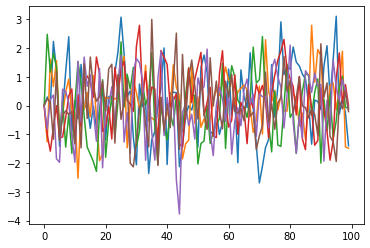

In [3]:
## Number of dimensions, number of edges, number of samples
T, n, s = 100, 6, 12

### Coefficient matrix
## First approach: A is a DAG, no model mismatch
A_true = h.generate_A(n, s, tril = False, low = 0.25, high = 0.5)

# set coefficients to be positive (else oscillating which does not make sense)
for i in range(len(A_true)):
    A_true[i][i] = np.abs(A_true[i][i])

## True permutation
P_true = np.identity(n) # np.random.permutation(np.identity(n))

## Datagenerating W
W_true = P_true.T @ A_true @ P_true
print(f"True W:\n{np.round(W_true, 2)}.\n")

## Generate series
X = h.generate_var_2(T, n, A_true, P_true)
plt.plot(X);

### Varying T

In [4]:
T_values = [10, 25, 50, 100, 200, 300, 400, 500, 1000, 2500]
iterations = 10

results = [[], [], []]

for T in T_values:
    
    tmp_results = [[], [], []]
    
    for _ in range(iterations):
        X = h.generate_var_2(T, n, A_true, P_true)
    
        tmp_results[0].append(h.score(X, m._OMP(X), W_true, printing = False)[4])
        tmp_results[1].append(h.score(X, m._Exh(X), W_true, printing = False)[4])
        tmp_results[2].append(h.score(X, m._notears_2(X), W_true, printing = False)[4])
        
    results[0].append(sum(tmp_results[0]) / len(tmp_results[0]))
    results[1].append(sum(tmp_results[1]) / len(tmp_results[1]))
    results[2].append(sum(tmp_results[2]) / len(tmp_results[2]))

  5%|████                                                                            | 36/720 [00:00<00:01, 352.92it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (1.4973778354486396, array([ 3.80492167e-04,  6.05867625e+03, -6.06378823e-04,  5.79080337e+04,
        6.37698873e+03,  6.20602486e-03,  6.20453438e-03,  1.69762287e-04,
        3.28949204e-03, -7.89182580e+03, -2.53086590e+04, -2.35424644e-02,
        5.69521359e+03, -1.23904469e+04, -2.96077678e-05, -3.66472786e+03,
        3.31858433e+03,  4.65394370e+02, -2.89219215e-04,  5.41908099e-04,
       -1.26959595e-04, -1.87139776e-05, -2.02517865e+04,  7.82407993e-06,
        1.64392926e-04,  2.76968728e-04, -2.60335539e-05,  3.63240234e-04,
        5.70231646e-07,  1.27721774e-04, -1.99783210e+04, -3.30925275e+04,
       -1.81722787e-04,  7.39991115e+03, -2.10996567e+04, -9.50065951e-04,
       -3.80492167e-04, -6.05867625e+03,  6.06378823e-04, -5.79080337e+04,
       -6.37698873e+03, -6.20602486e-03, -6.20453438e-03, -1.69762287e-04,
       -3.28949204e-03,  7.89182580e+03,  2.53086590e+04,  2.35424644e-02,
       -5.69521359

  6%|████▌                                                                           | 41/720 [00:00<00:01, 398.04it/s]

h: 0.0.
rho: 1e+21.
loss: (1.5547175066651782, array([-1.16162760e-04,  1.96196263e-04, -3.04952098e-03,  2.07486615e-05,
        2.94256261e-03,  7.04075361e-03,  2.73142263e-03, -3.29585759e-06,
        2.07914348e-03, -1.80951958e-03, -1.26565288e-02, -2.91049148e-04,
       -2.05560599e-04, -1.96320047e-04, -3.66264147e-04, -6.82218636e-05,
       -5.21435863e-03,  1.68667732e-03,  2.98777709e-04, -1.79432764e-04,
        1.28899639e-02,  2.82139863e-05, -2.94688613e-04,  5.76605501e-04,
       -2.92959804e-04,  2.23096545e-04,  1.93825898e-04,  1.36267248e-04,
        7.02480729e-04, -1.81860573e-03,  1.02459267e-04, -4.17617159e-05,
       -7.71658633e-04,  1.64554171e-04, -1.62202277e-04,  1.19475492e-04,
        1.16162760e-04, -1.96196263e-04,  3.04952098e-03, -2.07486615e-05,
       -2.94256261e-03, -7.04075361e-03, -2.73142263e-03,  3.29585759e-06,
       -2.07914348e-03,  1.80951958e-03,  1.26565288e-02,  2.91049148e-04,
        2.05560599e-04,  1.96320047e-04,  3.66264147e

  5%|████▏                                                                           | 38/720 [00:00<00:01, 379.98it/s]

h: 0.0.
rho: 1e+22.
loss: (1.8211671417486586, array([-1.11940452e-04,  1.40362373e-04,  5.73303029e-02,  9.82622250e-02,
       -1.30592403e-02,  8.94329269e-02, -6.30714262e-02,  1.07889789e-04,
        2.18223259e-01, -1.74138363e-01, -2.42047152e-02,  3.66909115e-02,
        1.29184462e-04, -1.02076388e-04, -6.96628891e-04,  6.79198942e-02,
        3.42746981e-04,  2.98874480e-02,  1.51503270e-04, -3.41946106e-04,
        1.45140608e-03, -2.13106375e-04, -2.55034627e-04, -4.72343425e-02,
        3.51116464e-04, -4.68736003e-05,  9.96622507e-02, -3.12920050e-02,
       -6.41962940e-05,  1.18761029e-03,  3.47748257e-04, -2.30631845e-05,
       -6.51529042e-04,  5.49178727e-04, -2.52285727e-05, -1.26876270e-04,
        1.11940452e-04, -1.40362373e-04, -5.73303029e-02, -9.82622250e-02,
        1.30592403e-02, -8.94329269e-02,  6.30714262e-02, -1.07889789e-04,
       -2.18223259e-01,  1.74138363e-01,  2.42047152e-02, -3.66909115e-02,
       -1.29184462e-04,  1.02076388e-04,  6.96628891e

  6%|████▍                                                                           | 40/720 [00:00<00:01, 392.14it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (1.2269382316732018, array([-1.62574237e-04,  1.43519695e+03,  2.35943261e+04, -3.50289492e+04,
        2.58139769e+03, -3.35663331e-03, -5.11400332e-03, -1.84142884e-05,
        1.01755756e+04,  1.60117756e+04, -3.89904498e+02, -7.92811351e-04,
       -8.61546744e-04,  5.08534484e-03, -5.28563216e-05, -9.13824645e+03,
        1.05592581e+04,  4.84117259e-04, -6.45768160e-03, -4.71746754e-03,
        1.66205089e-02,  7.80583863e-05, -1.08697836e+04, -2.05132936e-03,
        9.26803777e-06,  6.34025871e-05, -2.99482175e-04,  6.33772630e-04,
        9.89819222e-05, -1.46585658e-04,  4.77887549e+04,  3.82218563e+04,
        4.45110013e+04, -3.34226864e+04, -1.04075390e+03, -5.92782734e-05,
        1.62574237e-04, -1.43519695e+03, -2.35943261e+04,  3.50289492e+04,
       -2.58139769e+03,  3.35663331e-03,  5.11400332e-03,  1.84142884e-05,
       -1.01755756e+04, -1.60117756e+04,  3.89904498e+02,  7.92811351e-04,
        8.61546744

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 399.77it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  6%|████▍                                                                           | 40/720 [00:00<00:01, 400.00it/s]

h: 2.0961010704922955e-13.
rho: 9.999999999999999e+25.
loss: (47.01924382061103, array([ 1.24910180e-04, -1.07360700e+06, -2.61294471e+05,  1.22798224e-01,
        3.16864548e+06, -2.10969495e+04, -7.80699373e-05,  8.55175088e-05,
       -1.17969553e-04, -8.21859657e-05, -2.11184161e-02, -1.70075507e-04,
       -3.54445284e-03, -1.71793999e+05, -2.69616909e-05,  7.04042267e-03,
       -7.80638049e+06, -1.77768327e-02, -1.44114881e+06, -4.91473682e+05,
        2.28764168e+05, -1.66003657e-04,  3.49951760e+06,  7.44795147e+04,
        8.89204178e-03,  6.35848230e+06, -2.17801653e-01,  2.41276670e-02,
       -1.37899776e-04,  3.19414302e-04,  9.66175256e+05,  4.33797385e+05,
       -1.44589443e+05, -3.93773789e-03, -1.90173877e+06,  6.78207156e-07,
       -1.24910180e-04,  1.07360700e+06,  2.61294471e+05, -1.22798224e-01,
       -3.16864548e+06,  2.10969495e+04,  7.80699373e-05, -8.55175088e-05,
        1.17969553e-04,  8.21859657e-05,  2.11184161e-02,  1.70075507e-04,
        3.54445284e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 385.02it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  6%|████▍                                                                           | 40/720 [00:00<00:01, 399.85it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (1.2386549804936668, array([ 1.73911986e-04,  4.03337973e-04, -4.81576188e+03, -6.22047922e+03,
       -1.15398818e-03,  1.04660713e+04, -7.96483794e+03,  3.38829875e-05,
        5.88504871e+03,  3.28819040e+03, -2.23415524e-03,  5.64761331e+03,
        6.19179611e-04, -3.64149176e-04,  4.10587947e-05, -2.91605075e+04,
        1.32561363e-04,  2.45587666e-04, -4.76174729e-04, -7.74053209e-05,
        1.90807790e-02, -4.43966135e-04, -1.02976929e-03, -1.79138889e-03,
        1.78537482e+04, -2.91066572e+04, -5.96540831e+03,  3.66620491e+04,
       -3.30435241e-04,  1.26795726e+05,  2.50053306e-04, -6.95387520e-06,
        4.90697268e+03, -1.09104707e+04, -1.25184092e-04,  8.47997759e-05,
       -1.73911986e-04, -4.03337973e-04,  4.81576188e+03,  6.22047922e+03,
        1.15398818e-03, -1.04660713e+04,  7.96483794e+03, -3.38829875e-05,
       -5.88504871e+03, -3.28819040e+03,  2.23415524e-03, -5.64761331e+03,
       -6.19179611

  5%|████▎                                                                           | 39/720 [00:00<00:01, 389.83it/s]

h: 0.0.
rho: 1e+23.
loss: (1.777610683172217, array([ 1.56809432e-05, -6.61920653e-02,  1.43516763e-01, -6.15834120e-06,
       -6.84496082e-02, -7.96865582e-05,  2.41827439e-05,  2.28200078e-04,
        9.09678582e-02,  3.81057961e-04, -8.52706156e-03, -9.49843072e-05,
        3.28881810e-05,  1.07103268e-04, -4.54953757e-05,  3.46614147e-04,
        7.49581831e-02, -3.64665803e-05,  1.56996111e-03, -2.01124719e-01,
       -8.43763494e-02, -2.10380607e-04,  3.06484151e-01,  4.09282708e-05,
       -3.19783339e-04, -1.57904398e-04, -1.85259686e-05, -5.60125230e-04,
        1.70124236e-05, -1.82767235e-04,  6.90868891e-02, -6.97826979e-02,
        4.97561847e-02,  1.04466101e-01,  6.21909765e-01, -2.99675984e-04,
       -1.56809432e-05,  6.61920653e-02, -1.43516763e-01,  6.15834120e-06,
        6.84496082e-02,  7.96865582e-05, -2.41827439e-05, -2.28200078e-04,
       -9.09678582e-02, -3.81057961e-04,  8.52706156e-03,  9.49843072e-05,
       -3.28881810e-05, -1.07103268e-04,  4.54953757e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 385.78it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  6%|████▌                                                                           | 41/720 [00:00<00:01, 402.02it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (1.4546871341569754, array([-1.22223948e-04,  6.87626733e+03,  2.74500161e-03, -5.11140362e+03,
        2.73889181e-04,  7.67824562e+03,  2.64170354e-03, -1.80585996e-04,
       -3.45074862e-03,  1.01349129e-03, -2.40205758e-05, -9.70092615e-03,
       -3.18591774e+03, -4.17628192e+04, -2.38306778e-05,  9.19211060e+02,
        1.46705010e-04, -8.79067556e+03, -4.98771928e-04,  2.93881081e+04,
       -3.44317037e-04, -1.33308391e-04, -4.57479109e-05, -9.31228212e+04,
       -1.46905802e+02,  4.80911401e+04,  3.37639506e+04,  1.77961418e+04,
       -1.68921665e-04, -2.68757529e+02,  1.78426323e-04, -3.06218578e+04,
       -1.46812990e-04, -1.09558723e-03,  4.79451293e-05,  1.09329473e-04,
        1.22223948e-04, -6.87626733e+03, -2.74500161e-03,  5.11140362e+03,
       -2.73889181e-04, -7.67824562e+03, -2.64170354e-03,  1.80585996e-04,
        3.45074862e-03, -1.01349129e-03,  2.40205758e-05,  9.70092615e-03,
        3.18591774

  6%|████▋                                                                           | 42/720 [00:00<00:01, 415.83it/s]

h: 0.0.
rho: 1e+20.
loss: (0.9322265111610983, array([ 5.85546510e-05, -1.34721385e-04,  5.39157113e-02,  1.01877727e-01,
        1.84661310e-03, -2.08850327e-02,  5.15427017e-06,  9.84033656e-05,
        2.21415469e-02,  7.76620545e-02, -1.05205598e-01,  1.08218089e-01,
       -1.22612139e-06, -1.40908565e-04, -4.12513706e-05,  5.83922558e-04,
       -3.18020026e-04, -4.41691914e-03, -3.54667715e-05,  5.35404401e-04,
       -1.50150311e-02, -3.68546696e-04, -1.35602526e-02,  1.34005264e-01,
       -9.17764623e-06,  9.61420831e-04, -5.68395089e-02, -5.32746606e-04,
        8.54208370e-05, -2.12615331e-01, -5.07387186e-05, -2.81129484e-04,
        5.37922941e-05, -1.41990321e-04,  1.32020753e-04,  4.41717535e-05,
       -5.85546510e-05,  1.34721385e-04, -5.39157113e-02, -1.01877727e-01,
       -1.84661310e-03,  2.08850327e-02, -5.15427017e-06, -9.84033656e-05,
       -2.21415469e-02, -7.76620545e-02,  1.05205598e-01, -1.08218089e-01,
        1.22612139e-06,  1.40908565e-04,  4.12513706e

  6%|████▌                                                                           | 41/720 [00:00<00:01, 410.00it/s]

h: 8.881784197001252e-16.
rho: 9.999999999999999e+25.
loss: (1.0025705499969162, array([-9.80266755e-05,  1.25096949e-04,  2.20205744e+03, -1.26230385e+03,
       -9.27579542e+02,  8.50036928e+03, -2.33137499e+03,  3.96072003e-05,
        2.94788030e+03, -2.71464948e+04, -4.82026630e+03, -2.70219647e+03,
        1.03293301e-04,  1.05164688e-04,  1.37930560e-05, -2.47936997e-03,
        2.29876212e-04,  6.09700513e-03, -7.83232002e-06, -4.25013491e-05,
        3.39536765e+02,  1.97397920e-04,  3.41704006e-04,  4.54466172e-03,
       -1.09085557e-04,  5.58395511e-04, -1.05625434e+04,  4.52959831e+03,
       -6.06039555e-04,  1.53547889e+04, -4.11582764e-05, -2.45992848e-05,
        2.28186253e+04,  1.21721539e+04,  4.51407103e-05, -3.88302282e-04,
        9.80266755e-05, -1.25096949e-04, -2.20205744e+03,  1.26230385e+03,
        9.27579542e+02, -8.50036928e+03,  2.33137499e+03, -3.96072003e-05,
       -2.94788030e+03,  2.71464948e+04,  4.82026630e+03,  2.70219647e+03,
       -1.03293301e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 394.08it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  5%|████▎                                                                           | 39/720 [00:00<00:01, 386.12it/s]

h: 1.5987211554602254e-14.
rho: 9.999999999999999e+25.
loss: (2.531088673704766, array([-3.54253528e-04, -1.11970548e+05, -1.77913198e+05, -1.28513503e+05,
        5.66627458e+05, -6.08897334e+03,  1.93247769e-02, -8.64730910e-04,
       -2.95133033e-01,  3.11340553e-03,  7.74537924e+00, -1.75833104e+00,
       -8.64196828e-03,  9.06911180e+04,  9.10667811e-05, -5.42284871e-02,
        6.16387047e-01,  7.93612142e-02, -7.44727804e-03,  9.02094064e+03,
       -1.25567364e+05,  2.54511779e-04,  4.36332995e+04,  3.27151894e+03,
        2.67595059e-02, -1.95046253e+05,  9.30804268e+02,  3.29320260e-03,
       -5.57411327e-04,  4.54917715e+04,  3.87048441e-04,  3.02464539e+03,
        9.67513768e+02, -7.95087411e-03, -9.92442177e-01,  5.94571742e-05,
        3.54253528e-04,  1.11970548e+05,  1.77913198e+05,  1.28513503e+05,
       -5.66627458e+05,  6.08897334e+03, -1.93247769e-02,  8.64730910e-04,
        2.95133033e-01, -3.11340553e-03, -7.74537924e+00,  1.75833104e+00,
        8.64196828e

  6%|████▌                                                                           | 41/720 [00:00<00:01, 402.09it/s]

h: 8.881784197001252e-16.
rho: 9.999999999999999e+25.
loss: (2.3334908040976567, array([-4.85180210e-04,  5.19323576e+03, -6.97226621e+03, -5.11046469e+03,
       -3.73986010e+02,  3.69655466e+02,  6.34094580e-04,  7.26311502e-04,
        2.09383683e-03, -1.18866518e-02, -9.65519117e+03,  8.17359806e-04,
       -8.63546305e-05, -1.82828706e+01, -2.72736531e-04,  2.99830650e+01,
       -7.53553913e+02, -7.27382438e+00,  7.11643434e-04, -4.62952549e+03,
        9.22638361e-04, -6.86628750e-05, -1.99970342e+03, -3.85642166e+00,
       -7.43405373e-04,  1.31086062e-03, -2.83864879e-04, -1.35947187e-04,
        5.87598166e-05,  1.90505557e-03, -4.20869983e-04, -1.73625411e+03,
       -5.54410179e-04, -1.57634028e-03,  4.97470079e+02,  2.19814451e-04,
        4.85180210e-04, -5.19323576e+03,  6.97226621e+03,  5.11046469e+03,
        3.73986010e+02, -3.69655466e+02, -6.34094580e-04, -7.26311502e-04,
       -2.09383683e-03,  1.18866518e-02,  9.65519117e+03, -8.17359806e-04,
        8.63546305e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 398.44it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  3%|██▌                                                                             | 23/720 [00:00<00:03, 227.64it/s]

h: 1.5987211554602254e-14.
rho: 9.999999999999999e+25.
loss: (2.1378765193948706, array([-4.29868067e-04,  6.54189553e+04,  3.03325123e+05,  2.59339799e+05,
        4.72550828e-03, -1.16016154e+05, -8.07364088e-03, -6.85131147e-04,
        2.69965515e+05,  1.47443677e-02,  6.39810348e-03, -4.03433726e+04,
       -2.31428395e-03,  5.14869123e+00, -1.30398373e-05,  5.73926999e-04,
       -4.12546521e-04, -1.28639051e+00, -1.04521475e-01,  6.65764424e+04,
       -3.87597277e+03, -1.38837141e-04, -3.25147118e-02, -4.90250995e+04,
        4.05916918e+04,  3.54363184e+04,  5.45050138e+04,  1.27844179e+05,
       -2.64942880e-05, -1.27716298e+05,  8.63115062e-03, -1.44619914e+00,
        7.88234431e+04, -8.16537131e-03, -3.79601146e-03,  1.28024118e-04,
        4.29868067e-04, -6.54189553e+04, -3.03325123e+05, -2.59339799e+05,
       -4.72550828e-03,  1.16016154e+05,  8.07364088e-03,  6.85131147e-04,
       -2.69965515e+05, -1.47443677e-02, -6.39810348e-03,  4.03433726e+04,
        2.31428395

  5%|████▎                                                                           | 39/720 [00:00<00:01, 389.86it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (1.9638356450256247, array([ 2.93644508e-04, -2.49215409e+03, -6.57378711e-02, -1.24667988e-02,
        1.63979496e+04, -1.74445830e+04, -2.30866514e-04, -1.75741608e-04,
       -6.33232547e-04,  7.14113669e-04, -2.68503906e+03,  1.53195375e-03,
       -1.52335087e+04,  4.91836870e+03, -2.20953739e-04, -1.31551004e+04,
       -2.67254242e+03,  1.26911485e+03, -1.28688158e+04, -1.26066743e+04,
       -1.89496338e-02, -2.62520995e-04, -1.93852444e+04,  2.82646243e+03,
        4.10506763e-04,  1.38264194e-03,  1.38727052e-04,  4.77032236e-04,
       -8.23253009e-05, -1.25409314e-04, -1.04741692e-03,  1.54674946e+04,
        8.39821467e-05, -2.07914195e-04,  4.43454170e+03, -5.47227807e-06,
       -2.93644508e-04,  2.49215409e+03,  6.57378711e-02,  1.24667988e-02,
       -1.63979496e+04,  1.74445830e+04,  2.30866514e-04,  1.75741608e-04,
        6.33232547e-04, -7.14113669e-04,  2.68503906e+03, -1.53195375e-03,
        1.52335087

  5%|████▎                                                                           | 39/720 [00:00<00:01, 386.20it/s]

h: 0.0.
rho: 1e+23.
loss: (2.3814705979631396, array([ 1.44039559e-04,  4.80239879e-01,  3.16267665e-01, -1.19705756e-03,
        3.40435407e+00,  5.90020790e-04,  3.64690920e-04,  2.04925967e-04,
       -8.26717017e-02, -3.00142414e-04,  3.96422783e-04, -4.55384412e-04,
        8.26242238e-05, -3.06525200e-04,  8.32513079e-05, -1.77477210e-04,
        9.75191869e-04,  7.40368876e-04, -1.73477499e+00, -1.15811021e+00,
       -2.12423967e+00,  4.55780409e-04,  1.09598587e+01, -1.63290537e+01,
       -3.48398798e-04,  2.13742345e+00, -1.98580183e+00,  1.76040707e-05,
        2.95326279e-05, -1.11713982e-03,  6.16962329e-01,  4.48447271e+00,
        2.15016841e-01,  2.45725628e-04, -7.92807217e-01, -6.96917506e-05,
       -1.44039559e-04, -4.80239879e-01, -3.16267665e-01,  1.19705756e-03,
       -3.40435407e+00, -5.90020790e-04, -3.64690920e-04, -2.04925967e-04,
        8.26717017e-02,  3.00142414e-04, -3.96422783e-04,  4.55384412e-04,
       -8.26242238e-05,  3.06525200e-04, -8.32513079e

  6%|████▍                                                                           | 40/720 [00:00<00:01, 396.14it/s]

h: 0.0.
rho: 1e+21.
loss: (2.783885008804822, array([-2.01045958e-03,  2.56365293e-01, -3.20910000e-02, -1.50762377e-01,
       -7.45984338e-02,  2.99038910e-02, -8.36926559e-05,  6.07811550e-06,
       -3.73774560e-01, -7.03794485e-02, -3.97685599e-02, -2.39987601e-01,
        4.75308341e-04,  1.86025407e-04,  1.80381046e-04, -3.50304213e-04,
        5.83778652e-02, -7.08662099e-02,  9.67446634e-04, -9.68621567e-04,
       -9.59608784e-05, -2.89344711e-05, -1.77827037e-01,  5.29182961e-02,
        2.33159090e-04, -6.40000878e-05,  5.01506320e-04, -3.86423985e-04,
       -2.79458171e-04,  3.90506441e-02, -2.33067597e-04,  1.33529819e-03,
       -1.09479066e-03,  3.74484364e-06,  5.38252711e-04,  9.16646859e-05,
        2.01045958e-03, -2.56365293e-01,  3.20910000e-02,  1.50762377e-01,
        7.45984338e-02, -2.99038910e-02,  8.36926559e-05, -6.07811550e-06,
        3.73774560e-01,  7.03794485e-02,  3.97685599e-02,  2.39987601e-01,
       -4.75308341e-04, -1.86025407e-04, -1.80381046e-

  6%|████▌                                                                           | 41/720 [00:00<00:01, 409.86it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.122831386931094, array([-6.18692352e-04, -7.36648148e-03,  1.54872580e+03,  9.32294873e-05,
        7.79020733e+02, -7.22044256e+04, -1.38618670e+04,  6.01282141e-04,
        2.96100889e+04, -1.92898889e+04, -1.75452835e+03, -2.67000784e+04,
       -1.83491037e-02,  1.28645657e-03,  1.86728975e-04,  6.11601703e-06,
       -2.75934960e+04, -4.52304103e+04,  4.43528409e+03,  1.57073917e-02,
        4.23427176e+02, -2.44642371e-05, -5.36122987e+03,  8.20900447e+03,
        3.38176898e-01,  1.15777933e-02,  5.61234979e-02,  5.22366799e-05,
        2.19077272e-04,  2.67281086e+04, -4.60570158e-02,  5.55107615e-04,
       -2.00949611e-02, -1.08975092e-03, -1.17727446e-01,  1.41700628e-04,
        6.18692352e-04,  7.36648148e-03, -1.54872580e+03, -9.32294873e-05,
       -7.79020733e+02,  7.22044256e+04,  1.38618670e+04, -6.01282141e-04,
       -2.96100889e+04,  1.92898889e+04,  1.75452835e+03,  2.67000784e+04,
        1.83491037e-

  6%|████▌                                                                           | 41/720 [00:00<00:01, 402.03it/s]

h: 0.0.
rho: 1e+21.
loss: (1.6835780016382969, array([-4.38931814e-04,  1.24993876e-02, -2.41203363e-04, -2.08350559e-01,
       -1.84847953e+00, -1.53121938e-02,  5.91464082e-05,  3.01682591e-05,
       -2.49728081e-04, -4.27741391e-05, -1.09437809e-04, -5.04547194e-05,
       -1.05528060e-01, -4.41245728e-01, -1.03547058e-05, -2.26794785e-01,
       -4.40159019e-02, -5.61893325e-02,  1.24297536e-03, -3.95897419e-02,
        1.79072335e-05, -9.73073343e-05, -7.30944098e-04, -2.59421811e-05,
       -1.12805704e-03, -3.81717588e-03, -1.94664963e-04, -3.19475894e-01,
       -1.79545289e-05, -3.98800928e-01,  1.03039367e-04, -1.15396731e-02,
        6.68074177e-05,  9.08523066e-02, -6.04010197e-05, -7.84912990e-07,
        4.38931814e-04, -1.24993876e-02,  2.41203363e-04,  2.08350559e-01,
        1.84847953e+00,  1.53121938e-02, -5.91464082e-05, -3.01682591e-05,
        2.49728081e-04,  4.27741391e-05,  1.09437809e-04,  5.04547194e-05,
        1.05528060e-01,  4.41245728e-01,  1.03547058e

  6%|████▌                                                                           | 41/720 [00:00<00:01, 405.80it/s]

h: 0.0.
rho: 1e+23.
loss: (2.2637956166269384, array([-1.58441540e-04,  3.43946669e-01, -1.50746519e+00,  5.76633676e-01,
        8.01909264e-04, -1.27976003e-01,  5.68492818e-04, -1.62503135e-04,
        1.72814223e-01,  4.74748481e-04, -1.32532659e-04, -4.39788860e-05,
        1.66819089e-04, -3.07444589e-07,  2.55323430e-05,  1.65324655e-03,
        5.98940910e-05,  3.29764978e-04,  4.53543775e-04,  1.66832436e+00,
        1.02167339e+00,  8.77473774e-05,  1.09684520e-03,  1.92167684e-01,
       -2.13693830e-02,  1.13777519e-02,  3.12189427e-02,  1.15353857e+00,
       -8.28850399e-05,  1.35784258e-01,  3.45206593e-04,  3.99839942e-02,
        8.42332836e-01,  2.38919788e-04,  3.17148233e-04,  2.86556111e-05,
        1.58441540e-04, -3.43946669e-01,  1.50746519e+00, -5.76633676e-01,
       -8.01909264e-04,  1.27976003e-01, -5.68492818e-04,  1.62503135e-04,
       -1.72814223e-01, -4.74748481e-04,  1.32532659e-04,  4.39788860e-05,
       -1.66819089e-04,  3.07444589e-07, -2.55323430e

  6%|████▍                                                                           | 40/720 [00:00<00:01, 395.88it/s]

h: 0.0.
rho: 9.999999999999999e+24.
loss: (1.9060369641276051, array([ 1.35992445e-04, -3.83637775e-01, -1.03110347e+00, -4.25812598e-01,
       -3.13464607e-01, -5.04671623e-04, -4.27287357e-04,  4.25131561e-05,
       -6.54666934e-01, -6.13212017e-04,  4.75246573e-01, -5.40222491e-04,
        4.17565699e-04, -1.35609777e-04, -2.68384008e-05,  6.41661759e-04,
        4.87007899e-01,  3.56029034e-04,  3.34449644e-04,  1.41440974e-01,
        5.99895621e-01, -1.14119009e-06, -5.79838003e-02,  2.79433586e-04,
       -3.10936071e-04, -6.63504991e-04, -2.25175681e-04, -1.34290822e-04,
       -1.75369437e-04,  1.07242370e-04,  1.02320176e-01,  4.48921288e-01,
        3.79308429e-01,  6.40167042e-02, -4.90421966e-01,  8.31767159e-05,
       -1.35992445e-04,  3.83637775e-01,  1.03110347e+00,  4.25812598e-01,
        3.13464607e-01,  5.04671623e-04,  4.27287357e-04, -4.25131561e-05,
        6.54666934e-01,  6.13212017e-04, -4.75246573e-01,  5.40222491e-04,
       -4.17565699e-04,  1.35609777e-

  5%|████▏                                                                           | 38/720 [00:00<00:01, 372.56it/s]

h: 4.440892098500626e-15.
rho: 9.999999999999999e+25.
loss: (2.7751592493178734, array([ 1.82201672e-06,  9.25945438e+03,  6.94203657e+04, -4.55237550e+03,
       -6.62987782e+04,  4.28104729e+04, -1.19125750e-03,  3.91424938e-04,
       -4.91811835e+03,  9.60960082e-02, -2.44431931e+04, -1.77619975e+04,
       -3.84525880e-03,  6.59445585e-03,  3.30921060e-04, -3.79330503e-02,
       -1.95371091e+04,  2.23656216e+04, -1.79744229e-03,  2.56069533e+04,
       -5.38608368e+04, -6.85922043e-06, -3.90343523e+04,  2.65377119e+04,
        6.82432948e-03,  6.77990994e-02, -6.53790545e-02,  5.68931862e-03,
       -7.83108146e-05,  9.18171082e+03,  1.20094992e-02, -2.85882039e-02,
       -9.58212874e-02, -3.61559213e-03, -3.19344491e-02, -1.31876318e-04,
       -1.82201672e-06, -9.25945438e+03, -6.94203657e+04,  4.55237550e+03,
        6.62987782e+04, -4.28104729e+04,  1.19125750e-03, -3.91424938e-04,
        4.91811835e+03, -9.60960082e-02,  2.44431931e+04,  1.77619975e+04,
        3.84525880e

  5%|████                                                                            | 36/720 [00:00<00:01, 354.52it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.379101103672915, array([ 5.63988657e-04,  4.08856963e+04, -4.95798138e+04,  1.50149545e+04,
       -1.12402998e+04, -8.26703895e+03,  1.14466021e-01,  2.42640124e-07,
        3.45837244e-01,  7.58213406e-03,  3.77773793e-02, -1.91759103e-02,
       -2.09198020e-03,  1.46969202e+04, -1.45880466e-03, -1.57795676e-02,
        3.57168349e-04, -9.93334266e+01, -1.71421932e-02, -2.09060818e+04,
       -1.62530848e+04,  6.53123346e-05,  1.05266640e-02, -2.70835159e+04,
        1.12557415e-02,  3.02873404e+04,  2.01403341e+03,  1.35829955e+04,
        1.11457557e-05,  1.68794352e+04, -3.19692832e-03, -5.08675704e+03,
        3.84551577e-02, -9.63035892e-03, -4.31269453e-03,  1.10344441e-05,
       -5.63988657e-04, -4.08856963e+04,  4.95798138e+04, -1.50149545e+04,
        1.12402998e+04,  8.26703895e+03, -1.14466021e-01, -2.42640124e-07,
       -3.45837244e-01, -7.58213406e-03, -3.77773793e-02,  1.91759103e-02,
        2.09198020e-

  4%|███▌                                                                            | 32/720 [00:00<00:02, 316.92it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.6831407446778135, array([-1.00096188e-04, -8.29895807e+03,  5.79264973e+04, -2.67185929e+04,
        1.78929092e+02,  7.96687451e-02,  4.08779209e-01,  9.53393413e-05,
       -3.81201148e+04,  1.34083673e+04,  3.77365792e+04, -7.39332654e-03,
       -5.05160325e-03,  4.17123513e-02, -2.29278751e-05, -1.85512812e-02,
        2.81263210e-02,  3.13769602e-02, -2.22519518e-03, -1.48542764e-01,
        2.94180227e+04, -9.94874281e-05,  3.42078007e+04, -2.83208707e-02,
        2.12750290e-03,  1.61606584e-02,  2.24855490e+04,  2.71965386e-02,
       -4.21091466e-04,  1.23182970e-01,  2.26925652e+04, -9.78498520e+03,
        2.03579399e+04, -3.68581760e+04, -8.78867664e+04,  2.43510498e-04,
        1.00096188e-04,  8.29895807e+03, -5.79264973e+04,  2.67185929e+04,
       -1.78929092e+02, -7.96687451e-02, -4.08779209e-01, -9.53393413e-05,
        3.81201148e+04, -1.34083673e+04, -3.77365792e+04,  7.39332654e-03,
        5.05160325e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 360.90it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 2.4868995751603507e-14.
rho: 9.999999999999999e+25.
loss: (3.2434918424785786, array([ 4.63756338e-05,  2.01892614e+04,  4.67604430e+05, -5.45688209e+04,
       -2.18651418e+04, -3.16782032e+03, -1.65373372e-03, -4.71446487e-05,
       -5.98236296e+03,  5.17238308e-02,  1.15330381e+04, -6.10190424e+03,
       -7.80244273e-02,  1.66051066e-03, -4.18836346e-04,  6.73294536e-03,
        6.70377982e+04,  2.55668691e+05, -3.35470091e-03,  2.76739744e+05,
        5.24157751e+04,  6.68793405e-05, -3.28975802e+05,  1.77843202e+05,
        2.17792723e-04,  1.60042294e-02,  1.50726929e+02,  2.23683671e-01,
       -1.69599018e-04, -1.27016348e+05,  8.16479496e-05,  2.81878244e-04,
       -7.55391655e-01, -1.27083200e-02, -2.76909533e-03,  5.69313004e-06,
       -4.63756338e-05, -2.01892614e+04, -4.67604430e+05,  5.45688209e+04,
        2.18651418e+04,  3.16782032e+03,  1.65373372e-03,  4.71446487e-05,
        5.98236296e+03, -5.17238308e-02, -1.15330381e+04,  6.10190424e+03,
        7.80244273

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 367.53it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  5%|████▏                                                                           | 38/720 [00:00<00:01, 379.87it/s]

h: 3.197442310920451e-14.
rho: 9.999999999999999e+25.
loss: (3.8016900652713286, array([ 2.65671697e-05,  1.36734509e+05, -4.29936175e+05, -4.88856074e+05,
        1.83782391e+06,  1.09773403e+05,  5.91862283e-02, -5.37253672e-05,
        1.48896864e+01,  1.50233081e+05, -2.20812599e+04, -3.05093379e+05,
       -1.28335451e-02,  1.81923304e+05,  1.14334371e-03,  1.61459160e+05,
        2.01030727e+05, -2.41518986e+05, -3.97706897e-01, -4.82396444e+00,
        4.33276019e+01,  8.42072838e-04,  2.96458942e+00,  8.76245913e+04,
        2.04640826e-01,  3.13794746e-01,  1.19548744e+01,  1.17327489e+05,
       -2.02829551e-04, -3.12419804e+03, -3.09876156e-03,  5.23597951e-01,
       -9.25735584e-02, -4.91263419e-02, -1.29325416e-01, -6.28030862e-07,
       -2.65671697e-05, -1.36734509e+05,  4.29936175e+05,  4.88856074e+05,
       -1.83782391e+06, -1.09773403e+05, -5.91862283e-02,  5.37253672e-05,
       -1.48896864e+01, -1.50233081e+05,  2.20812599e+04,  3.05093379e+05,
        1.28335451e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.9746034996099313, array([-3.37441822e-05,  8.87081740e-04,  2.94838930e+03, -1.03144914e+04,
        3.19785469e+04, -1.59830318e+04,  5.10975910e+02, -8.02318314e-05,
        4.27528631e+03,  1.02581088e+01,  3.84716819e+03, -2.14739061e+04,
       -2.31120718e-05, -8.84708688e-05,  3.97227777e-05, -1.60479164e+04,
       -1.55875772e+04,  4.00522690e+04, -4.39155098e-04, -2.99815165e-03,
        6.65636372e-02,  5.15054405e-04, -3.34365396e+04,  1.70612072e+04,
        1.88431751e-03,  8.90275340e-04,  3.22821629e-01,  9.24329825e-03,
       -8.51430287e-05, -3.30256430e+03,  1.79986786e-03,  9.44203404e-03,
       -1.49188843e-01, -4.69142121e-02, -1.10053130e-01, -7.26566312e-04,
        3.37441822e-05, -8.87081740e-04, -2.94838930e+03,  1.03144914e+04,
       -3.19785469e+04,  1.59830318e+04, -5.10975910e+02,  8.02318314e-05,
       -4.27528631e+03, -1.02581088e+01, -3.84716819e+03,  2.14739061e+04,
        2.31120718e

  6%|████▍                                                                           | 40/720 [00:00<00:01, 399.86it/s]

h: 2.6645352591003757e-15.
rho: 9.999999999999999e+25.
loss: (2.6845381250256186, array([-4.62856836e-04, -3.08602654e+03,  1.22176923e+04, -1.77368711e+03,
        1.30827337e+03, -1.33236723e+04,  1.64518573e-04,  5.25179963e-04,
       -6.19838917e+03, -6.96818959e+03,  8.97734144e+02,  1.93697995e+04,
        2.30201602e-05,  3.43317400e-03,  3.28417319e-04,  1.00909509e+02,
       -1.42346367e+03,  1.34834174e+04,  1.94001776e-04,  4.04519550e-03,
        8.13323214e-03, -4.36486305e-04,  2.04198128e+03, -3.64097813e+02,
        1.97102802e-03,  2.14077730e-02, -1.32484630e-02,  7.13077840e-04,
        5.18165490e-06, -1.04861116e+03,  6.13211398e-04, -7.24438876e-02,
       -6.66643612e-02, -9.57803678e-03, -1.92402448e-02, -5.12911477e-04,
        4.62856836e-04,  3.08602654e+03, -1.22176923e+04,  1.77368711e+03,
       -1.30827337e+03,  1.33236723e+04, -1.64518573e-04, -5.25179963e-04,
        6.19838917e+03,  6.96818959e+03, -8.97734144e+02, -1.93697995e+04,
       -2.30201602

  6%|████▍                                                                           | 40/720 [00:00<00:01, 399.99it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.5597865511249367, array([-1.95175765e-04,  1.80755908e+03,  1.61301263e+04, -9.49515980e+03,
       -1.39734905e+04,  1.82736228e+04, -1.34423767e-03, -7.07848946e-05,
        1.33177806e+04, -1.38338045e+04, -7.42902648e+03, -5.59164635e+02,
       -2.79530772e-03,  1.65745277e-03, -4.01426841e-05, -3.16175857e-03,
        1.91191602e+03, -2.14988097e+03, -3.47249526e-03,  4.80313684e-02,
        1.41343889e+04,  1.70120424e-04, -3.65662488e+03,  1.27021774e+04,
        4.59252641e-03,  6.21143363e-04,  1.18532226e-04, -2.42955225e-04,
       -3.33089557e-05, -1.52781810e+03, -6.58303561e-03,  1.48007350e-03,
       -2.02181639e-03, -2.56276603e-03, -3.37719459e-03,  8.69946596e-05,
        1.95175765e-04, -1.80755908e+03, -1.61301263e+04,  9.49515980e+03,
        1.39734905e+04, -1.82736228e+04,  1.34423767e-03,  7.07848946e-05,
       -1.33177806e+04,  1.38338045e+04,  7.42902648e+03,  5.59164635e+02,
        2.79530772

  6%|████▌                                                                           | 41/720 [00:00<00:01, 405.90it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (3.166781850286136, array([-6.19929144e-04, -9.41579209e-03,  9.67418150e+04,  9.26035317e+02,
        8.40776743e+04,  2.51778226e-01,  2.77983568e+03, -4.12256390e-05,
        2.50312130e+03, -1.41805035e+04,  2.51210146e+03, -1.10848148e+04,
       -7.76962647e-03,  4.41596055e-03, -1.18037437e-05,  2.12794470e+03,
        3.01181928e+04,  1.58630131e-03, -2.12518859e-01, -4.02536417e-02,
       -2.57551195e-02, -1.41552786e-04, -5.42299849e+03,  4.52357132e-01,
        3.47625947e-03, -8.52680215e-05,  3.74251774e-02,  1.12367543e-03,
       -1.20729992e-05,  3.36452469e-04, -3.12204516e+02,  7.28213322e-04,
        2.97425720e+03, -2.81608955e+04, -6.64766325e+03,  3.38900686e-04,
        6.19929144e-04,  9.41579209e-03, -9.67418150e+04, -9.26035317e+02,
       -8.40776743e+04, -2.51778226e-01, -2.77983568e+03,  4.12256390e-05,
       -2.50312130e+03,  1.41805035e+04, -2.51210146e+03,  1.10848148e+04,
        7.76962647e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.2582293398617557, array([ 3.06264548e-05,  2.11323656e-03, -3.39263380e+03,  1.06499143e+04,
       -9.03398896e+03, -1.57670261e+04, -2.77137393e+03,  1.00340556e-05,
        4.01871892e+02, -1.22525474e+04, -5.18086162e+03,  1.32617567e+03,
       -7.71078185e-04,  4.10628753e-03, -5.65442440e-05, -2.65169577e+03,
       -4.59015990e+03, -7.96539740e+03, -1.12927029e-02,  8.02617102e-02,
       -9.76922074e-03, -5.06739350e-04, -1.05070826e+03,  3.78040759e+03,
        1.90061978e-04,  2.98493230e-04,  1.72707309e-03,  7.11563288e-05,
       -6.47226425e-06, -7.40226619e+03,  5.90318000e-04, -1.03698611e-04,
       -6.08518650e-04, -8.89403288e-04,  1.59027137e-04, -2.10044132e-05,
       -3.06264548e-05, -2.11323656e-03,  3.39263380e+03, -1.06499143e+04,
        9.03398896e+03,  1.57670261e+04,  2.77137393e+03, -1.00340556e-05,
       -4.01871892e+02,  1.22525474e+04,  5.18086162e+03, -1.32617567e+03,
        7.71078185

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 383.37it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  6%|████▍                                                                           | 40/720 [00:00<00:01, 395.90it/s]

h: 1.3322676295501878e-14.
rho: 9.999999999999999e+25.
loss: (2.743063865469784, array([-3.13714386e-04, -3.49625823e+04, -1.51463297e+03,  3.96709765e+03,
        4.78610396e+02,  1.27857959e+04, -3.37025142e+00, -8.71467155e-04,
       -3.31102415e+04,  3.01835678e+00, -4.94294599e+04,  2.65427081e+04,
        7.38261399e-05,  1.77042112e-02, -8.15515168e-06, -2.09410547e-01,
       -9.06112450e-02, -3.98576709e+02, -1.50595736e+00, -2.04681044e+04,
       -2.36126719e+04, -2.39586011e-04,  2.77781771e+04, -1.01913728e+05,
       -2.94258759e-04,  3.47789951e+00,  1.76333505e+04,  1.92689741e-02,
       -2.36498502e-04, -5.99141474e+04, -7.24018972e-04, -4.64509125e-03,
        5.82368769e-04, -5.84041085e-03, -3.60992295e-03, -5.06874464e-06,
        3.13714386e-04,  3.49625823e+04,  1.51463297e+03, -3.96709765e+03,
       -4.78610396e+02, -1.27857959e+04,  3.37025142e+00,  8.71467155e-04,
        3.31102415e+04, -3.01835678e+00,  4.94294599e+04, -2.65427081e+04,
       -7.38261399e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.97941864413219, array([-8.86363554e-05,  8.03920678e+02, -6.98814290e+02, -9.07564805e+02,
       -2.20683592e+03,  5.31545460e+03, -6.12121814e-04, -1.49796487e-04,
        1.59926728e+03,  3.88296764e+02, -6.45547167e+01,  3.38726866e+03,
        2.57988488e-05, -1.81901262e-04,  1.60876398e-05,  9.94301090e+02,
        7.89451073e+03, -3.88330129e+03,  1.52065427e-04,  1.71586120e-04,
       -7.58231381e-03,  9.89219280e-05,  7.82707985e+02, -3.15553335e+02,
        2.46980522e-05,  7.53447369e-04, -1.03038939e-01,  1.58020767e-03,
       -4.93654701e-05,  3.65053067e+03, -2.32071876e-04, -4.29882360e-03,
       -3.48444554e-02,  1.35367572e-04, -8.05945596e-04, -3.25034469e-04,
        8.86363554e-05, -8.03920678e+02,  6.98814290e+02,  9.07564805e+02,
        2.20683592e+03, -5.31545460e+03,  6.12121814e-04,  1.49796487e-04,
       -1.59926728e+03, -3.88296764e+02,  6.45547167e+01, -3.38726866e+03,
       -2.57988488e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (3.149862932180493, array([ 4.63842659e-04, -3.64850509e+04, -6.20900168e+04, -2.92451645e+04,
        3.86058897e+04, -8.45132109e+03, -2.69089068e-01,  9.65800339e-05,
       -1.70748436e+04,  3.11169692e-01, -3.01198383e+04, -2.71939796e+04,
       -6.85142556e-03,  6.46866102e-03, -5.29334744e-05, -1.55244231e-03,
        1.39000209e+04,  1.96939385e+04, -2.19067562e-01, -5.87588717e+03,
       -4.40036593e+03, -1.19868418e-04, -1.47638828e+03, -1.22951101e+04,
        1.38551606e-03,  1.08393084e-02, -4.46143707e-03,  6.70722936e-05,
       -1.16134061e-04,  6.69519129e+03, -9.35144215e-04, -3.35995821e-02,
        9.06362382e-03, -2.50749340e-03, -4.69019908e-03,  2.97736344e-04,
       -4.63842659e-04,  3.64850509e+04,  6.20900168e+04,  2.92451645e+04,
       -3.86058897e+04,  8.45132109e+03,  2.69089068e-01, -9.65800339e-05,
        1.70748436e+04, -3.11169692e-01,  3.01198383e+04,  2.71939796e+04,
        6.85142556e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 382.35it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  5%|████▎                                                                           | 39/720 [00:00<00:01, 389.97it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (3.068297022720985, array([-4.62126849e-05, -1.78005050e-01,  5.16423752e+03, -1.32180878e+04,
        2.59408060e+04,  2.23065734e+04, -2.80348265e+04,  4.82157491e-04,
       -2.26906110e+04,  3.20740022e+03,  3.97209752e+02, -3.21870259e+03,
        1.59746533e-03,  1.68730737e-03,  2.84231151e-04, -3.67207696e-02,
        5.34330626e-03, -8.01481112e+00, -9.48469455e-04,  7.10323706e-04,
       -2.21619612e+04, -5.30700014e-05,  1.00920714e+04,  3.95309641e+03,
        2.92774425e-03,  5.31740084e-04, -1.46592509e+04,  4.51065607e-03,
        8.48238195e-05,  9.06965683e+03, -1.64308261e-05, -6.33946610e-04,
        5.12936382e+03, -1.48883729e-04, -3.92890671e-03, -7.85934939e-04,
        4.62126849e-05,  1.78005050e-01, -5.16423752e+03,  1.32180878e+04,
       -2.59408060e+04, -2.23065734e+04,  2.80348265e+04, -4.82157491e-04,
        2.26906110e+04, -3.20740022e+03, -3.97209752e+02,  3.21870259e+03,
       -1.59746533e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.1546319456101628e-14.
rho: 9.999999999999999e+25.
loss: (2.9256531997709105, array([-5.02497064e-06,  9.11830897e-02, -2.25828963e+04, -1.75574585e+04,
        6.26043923e+04, -4.79501304e+04,  3.81177080e+04, -1.72347874e-04,
       -4.53884700e+04, -8.28722731e+04,  4.10754883e+04, -8.55222129e+04,
       -3.29100120e-04,  7.71509741e-03,  1.98750771e-04, -8.88905708e+02,
        1.69139431e+04, -9.34816576e+04, -5.87743345e-03,  3.66617400e-01,
       -5.02613663e-01, -7.48039011e-06, -1.07571400e+05, -1.04830677e+05,
        5.39660865e-03,  1.03868295e-02,  1.22498849e+00,  2.79004437e-02,
       -2.74081442e-04,  3.76155672e+04,  2.02721843e-02, -7.09000995e-02,
       -2.52073532e+00, -1.98539425e-01, -5.93214916e-01, -4.56316659e-04,
        5.02497064e-06, -9.11830897e-02,  2.25828963e+04,  1.75574585e+04,
       -6.26043923e+04,  4.79501304e+04, -3.81177080e+04,  1.72347874e-04,
        4.53884700e+04,  8.28722731e+04, -4.10754883e+04,  8.55222129e+04,
        3.29100120

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (3.106229527364496, array([ 7.86315840e-05, -2.77584169e-03,  7.81481074e-03, -2.64774601e-02,
       -1.51117010e-02,  7.90226889e-02, -1.33516804e-03,  1.38409906e-04,
       -4.97750537e-02,  1.06590638e-01, -5.09066122e-02, -2.14231997e-03,
        3.81831746e-05, -1.19290774e-04,  9.49938269e-05,  9.54709472e-04,
        2.53718076e-04, -3.45832298e-02,  1.90296187e-04,  7.79126161e-04,
        4.10694473e-02, -8.70489774e-05, -8.62749817e-02,  5.12200113e-02,
       -1.25485536e-04, -1.83836274e-04,  3.56921031e-02, -3.51718185e-04,
        4.50432924e-05, -2.65251068e-01, -1.65089215e-04,  1.60642340e-04,
        1.98778610e-03, -8.85028043e-05,  1.45764283e-04, -6.96659804e-05,
       -7.86315840e-05,  2.77584169e-03, -7.81481074e-03,  2.64774601e-02,
        1.51117010e-02, -7.90226889e-02,  1.33516804e-03, -1.38409906e-04,
        4.97750537e-02, -1.06590638e-01,  5.09066122e-02,  2.14231997e-03,
       -3.81831746e-05,  1.19290774e-04, -9.49938269e-

  5%|████▎                                                                           | 39/720 [00:00<00:01, 386.20it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.8925110110416603, array([-2.75461052e-04,  9.85313351e-02, -1.00459998e+04, -1.52062346e+04,
       -7.35518613e+03,  7.62689834e+03, -4.25998496e+02,  5.08711546e-04,
       -6.20249689e+02,  1.85747174e+04,  8.85172241e+02,  5.51377003e+03,
       -1.57145475e-04, -1.18066935e-04, -7.45087087e-06, -4.70963969e-04,
        2.11665465e-04,  7.24573508e+03, -5.07876683e-02,  5.46902400e-01,
        1.28941820e+03, -4.43777577e-04,  4.95310098e+03,  7.29456651e+03,
        4.10590859e-04, -2.00696952e-04, -3.40390343e+03,  2.07863959e-04,
        1.83357214e-04, -5.92488050e+03,  3.55490225e-03,  8.51555328e-03,
       -1.70898327e-01, -1.05356871e-03, -1.87020425e-03, -3.07652640e-04,
        2.75461052e-04, -9.85313351e-02,  1.00459998e+04,  1.52062346e+04,
        7.35518613e+03, -7.62689834e+03,  4.25998496e+02, -5.08711546e-04,
        6.20249689e+02, -1.85747174e+04, -8.85172241e+02, -5.51377003e+03,
        1.57145475e

  5%|████                                                                            | 37/720 [00:00<00:01, 368.18it/s]

h: 8.881784197001252e-16.
rho: 9.999999999999999e+25.
loss: (2.9568715448619423, array([ 9.34709175e-05,  3.61339191e-03,  1.19834453e+03, -1.15879066e+03,
        1.08015101e+02,  3.73774078e+03, -7.63253450e+02, -2.55212683e-04,
       -2.79948497e+02, -3.29216345e+03, -8.46801866e+02,  1.16752817e+02,
       -3.13306889e-06, -4.67264724e-04, -6.07209460e-05, -5.34969479e-05,
       -9.99567032e+02, -3.65964126e+03, -1.03230534e-03,  1.97211051e-02,
       -2.33998540e+03,  1.63597953e-04, -3.14567801e+03,  1.02760890e+02,
        4.26042288e-04,  1.89767359e-04, -4.04092828e-03,  2.47501064e-04,
       -2.25387935e-05,  7.48092110e+03, -1.67317902e-04,  3.80958561e-05,
        9.32838743e-03, -1.93942078e-04, -1.09486042e-03, -2.86846460e-05,
       -9.34709175e-05, -3.61339191e-03, -1.19834453e+03,  1.15879066e+03,
       -1.08015101e+02, -3.73774078e+03,  7.63253450e+02,  2.55212683e-04,
        2.79948497e+02,  3.29216345e+03,  8.46801866e+02, -1.16752817e+02,
        3.13306889e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 6.217248937900877e-15.
rho: 9.999999999999999e+25.
loss: (3.2973850612826894, array([-8.54985269e-05, -3.39731485e+03, -6.74072018e+03,  1.44791195e+03,
        2.74418170e+03,  1.16271006e+04, -2.39487186e-02, -3.44188410e-04,
       -7.53269647e+03,  7.31788622e+02, -2.58490950e+03, -8.15663977e+03,
       -1.98009076e-04,  1.44146391e-03,  1.42832100e-04, -1.03144898e-03,
        8.55726771e+00, -6.70380590e+03, -2.06842564e-04, -1.04489063e-04,
       -5.93033907e+03,  4.62535089e-05, -5.54461593e+03,  7.68192662e+03,
        2.68820585e-04,  6.09656239e-04, -9.87068406e+03,  8.73468236e-05,
       -3.99878279e-05, -6.00782574e+03,  1.55862650e-03,  1.74001135e-03,
        4.01087186e-01, -5.82487409e-04, -7.45144050e-04, -3.78449417e-05,
        8.54985269e-05,  3.39731485e+03,  6.74072018e+03, -1.44791195e+03,
       -2.74418170e+03, -1.16271006e+04,  2.39487186e-02,  3.44188410e-04,
        7.53269647e+03, -7.31788622e+02,  2.58490950e+03,  8.15663977e+03,
        1.98009076e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 8.881784197001252e-16.
rho: 9.999999999999999e+25.
loss: (2.863640543924779, array([-1.94205316e-05, -4.71453629e+03, -2.34608665e+03,  8.64601144e+02,
        2.63135065e+03, -7.53069270e+01, -5.00667649e-03,  5.17756328e-04,
       -1.78945024e+03,  6.63797137e-03,  1.17711762e-02, -4.04016996e+03,
       -1.97269029e-05,  1.19361248e-03,  1.60499820e-04,  3.05106762e-04,
       -2.89862517e-04,  2.08719103e+02, -2.35155396e-03, -4.59647226e+03,
       -3.96090963e+00,  8.21243282e-05,  4.36315138e+03, -1.18099817e+03,
        4.41304557e-03,  2.34367116e+03,  1.39261318e+03,  2.60323226e-05,
       -1.19738243e-04,  9.49950355e+01,  1.51043759e-06,  3.82036353e-03,
        1.24506514e-03,  7.66273319e-05,  4.12960955e-05,  7.74294225e-05,
        1.94205316e-05,  4.71453629e+03,  2.34608665e+03, -8.64601144e+02,
       -2.63135065e+03,  7.53069270e+01,  5.00667649e-03, -5.17756328e-04,
        1.78945024e+03, -6.63797137e-03, -1.17711762e-02,  4.04016996e+03,
        1.97269029e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 364.90it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.0658141036401503e-14.
rho: 9.999999999999999e+25.
loss: (3.031740866054861, array([ 2.02449499e-04,  4.81985344e+04,  1.33413076e+05,  5.00819915e+03,
       -5.15137004e+04, -5.56324232e+04, -1.36988859e-01, -1.33735659e-05,
        1.38496886e+03,  2.55814061e+03, -7.25938387e+02, -2.10285250e+04,
       -1.53339354e-02, -1.94465880e-05, -4.99488888e-06,  4.95167342e+00,
       -1.31112136e+00, -1.31263975e+00, -6.24429407e-03, -2.02484489e-03,
        6.46841627e+04,  2.21043224e-05,  1.96354766e+04, -2.62449317e+03,
        1.20461334e-02,  2.10313811e-03, -3.42713149e+03,  1.79203404e-01,
       -8.40879374e-06, -3.38743620e+04,  1.46380052e-02,  6.18815867e-03,
       -2.15061305e+04, -2.52633382e-01, -2.97038007e-02,  4.28741210e-05,
       -2.02449499e-04, -4.81985344e+04, -1.33413076e+05, -5.00819915e+03,
        5.15137004e+04,  5.56324232e+04,  1.36988859e-01,  1.33735659e-05,
       -1.38496886e+03, -2.55814061e+03,  7.25938387e+02,  2.10285250e+04,
        1.53339354e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (2.7135354566094376, array([-1.06824651e-04,  1.04079916e-02, -4.65422996e-01,  6.00269358e-03,
        1.79057488e-01,  2.11895200e-02,  1.90650103e-05,  2.75485406e-06,
        6.71424615e-03,  2.38062645e-04, -9.69947469e-02,  1.72835642e-02,
        3.71681330e-05, -4.42251787e-04, -3.32629521e-04, -6.81695635e-04,
        1.77963851e-04, -7.65666016e-04,  1.77724362e-05, -5.51469313e-02,
        2.89811407e-02,  2.95260913e-04, -2.05946426e-03,  7.95005328e-03,
       -2.74128974e-05, -2.43241502e-04,  5.12836180e-02, -2.28439259e-04,
        5.69668474e-05,  4.82405412e-02, -5.88254743e-05,  4.26760527e-04,
        2.90531511e-02,  2.59349340e-04,  5.37129395e-04,  1.22975474e-05,
        1.06824651e-04, -1.04079916e-02,  4.65422996e-01, -6.00269358e-03,
       -1.79057488e-01, -2.11895200e-02, -1.90650103e-05, -2.75485406e-06,
       -6.71424615e-03, -2.38062645e-04,  9.69947469e-02, -1.72835642e-02,
       -3.71681330e-05,  4.42251787e-04,  3.32629521e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 8.881784197001252e-16.
rho: 9.999999999999999e+25.
loss: (2.902935343443389, array([ 3.86652250e-05,  2.28614918e-02,  2.76816845e+03, -2.15413909e+03,
       -4.53726273e+03,  1.34567873e+03, -1.15377198e+03, -7.85222930e-05,
       -9.73040390e+02,  9.20123976e+02,  4.53418662e+02, -3.35156543e+03,
        8.98273887e-06,  3.31070224e-05,  6.48792818e-05,  2.18904386e+02,
        7.20736076e+00, -2.14620453e+02, -7.66084277e-05, -3.88335428e-03,
       -2.77904645e-05, -3.16533219e-05, -2.55633951e+03, -6.68453616e+02,
        1.98605172e-04,  1.36743402e-03,  6.84735019e-05,  1.09937687e-04,
       -2.67630230e-05,  1.31482229e+03, -5.57600034e-05, -2.74080427e-03,
       -6.68257218e-05, -6.27834588e-05, -6.81062397e-04,  5.20931101e-05,
       -3.86652250e-05, -2.28614918e-02, -2.76816845e+03,  2.15413909e+03,
        4.53726273e+03, -1.34567873e+03,  1.15377198e+03,  7.85222930e-05,
        9.73040390e+02, -9.20123976e+02, -4.53418662e+02,  3.35156543e+03,
       -8.98273887e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (3.0582499505129217, array([ 9.36922743e-05,  3.22303214e-02,  3.13617539e-02,  1.18677298e-02,
       -1.42157779e-02,  9.42564112e-02, -4.13417454e-04, -1.70925057e-05,
        2.84614641e-02,  1.43305370e-03, -6.59538739e-03,  4.55584261e-02,
       -5.29183039e-05, -2.82090027e-04,  4.83942931e-05, -1.01180133e-03,
        1.24691808e-01, -3.68090033e-02,  3.95839414e-06,  1.13071114e-01,
        2.10003521e-02,  3.01964190e-04, -9.51829651e-03,  4.30226871e-03,
       -5.14892821e-05,  9.52084914e-05,  4.38243430e-04,  5.34093614e-06,
        2.62454367e-05, -2.24660447e-02,  9.59977599e-06, -6.75715735e-05,
       -5.08843572e-04, -4.80466846e-05,  1.85047476e-05, -1.31888736e-04,
       -9.36922743e-05, -3.22303214e-02, -3.13617539e-02, -1.18677298e-02,
        1.42157779e-02, -9.42564112e-02,  4.13417454e-04,  1.70925057e-05,
       -2.84614641e-02, -1.43305370e-03,  6.59538739e-03, -4.55584261e-02,
        5.29183039e-05,  2.82090027e-04, -4.83942931e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.509903313490213e-14.
rho: 9.999999999999999e+25.
loss: (3.0526669147689773, array([ 6.57394832e-04,  1.72500015e+01, -5.61043857e+04,  3.54460574e+05,
       -3.96379162e+04,  7.97159167e+04,  8.39453870e+04,  2.43867018e-05,
        1.30854293e+05, -1.36980555e+04, -7.49285074e+04, -2.19950718e+04,
       -4.40586589e-03,  8.09011319e-03,  4.57525461e-05, -1.68216321e+04,
       -2.65394615e+04, -2.06905230e+04, -7.32959643e-02, -2.15369926e-02,
       -7.39154613e-01, -1.37935474e-05, -7.59122990e+04,  9.61774672e+04,
        2.82475023e-02,  1.52488811e-01, -6.20521486e-01,  1.22712754e-01,
       -9.03588840e-06,  1.78139522e+04, -2.27021629e-02,  3.79704008e-02,
       -4.87557298e-02, -5.43891015e-02, -4.55350745e-02, -5.01139187e-04,
       -6.57394832e-04, -1.72500015e+01,  5.61043857e+04, -3.54460574e+05,
        3.96379162e+04, -7.97159167e+04, -8.39453870e+04, -2.43867018e-05,
       -1.30854293e+05,  1.36980555e+04,  7.49285074e+04,  2.19950718e+04,
        4.40586589e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.0080465012502113, array([ 2.31240421e-04,  1.75878992e-01, -1.62477786e+04,  5.24375759e+03,
        5.82721468e+03,  2.43382568e+03,  7.69045376e+03, -1.36278942e-04,
       -1.96244134e+03, -1.09665838e+03, -7.70525385e+03,  1.65686403e+03,
       -1.14268247e-03, -7.99573636e-06, -1.39729979e-04, -1.47684353e-02,
        2.97357991e+03, -8.76095908e+02, -5.60775699e-04, -2.52103823e-06,
       -3.49730336e+03, -1.83061725e-05, -2.93280454e+03, -2.46508959e+03,
        3.62212524e-04,  6.95210534e-04, -1.10647869e-03,  7.57735100e-05,
       -9.62275749e-05, -3.20906227e+02, -2.64376254e-05,  1.40847213e-04,
       -1.70915945e-04, -1.97454093e-04, -2.81116542e-04, -1.49417804e-04,
       -2.31240421e-04, -1.75878992e-01,  1.62477786e+04, -5.24375759e+03,
       -5.82721468e+03, -2.43382568e+03, -7.69045376e+03,  1.36278942e-04,
        1.96244134e+03,  1.09665838e+03,  7.70525385e+03, -1.65686403e+03,
        1.14268247

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 7.105427357601002e-15.
rho: 9.999999999999999e+25.
loss: (3.2162845506478757, array([-6.40756941e-05,  8.54064348e-01,  1.20029815e+04,  4.82215718e+03,
       -9.96999613e+03,  1.38158256e+04, -3.71735930e+04,  5.71742577e-04,
        4.26429033e+03, -2.00020729e+04,  8.11881615e+03, -2.54596967e+04,
        1.47097315e-04,  2.96495274e-04,  3.86616870e-05,  4.08340978e-04,
        4.42421878e+03,  1.99930200e+04, -3.85147012e-02,  1.18416873e+00,
        4.15297553e+02,  1.18102515e-04, -3.15206809e+04, -9.09410213e+03,
        3.54363948e-04,  7.25510791e-03,  7.09361026e-01,  7.58414508e-03,
        9.33195569e-06, -5.26429493e+04, -3.79045554e-04,  8.58637581e-03,
       -9.65300063e-01, -5.50274682e-04, -7.72405441e-02,  7.29899168e-05,
        6.40756941e-05, -8.54064348e-01, -1.20029815e+04, -4.82215718e+03,
        9.96999613e+03, -1.38158256e+04,  3.71735930e+04, -5.71742577e-04,
       -4.26429033e+03,  2.00020729e+04, -8.11881615e+03,  2.54596967e+04,
       -1.47097315e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (2.9589153997293907, array([ 3.62661860e-05, -1.54834066e-02, -2.79308636e-02, -2.37394741e-01,
       -1.14802783e-01, -8.95700708e-03,  7.87744966e-05, -8.08351140e-05,
        4.55363066e-02,  1.13775262e-01, -3.43699922e-02,  2.11821912e-03,
        3.69739768e-07, -1.97833732e-04,  4.16094894e-05, -8.39398780e-02,
        2.90935981e-02,  1.81865124e-02,  3.52341253e-05,  9.48526869e-04,
       -3.05502537e-04,  1.06003619e-04, -2.26297360e-01,  3.44585378e-03,
       -7.16923284e-05, -4.93840424e-05, -3.53385831e-05, -6.04929427e-04,
       -4.12693581e-05,  1.00990357e-01, -6.32885011e-05, -9.74698368e-05,
       -8.27891720e-05,  1.03586046e-04,  9.27021409e-05, -4.55396851e-05,
       -3.62661860e-05,  1.54834066e-02,  2.79308636e-02,  2.37394741e-01,
        1.14802783e-01,  8.95700708e-03, -7.87744966e-05,  8.08351140e-05,
       -4.55363066e-02, -1.13775262e-01,  3.43699922e-02, -2.11821912e-03,
       -3.69739768e-07,  1.97833732e-04, -4.16094894e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.5987211554602254e-14.
rho: 9.999999999999999e+25.
loss: (3.209281140669416, array([-2.74128644e-04, -4.45827960e+03, -4.45641005e+04, -8.57225072e+04,
        5.67291718e+04,  5.49256781e+04, -2.49534625e-04, -1.72729653e-04,
       -5.70740955e+03, -9.99037406e+04,  1.06663369e+04, -2.08037900e+04,
       -1.86997480e-03,  9.69066331e-02,  6.24053869e-05, -7.23346707e+04,
       -3.48929832e+03,  1.63910680e+05, -1.14379832e-02, -1.74893864e+01,
        3.73426824e+00, -2.04278132e-04, -1.08443339e+05, -1.75669187e+05,
        4.21942506e-03,  3.39057128e-03, -7.30441887e-03,  1.62754012e-02,
       -2.95102657e-06, -1.08833316e+05, -4.26898513e-03, -1.01820556e-02,
        1.80705847e-01, -1.03060094e-02, -1.34257495e-02, -2.01363368e-05,
        2.74128644e-04,  4.45827960e+03,  4.45641005e+04,  8.57225072e+04,
       -5.67291718e+04, -5.49256781e+04,  2.49534625e-04,  1.72729653e-04,
        5.70740955e+03,  9.99037406e+04, -1.06663369e+04,  2.08037900e+04,
        1.86997480e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 8.881784197001252e-16.
rho: 9.999999999999999e+25.
loss: (2.8734437038996083, array([ 2.13625737e-07,  2.69132648e+03, -2.77578387e+03, -3.52059294e+02,
        3.16366951e+03, -3.00826716e+03, -6.30945498e-03, -1.68900959e-05,
       -2.31297027e+03,  8.68385811e+02, -2.09046104e+03,  9.29524539e+02,
       -5.82632578e-05,  8.16448511e-05,  9.65236110e-05, -8.46634119e-03,
        5.13078065e+02,  8.62073013e+02, -2.90467651e-05, -1.40395039e-02,
        9.33013487e+02,  1.57421109e-04, -1.11826307e+03,  1.31628413e+03,
        9.06649019e-05,  2.79568647e-04,  1.60959188e-03, -1.58387102e-04,
       -2.87641409e-05,  1.49595776e+01, -3.98204282e-04, -2.00885465e-05,
        1.78642931e-03, -9.23437692e-05, -8.09557706e-04,  1.02812140e-05,
       -2.13625737e-07, -2.69132648e+03,  2.77578387e+03,  3.52059294e+02,
       -3.16366951e+03,  3.00826716e+03,  6.30945498e-03,  1.68900959e-05,
        2.31297027e+03, -8.68385811e+02,  2.09046104e+03, -9.29524539e+02,
        5.82632578e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 8.881784197001252e-15.
rho: 9.999999999999999e+25.
loss: (2.8980327711052456, array([-8.65692330e-05,  1.91572655e+00,  1.28001613e+05,  1.23044756e+05,
        8.49142383e+04,  7.50391221e+04,  8.50756980e+04, -4.04874282e-05,
        1.48580367e+04, -1.15615303e+04, -3.64475117e+04, -1.33657393e+04,
       -9.14673700e-03,  3.37417041e-04,  5.23093572e-05, -6.23819221e-01,
       -7.71285515e-02,  4.08089810e+04, -2.15230936e-02,  2.70852154e-03,
        5.72121288e+04,  3.46792384e-05, -2.57189365e+04, -2.94273987e+04,
        1.83529655e-02,  4.70224131e-03,  3.44682026e+04,  3.41872380e-02,
        3.87127728e-05, -2.76675793e+04,  1.62786555e-02, -5.99506275e-04,
       -2.97741424e-01, -7.15926957e-03, -1.53269947e-02, -3.93514124e-04,
        8.65692330e-05, -1.91572655e+00, -1.28001613e+05, -1.23044756e+05,
       -8.49142383e+04, -7.50391221e+04, -8.50756980e+04,  4.04874282e-05,
       -1.48580367e+04,  1.15615303e+04,  3.64475117e+04,  1.33657393e+04,
        9.14673700e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 9.769962616701378e-15.
rho: 9.999999999999999e+25.
loss: (3.1277033255096547, array([ 9.77441317e-06,  5.16206557e-01,  2.18762140e+04,  7.12356464e+00,
        3.05769601e+04,  2.66153644e+04,  1.60328453e+04,  2.21425106e-04,
        2.60923224e+03,  6.18953722e+04, -4.98711718e+01,  2.85448261e+04,
       -4.45451991e-04, -9.20589370e-05,  6.22396946e-05, -3.58901299e-04,
       -9.63143665e-01, -1.59695826e-01, -6.37830378e-02,  5.29227163e+00,
        2.61027109e+03, -3.46446863e-05,  1.02795446e+03,  1.36769358e+04,
        2.19423437e-03,  3.34372807e-02,  4.40518201e+04,  6.27130546e-05,
        1.81579735e-04,  1.35750157e+04, -3.30648187e-03, -5.97311754e-02,
       -2.42869945e+03, -1.46045670e-03, -6.03559346e-02, -3.28183716e-05,
       -9.77441317e-06, -5.16206557e-01, -2.18762140e+04, -7.12356464e+00,
       -3.05769601e+04, -2.66153644e+04, -1.60328453e+04, -2.21425106e-04,
       -2.60923224e+03, -6.18953722e+04,  4.98711718e+01, -2.85448261e+04,
        4.45451991e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 6.217248937900877e-15.
rho: 9.999999999999999e+25.
loss: (3.0876084543217823, array([-7.70115453e-04,  2.00093777e+04, -1.39460544e+04,  4.66398652e+04,
        9.34297607e+04,  6.35538418e+03, -2.38062220e-01,  2.59229423e-04,
        8.80695062e+02, -4.51782313e-02, -3.81622136e+03, -2.32310875e+04,
        9.82975835e-05,  6.53651965e-04,  4.28451406e-05,  2.00910793e-02,
        1.68965684e+00,  5.59865321e-01, -8.93600058e-03,  8.12148982e+03,
        1.93351515e+04,  4.00891982e-05, -2.94332296e+03,  2.38361363e+04,
        4.85776375e-03,  1.54123264e-03,  3.13605621e+04,  3.61364901e-04,
       -5.74467517e-05, -2.89227278e+04,  7.35684703e-05,  9.15357806e-03,
        1.82130973e+04, -1.41075645e-03, -1.81454218e-02,  5.18096156e-05,
        7.70115453e-04, -2.00093777e+04,  1.39460544e+04, -4.66398652e+04,
       -9.34297607e+04, -6.35538418e+03,  2.38062220e-01, -2.59229423e-04,
       -8.80695062e+02,  4.51782313e-02,  3.81622136e+03,  2.32310875e+04,
       -9.82975835e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 9.769962616701378e-15.
rho: 9.999999999999999e+25.
loss: (3.0777257542039553, array([ 4.78348174e-04,  5.93491936e+04, -5.67885548e+04, -2.10887775e+04,
       -2.99768888e+04, -2.86268347e+04,  4.79620324e+00, -1.91956171e-04,
       -1.75384332e+03, -4.92510802e-01,  2.00861496e+03,  3.87286266e+04,
       -1.47862437e-03,  1.78294465e-03, -9.55951645e-05,  6.00087997e-02,
        1.46853861e-01, -3.83255500e-01, -8.97622060e-02,  2.46583637e+04,
        1.18428691e+04, -1.09020900e-03,  6.90871410e+03, -2.06298539e+04,
        2.52946096e-03,  3.63702950e-03,  2.97852482e+04,  1.24687614e-03,
        1.96211819e-05, -1.34996833e+05, -2.18158494e-04, -1.33537991e-02,
       -5.77487502e+04, -3.54290838e-03, -2.03635406e-02, -1.61680199e-06,
       -4.78348174e-04, -5.93491936e+04,  5.67885548e+04,  2.10887775e+04,
        2.99768888e+04,  2.86268347e+04, -4.79620324e+00,  1.91956171e-04,
        1.75384332e+03,  4.92510802e-01, -2.00861496e+03, -3.87286266e+04,
        1.47862437e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 8.881784197001252e-16.
rho: 9.999999999999999e+25.
loss: (2.9759739840680357, array([-2.08442733e-05,  9.21743719e+00,  3.63863313e+03,  2.18921292e+03,
       -1.36594223e+02, -1.20776978e+03, -1.67536133e-07,  1.60995410e-04,
        3.76485070e+02,  1.42079573e-02, -9.73361558e+01,  8.04174532e+02,
       -8.87100072e-05,  5.60482509e-03, -9.46991127e-04,  3.07707009e-03,
       -9.04416182e-03, -1.45785346e-02, -1.30286303e-04, -1.28624527e+03,
        1.85747038e+03,  1.15817835e-03, -6.20337818e+02,  4.97343070e+02,
        8.53215648e-05,  9.14343605e-04,  1.14332358e+02,  1.47137295e-03,
        7.43772095e-05, -2.75418907e+02, -1.42426009e-05, -3.42905169e-04,
       -1.04333773e+02, -4.14632302e-03, -4.51597056e-04,  4.01357507e-04,
        2.08442733e-05, -9.21743719e+00, -3.63863313e+03, -2.18921292e+03,
        1.36594223e+02,  1.20776978e+03,  1.67536133e-07, -1.60995410e-04,
       -3.76485070e+02, -1.42079573e-02,  9.73361558e+01, -8.04174532e+02,
        8.87100072e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (3.0205260657474438, array([-1.68874035e-05,  3.08035859e-04, -1.84197923e-02, -6.52896081e-04,
       -2.97749858e-02,  5.70516004e-02,  3.88757764e-03, -1.28212049e-04,
       -1.04382685e-02,  6.39899995e-03,  2.25837733e-02, -6.92479119e-03,
        7.00131152e-06, -4.73592539e-05,  6.16108968e-05,  6.15942229e-05,
        8.35819595e-02, -5.11397152e-02, -2.59355907e-06,  1.97830975e-04,
       -4.68986295e-02,  8.18076368e-05,  5.69191603e-05, -2.69920710e-04,
       -4.81691587e-05, -2.19626567e-04, -5.86203806e-04, -3.17125750e-05,
       -4.68188395e-05,  2.05139644e-03,  4.01552145e-05, -1.92890394e-04,
       -7.95850682e-04,  6.50378831e-05,  7.79269932e-04, -4.59271778e-05,
        1.68874035e-05, -3.08035859e-04,  1.84197923e-02,  6.52896081e-04,
        2.97749858e-02, -5.70516004e-02, -3.88757764e-03,  1.28212049e-04,
        1.04382685e-02, -6.39899995e-03, -2.25837733e-02,  6.92479119e-03,
       -7.00131152e-06,  4.73592539e-05, -6.16108968e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.0590474079659993, array([ 7.32042975e-05, -2.48876568e+03, -6.73236304e+03,  5.62702260e+03,
        1.41365038e+03, -2.90520444e+03, -3.57185222e-02, -1.69446614e-04,
       -3.00880203e+03,  8.67790605e-02, -1.91722762e+03,  8.29448714e+01,
       -2.39327598e-04, -1.40503764e-03, -1.54502208e-04, -7.19510325e-04,
        8.25781620e-03, -7.16015639e-03, -1.38343266e-02, -5.09628685e+03,
        2.06091317e+03,  1.70942518e-04,  1.16410742e+03, -3.46758159e+03,
        4.69150287e-05,  1.27012940e-04,  1.80763928e+03,  9.02137634e-06,
       -1.79791587e-05,  1.49870642e+02,  2.35892512e-04,  4.02601263e-05,
        2.23181465e+03, -1.24571839e-04, -2.46313572e-04,  3.38376899e-05,
       -7.32042975e-05,  2.48876568e+03,  6.73236304e+03, -5.62702260e+03,
       -1.41365038e+03,  2.90520444e+03,  3.57185222e-02,  1.69446614e-04,
        3.00880203e+03, -8.67790605e-02,  1.91722762e+03, -8.29448714e+01,
        2.39327598

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 2.4868995751603507e-14.
rho: 9.999999999999999e+25.
loss: (3.6697223296415764, array([ 8.51263670e-04,  5.08123994e+04, -1.86372237e+05, -8.76928171e+04,
        1.99229046e+05, -7.12309889e+04,  2.63622270e+00, -2.24600772e-04,
       -1.95980885e+03,  1.19847544e+01,  2.71571507e+04,  1.95136753e+04,
       -6.54623132e-03,  3.94183957e+00, -3.67612523e-05, -3.78753408e+01,
       -9.90909669e+04,  2.53894022e+03, -1.93303463e-01, -9.79963866e+04,
       -1.21555296e+05, -2.91416446e-04, -4.78916643e+04,  1.41418176e+05,
        1.37473622e-02,  8.29270298e-04,  1.12869932e+00,  7.53212131e-03,
       -1.93221461e-06,  2.44239259e+03,  9.85048571e-03,  1.60139860e-03,
       -5.30904372e-03, -3.70478907e-02, -8.24221561e-03,  1.25526390e-05,
       -8.51263670e-04, -5.08123994e+04,  1.86372237e+05,  8.76928171e+04,
       -1.99229046e+05,  7.12309889e+04, -2.63622270e+00,  2.24600772e-04,
        1.95980885e+03, -1.19847544e+01, -2.71571507e+04, -1.95136753e+04,
        6.54623132

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.687538997430238e-14.
rho: 9.999999999999999e+25.
loss: (3.0483041878434376, array([ 3.18446118e-04, -7.27654354e+04, -1.39542531e+05, -6.20755736e+03,
       -1.46114329e+05,  7.83240424e+04, -4.68361044e+00,  2.20315665e-05,
        2.10633857e+04,  4.65285260e+04, -2.08492530e+04,  3.95607519e+04,
       -5.08288457e-03,  1.48836211e-04, -9.19629467e-05, -3.55500012e+00,
        6.59127727e-01, -2.19196215e+01, -1.70277031e-03, -7.67015114e+00,
        4.66120688e+04,  8.16545341e-05,  9.65076197e+03,  8.86784457e+04,
        2.72184809e-02,  1.57403885e-03,  3.40370282e+04,  6.78813641e-02,
       -1.00595537e-05,  6.89494777e+04, -4.44366360e-02, -8.86992220e-03,
       -2.35650185e+04, -9.67433365e-02, -4.09426375e-02,  7.59462696e-05,
       -3.18446118e-04,  7.27654354e+04,  1.39542531e+05,  6.20755736e+03,
        1.46114329e+05, -7.83240424e+04,  4.68361044e+00, -2.20315665e-05,
       -2.10633857e+04, -4.65285260e+04,  2.08492530e+04, -3.95607519e+04,
        5.08288457e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 7.105427357601002e-15.
rho: 9.999999999999999e+25.
loss: (3.0581159256478334, array([ 9.12166831e-06,  1.65181367e+00, -4.16132274e+04,  7.38594796e+04,
       -1.85785883e+04, -1.63075580e+04,  2.40686882e+04, -2.31224825e-04,
        3.90866525e+04,  6.08669150e+03,  1.18538867e+04,  8.20047059e+04,
       -4.44053795e-04,  6.73951727e-03, -1.50390667e-04, -9.83563426e-06,
       -3.82632123e+04,  1.74690320e+03, -1.16208177e-02, -3.10448463e-02,
       -1.91937129e+03, -7.69993514e-05,  1.94140625e+03,  4.52327601e+03,
        8.85309714e-04,  1.00458454e-01, -1.52682492e-01,  2.89710265e-04,
        3.43172885e-05, -1.03013300e+03,  1.34670638e-03,  3.79127851e-01,
       -2.85498710e-02, -5.87109049e-03, -6.23157720e-02, -1.59300176e-04,
       -9.12166831e-06, -1.65181367e+00,  4.16132274e+04, -7.38594796e+04,
        1.85785883e+04,  1.63075580e+04, -2.40686882e+04,  2.31224825e-04,
       -3.90866525e+04, -6.08669150e+03, -1.18538867e+04, -8.20047059e+04,
        4.44053795e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 5.684341886080802e-14.
rho: 9.999999999999999e+25.
loss: (6.3642534621199545, array([ 4.30715795e-05, -9.33606391e+01,  3.28742500e+05, -2.49444876e+05,
        8.03312017e+05, -3.19294932e+04,  3.76783213e+05,  1.37454117e-04,
        1.74638651e+05,  3.54946288e+05, -3.33455434e+05, -4.34522685e+04,
       -1.77940853e-02,  6.02039022e+00, -1.59162827e-04,  3.33074629e+04,
       -2.21466968e+05,  2.48844153e+05, -8.29778481e+00,  2.85299009e+01,
        6.10395904e+01, -4.33736947e-04, -9.93819116e+04,  3.70075156e+05,
        3.87556735e-02,  8.15497299e-02, -1.43983028e+01,  3.53214499e-02,
        2.57564781e-05, -1.73404369e+05,  7.04001423e-04,  2.25387484e-02,
       -1.03413735e+00, -7.32857944e-01, -2.55805456e+00, -2.13568554e-04,
       -4.30715795e-05,  9.33606391e+01, -3.28742500e+05,  2.49444876e+05,
       -8.03312017e+05,  3.19294932e+04, -3.76783213e+05, -1.37454117e-04,
       -1.74638651e+05, -3.54946288e+05,  3.33455434e+05,  4.34522685e+04,
        1.77940853e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.8150956354410264, array([-3.64871818e-07,  5.40081282e+02, -6.98769846e+03, -1.86729941e+04,
        2.96603642e+03,  1.91989320e+04, -1.90970983e-04, -7.86638393e-06,
       -6.97536655e+03, -6.40796434e-03,  1.23486867e+04, -9.27823577e+01,
       -1.06272103e-04,  1.37895484e-03,  1.27568618e-04, -1.22701345e-02,
        6.47243848e-01,  8.84558084e-02, -2.07373496e-03,  9.94876524e+03,
        5.73216370e+03,  1.21696370e-04, -2.87293362e+02, -2.66308226e+03,
        1.91146854e-03,  5.98089788e-04, -1.75437100e+04,  1.13606822e-04,
        7.78494396e-06, -5.26455217e+03, -6.47615225e-03, -2.52788456e-06,
       -5.64152401e+03, -1.33111950e-03, -9.17744593e-03, -1.43827090e-05,
        3.64871818e-07, -5.40081282e+02,  6.98769846e+03,  1.86729941e+04,
       -2.96603642e+03, -1.91989320e+04,  1.90970983e-04,  7.86638393e-06,
        6.97536655e+03,  6.40796434e-03, -1.23486867e+04,  9.27823577e+01,
        1.06272103e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 2.6645352591003757e-15.
rho: 9.999999999999999e+25.
loss: (2.8378686698722375, array([ 3.60405763e-05, -5.86734104e+03,  3.11612737e+03, -5.88944096e+03,
        4.60139703e+03,  1.65616109e+04,  3.97887911e-01, -2.93875038e-04,
        1.00668784e+04,  9.96536827e-02,  2.62967339e+03, -2.09407325e+03,
       -1.94717834e-05,  1.16277844e-03, -8.45900531e-04, -3.91230810e-02,
        3.63488879e-02,  1.07518593e+01, -2.18028385e-02, -2.48943803e+03,
        4.08310311e+03,  2.65156836e-04, -2.58954614e+03, -7.89503024e+03,
        2.45547511e-03,  3.80714626e-04,  1.05474698e+04,  1.47072185e-03,
        5.21272618e-05,  6.72191190e+03, -6.34821148e-03,  1.67184462e-04,
        1.30992474e-05, -1.31926073e-03, -3.17219381e-03,  3.64576945e-05,
       -3.60405763e-05,  5.86734104e+03, -3.11612737e+03,  5.88944096e+03,
       -4.60139703e+03, -1.65616109e+04, -3.97887911e-01,  2.93875038e-04,
       -1.00668784e+04, -9.96536827e-02, -2.62967339e+03,  2.09407325e+03,
        1.94717834

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 7.105427357601002e-15.
rho: 9.999999999999999e+25.
loss: (3.074755692283603, array([ 1.19634975e-04,  5.94118801e-02,  2.10120702e+05,  1.75454595e+04,
        4.63375687e+03, -6.58493372e+04,  1.01496069e+04,  1.28092099e-05,
        7.59811929e+03, -1.52438451e+04, -9.94052297e+03,  6.06454404e+04,
       -2.38512129e-02,  3.08233504e-04,  9.59190097e-05, -1.13128236e-04,
        1.02177923e+04,  2.10359556e+04, -5.34254251e-02,  4.38356529e-02,
        5.44677019e+02, -5.25600840e-05, -1.04018400e+04, -7.03318440e+02,
        5.47651941e-02,  1.16040506e-02,  3.09901493e-01,  1.40394366e-03,
       -7.73964579e-05, -1.37727668e+02, -1.54148423e-02, -1.23095179e-01,
        1.74075888e+00, -4.56564098e-02, -8.86860590e-02,  9.52282322e-05,
       -1.19634975e-04, -5.94118801e-02, -2.10120702e+05, -1.75454595e+04,
       -4.63375687e+03,  6.58493372e+04, -1.01496069e+04, -1.28092099e-05,
       -7.59811929e+03,  1.52438451e+04,  9.94052297e+03, -6.06454404e+04,
        2.38512129e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 3.375077994860476e-14.
rho: 9.999999999999999e+25.
loss: (4.218377637058218, array([-2.54637369e-06,  8.47381117e+01,  7.80502949e+04,  7.96017619e+04,
        3.51470742e+05, -1.90384829e+04, -2.07456427e+05, -1.43824158e-04,
        2.13608825e+04, -2.04796222e+05, -7.07257631e+04,  2.60340536e+04,
       -3.16458680e-04, -4.78099837e-04, -7.61867599e-05,  1.13296788e+01,
       -2.38468494e+05,  9.74479536e+04, -5.55410333e-03,  2.41698987e+00,
        3.53994470e+05,  6.64910092e-05,  2.62198740e+05,  1.83743491e+05,
        1.47831283e-02,  7.68330752e-03,  2.48179418e+00,  3.76471550e-02,
       -3.37168785e-05,  4.82935288e+05,  1.76902053e-04,  5.17877111e-04,
        2.01848320e+00, -1.48583106e-02, -1.86590980e-01, -3.61611375e-06,
        2.54637369e-06, -8.47381117e+01, -7.80502949e+04, -7.96017619e+04,
       -3.51470742e+05,  1.90384829e+04,  2.07456427e+05,  1.43824158e-04,
       -2.13608825e+04,  2.04796222e+05,  7.07257631e+04, -2.60340536e+04,
        3.16458680e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.2434497875801753e-14.
rho: 9.999999999999999e+25.
loss: (3.0741979700144113, array([-3.49655985e-05, -3.67967655e+00, -6.32254906e+04, -3.82273557e+04,
        8.15370873e+04, -7.04784567e+04, -6.79848570e+04,  1.16462442e-03,
       -3.40845933e+04,  5.16499497e+04,  7.98149313e+03,  7.45023574e+04,
       -2.24747451e-03,  5.42497548e-03,  2.89353445e-05, -5.90895421e-03,
       -4.84217261e+03,  6.84563276e+02, -4.43248537e-01,  9.35324620e+00,
        1.96352991e+03, -1.61835629e-04,  4.71611975e+03, -1.10359188e+03,
        1.54360176e-02,  9.78200581e-02, -7.61652622e-03,  8.61947326e-04,
       -7.33257200e-06,  2.56966557e+04, -3.64408570e-02,  1.47088604e-01,
        9.09242080e-03, -9.91130349e-03, -1.17276319e-01, -1.25329886e-04,
        3.49655985e-05,  3.67967655e+00,  6.32254906e+04,  3.82273557e+04,
       -8.15370873e+04,  7.04784567e+04,  6.79848570e+04, -1.16462442e-03,
        3.40845933e+04, -5.16499497e+04, -7.98149313e+03, -7.45023574e+04,
        2.24747451

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (2.992586735273509, array([ 1.54425064e-06,  4.05436777e-03, -5.63086694e-01,  1.16974660e-01,
       -2.48010458e-01,  4.87256661e-02, -6.53730063e-06, -5.89842205e-06,
        1.43762548e-02,  6.00082567e-04, -2.74340671e-02,  5.25521143e-02,
        1.09099556e-05,  1.80488395e-05, -2.12064405e-04, -1.33214225e-03,
        5.67248174e-06, -1.35070404e-02, -4.53243528e-06, -2.51066564e-05,
        6.49134751e-04, -1.01444390e-05, -1.30441683e-01, -4.56567545e-03,
       -1.42082887e-05,  1.03899321e-06, -3.81232269e-04, -1.40088124e-05,
       -8.69039766e-06, -1.38449134e-01,  3.19687757e-05,  8.20250016e-05,
       -3.39174711e-03,  5.95545930e-05,  1.09313332e-04, -1.44540272e-04,
       -1.54425064e-06, -4.05436777e-03,  5.63086694e-01, -1.16974660e-01,
        2.48010458e-01, -4.87256661e-02,  6.53730063e-06,  5.89842205e-06,
       -1.43762548e-02, -6.00082567e-04,  2.74340671e-02, -5.25521143e-02,
       -1.09099556e-05, -1.80488395e-05,  2.12064405e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 332.40it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 4.618527782440651e-14.
rho: 9.999999999999999e+25.
loss: (5.254825870524744, array([ 1.05838099e-06,  1.07247151e+05, -3.68316663e+05, -3.37096216e+05,
        3.32276143e+05, -5.08712911e+05,  2.09789560e-01, -5.21670093e-05,
       -2.12610295e+04,  1.16836369e+01,  7.54496072e+04, -1.76970265e+05,
       -2.45317308e-02,  4.19974633e-01, -1.88269079e-05, -7.99374044e+01,
        1.42516903e+01,  9.72713115e+01, -9.88278031e-02,  1.26004565e+05,
       -4.92437941e+05,  3.51948109e-05, -2.52244429e+05, -1.30479491e+05,
        1.76691942e-01,  1.56267944e-01,  3.59401102e+05,  1.58179149e+00,
        3.13062388e-05,  7.18459122e+05,  1.08013401e-01,  2.68354656e-01,
       -1.64184623e+05, -1.78278968e-01, -4.24831710e-01, -3.39411456e-06,
       -1.05838099e-06, -1.07247151e+05,  3.68316663e+05,  3.37096216e+05,
       -3.32276143e+05,  5.08712911e+05, -2.09789560e-01,  5.21670093e-05,
        2.12610295e+04, -1.16836369e+01, -7.54496072e+04,  1.76970265e+05,
        2.45317308e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 8.881784197001252e-15.
rho: 9.999999999999999e+25.
loss: (3.033052406817152, array([-7.76580326e-05,  5.11758343e-01,  2.90332371e+03,  7.71803732e+04,
        6.48356320e+04,  5.97864151e+04,  6.35290290e+03, -3.27067792e-04,
       -4.47630974e+04, -3.09363412e+04,  7.71283271e+03, -5.03967413e+04,
       -2.24308539e-04,  3.25416748e-03,  1.40274955e-05,  2.88805813e-02,
        4.90015717e+04, -8.09071939e+03, -3.51615194e-02, -5.34460104e+00,
       -5.91653593e+03,  1.11363640e-04, -5.08352700e+03,  4.18981870e+03,
        2.39006254e-02,  9.86956007e-02,  8.64714767e-01,  6.96179031e-04,
       -1.51717259e-05, -1.22828316e+05,  2.25853246e-03,  1.20944483e-01,
        6.14879107e-02, -6.56856816e-03, -6.74692030e-02, -1.03620950e-05,
        7.76580326e-05, -5.11758343e-01, -2.90332371e+03, -7.71803732e+04,
       -6.48356320e+04, -5.97864151e+04, -6.35290290e+03,  3.27067792e-04,
        4.47630974e+04,  3.09363412e+04, -7.71283271e+03,  5.03967413e+04,
        2.24308539e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 2.6645352591003757e-15.
rho: 9.999999999999999e+25.
loss: (3.064356168223519, array([ 1.36082161e-03, -1.36329085e+04,  1.41543778e+03,  1.01623661e+03,
        1.02884040e+03,  1.17396115e+03, -4.18500271e-01, -4.95142896e-05,
        8.49790333e+02,  6.94033014e-02,  1.28042795e+03,  1.30380120e+04,
       -1.25204086e-03,  1.29867171e-05, -1.93841421e-04,  1.99581143e-02,
        2.47648529e+03,  2.70030024e+03, -1.79134592e-02,  1.16249622e+03,
        3.44847492e+03,  3.57413809e-04,  1.68693638e+02,  5.06165535e+03,
        4.27432641e-05,  4.53263699e-03,  4.02438817e-03,  6.81924616e-06,
        5.42938712e-09, -1.07739322e+03,  2.81263948e-04,  1.58662725e-02,
        1.48470355e-02, -2.36362353e-04, -4.31234968e-03, -1.38476009e-05,
       -1.36082161e-03,  1.36329085e+04, -1.41543778e+03, -1.01623661e+03,
       -1.02884040e+03, -1.17396115e+03,  4.18500271e-01,  4.95142896e-05,
       -8.49790333e+02, -6.94033014e-02, -1.28042795e+03, -1.30380120e+04,
        1.25204086e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 319.43it/s]


h: 4.440892098500626e-15.
rho: 9.999999999999999e+25.
loss: (3.007411113883012, array([-6.23020082e-05,  1.04817052e+00,  1.79475586e+03, -7.36114559e+03,
        1.12803221e+04,  7.16695808e+03, -1.02908264e+04, -4.35185306e-04,
       -3.22789867e+03,  3.25269089e+01,  2.68609406e+02,  6.20222897e+02,
        5.85918880e-04, -4.63364713e-04, -6.51098642e-05, -5.03757130e-01,
       -1.84696512e-02, -1.46332255e+04,  6.77727453e-06, -9.56991877e-05,
        1.89963470e+04, -2.27541968e-05,  2.49221939e+04,  2.71566732e+02,
        7.88550615e-04, -5.87066218e-05,  2.44114884e+02,  3.48969676e-03,
       -2.72629743e-05,  1.72934984e+04,  5.69440767e-04,  3.80683836e-04,
        4.91515042e-02, -2.37398663e-04, -1.14173164e-03, -3.30478427e-05,
        6.23020082e-05, -1.04817052e+00, -1.79475586e+03,  7.36114559e+03,
       -1.12803221e+04, -7.16695808e+03,  1.02908264e+04,  4.35185306e-04,
        3.22789867e+03, -3.25269089e+01, -2.68609406e+02, -6.20222897e+02,
       -5.85918880e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.509903313490213e-14.
rho: 9.999999999999999e+25.
loss: (3.3668053761586116, array([ 7.35060333e-05, -4.72630513e+00,  5.18740341e+04, -2.60590924e+04,
       -1.38106227e+05,  4.33912181e+04,  3.00327960e+04,  1.40198209e-04,
        1.76291699e+04, -5.99658659e+04,  7.94734887e+04, -6.63459235e+04,
       -1.13769636e-03,  1.23627744e-03,  1.09745719e-05, -9.83418016e-02,
       -2.67836730e+04, -6.58138193e+03, -5.41428730e-01, -2.54751081e+01,
        3.38036257e+04,  3.08354033e-06,  7.50357005e+03, -2.33446930e+04,
        7.95537924e-03,  4.49043127e-02, -1.10071951e-01,  3.81019770e-04,
       -9.94696960e-05,  1.16147816e+04, -8.51510124e-03,  1.26091759e-01,
        2.53798010e-02, -2.49945936e-03, -3.31424826e-02,  2.44226785e-05,
       -7.35060333e-05,  4.72630513e+00, -5.18740341e+04,  2.60590924e+04,
        1.38106227e+05, -4.33912181e+04, -3.00327960e+04, -1.40198209e-04,
       -1.76291699e+04,  5.99658659e+04, -7.94734887e+04,  6.63459235e+04,
        1.13769636e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.1281113072969684, array([ 4.80811068e-05, -2.41720440e+02, -2.25837855e+04, -4.01230157e+03,
       -2.62120407e+04,  1.50012467e+03,  1.10846649e-04,  1.51962394e-04,
        1.17066846e+03, -4.09158916e-02,  4.31430424e+03,  1.04813665e+04,
       -2.48343422e-03,  4.94208149e-04, -5.45248055e-05,  3.75562710e-02,
        6.80090916e-03, -1.41509057e-03,  8.48689035e-05, -6.03826480e+03,
        7.39316273e+03,  2.38857676e-05, -3.99603278e+03,  2.25833164e+03,
        1.17693602e-03,  2.43982209e-02, -3.47999570e+03,  1.24133625e-03,
        1.78223053e-06, -2.43974727e+03,  2.97975595e-04, -6.13503661e-02,
       -8.05504278e+02, -1.25230061e-04, -1.76355627e-02, -1.12484658e-04,
       -4.80811068e-05,  2.41720440e+02,  2.25837855e+04,  4.01230157e+03,
        2.62120407e+04, -1.50012467e+03, -1.10846649e-04, -1.51962394e-04,
       -1.17066846e+03,  4.09158916e-02, -4.31430424e+03, -1.04813665e+04,
        2.48343422

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 8.881784197001252e-15.
rho: 9.999999999999999e+25.
loss: (3.093553597187094, array([ 5.86704470e-05,  1.63725840e+04, -1.35842276e+04, -3.12210023e+04,
        1.01840409e+05, -7.28186302e+04, -1.04959361e+01, -7.90793162e-05,
       -2.07018386e+04,  1.03956824e+04,  8.36316985e+03,  3.20424485e+04,
       -2.47357717e-04,  1.30453439e-01,  2.45532020e-04,  3.16435558e+04,
       -1.58396027e+04,  1.88542647e+03, -1.10015833e-02, -1.41391827e+00,
       -6.77527271e-01, -1.12939805e-04,  2.97541744e+04, -3.36676163e+04,
        2.65723657e-02,  3.71358493e-02, -1.92883635e-01,  5.60250746e-03,
       -8.73633343e-06, -3.48491879e+04,  3.94586806e-02,  5.32278832e-02,
       -2.11029166e-03, -8.23210037e-03, -5.18464018e-02, -3.06749935e-05,
       -5.86704470e-05, -1.63725840e+04,  1.35842276e+04,  3.12210023e+04,
       -1.01840409e+05,  7.28186302e+04,  1.04959361e+01,  7.90793162e-05,
        2.07018386e+04, -1.03956824e+04, -8.36316985e+03, -3.20424485e+04,
        2.47357717e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 323.59it/s]


h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.9137744524293914, array([ 4.29236965e-05, -4.42512545e-02, -5.83852388e+02,  3.77372788e+01,
        2.35719713e+03, -4.79068252e+03,  2.23493552e+03,  8.16367519e-05,
       -2.60133769e+03, -1.59053749e+03, -1.94987968e+03, -4.21452976e+03,
        7.44744833e-05,  1.92090712e-03,  1.88664186e-05, -1.20146481e+03,
        3.07394673e+03, -5.19767883e+03, -1.16667273e-03,  6.19420605e-02,
       -1.57259942e-02,  2.13352882e-04, -1.15010602e+03, -1.27728892e+03,
        4.48954719e-04,  1.23298068e-03, -2.81848708e-02,  1.26315605e-04,
        3.78483258e-05,  6.84136438e+03,  1.14341622e-04,  1.93245065e-03,
        2.34101381e-02, -6.86519096e-04, -1.62483334e-03, -7.24056831e-05,
       -4.29236965e-05,  4.42512545e-02,  5.83852388e+02, -3.77372788e+01,
       -2.35719713e+03,  4.79068252e+03, -2.23493552e+03, -8.16367519e-05,
        2.60133769e+03,  1.59053749e+03,  1.94987968e+03,  4.21452976e+03,
       -7.44744833

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 325.64it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.958603828914198, array([ 2.34209905e-05,  5.78256818e-01,  3.55104000e+04, -3.87612557e+04,
       -7.34174516e+04, -4.17621591e+03, -1.69726942e+04, -4.60193260e-04,
       -9.53507900e+03, -1.27220599e+04,  1.07731912e+04, -4.82336991e+03,
       -1.90603716e-03,  2.42895065e-02,  6.63892541e-05,  1.62811696e+04,
       -1.15153003e+04,  3.69715341e+03, -1.13206015e-02, -6.26346968e-01,
        2.86510537e-01,  7.18530959e-05, -2.06299369e+04, -5.60833614e+03,
        5.54009500e-03,  1.80682451e-04,  7.95854836e-01,  3.55431950e-02,
       -7.69896488e-05,  4.81661524e+03,  1.13706609e-04, -1.86612298e-03,
        3.10207813e-03, -1.21859763e-04, -1.08060680e-03,  1.26197288e-05,
       -2.34209905e-05, -5.78256818e-01, -3.55104000e+04,  3.87612557e+04,
        7.34174516e+04,  4.17621591e+03,  1.69726942e+04,  4.60193260e-04,
        9.53507900e+03,  1.27220599e+04, -1.07731912e+04,  4.82336991e+03,
        1.90603716e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.935213749715338, array([ 8.15822105e-04,  2.20127589e+04, -2.81278813e+04, -3.14948206e+03,
        1.83221274e+04,  3.28075454e+03, -3.63604673e-01, -9.81692058e-05,
       -1.97081311e+04, -2.84870898e-02,  1.04784610e+03, -2.34761941e+03,
       -2.19667415e-03,  1.53310169e-03,  4.69673202e-05, -2.76205749e-02,
       -1.82859760e-01, -6.33325402e+03, -3.49399642e-03,  2.84178886e+03,
        3.85391180e+03, -3.52425455e-05,  1.26748108e+03, -1.88618409e+03,
        7.86538065e-04,  9.27666805e-05, -8.34608005e+03,  1.56176040e-04,
       -5.33502018e-05, -9.92703300e+03,  3.71102398e-04,  8.08578884e-04,
       -7.81080068e-03,  7.21449525e-05, -2.38830868e-04, -6.92178682e-05,
       -8.15822105e-04, -2.20127589e+04,  2.81278813e+04,  3.14948206e+03,
       -1.83221274e+04, -3.28075454e+03,  3.63604673e-01,  9.81692058e-05,
        1.97081311e+04,  2.84870898e-02, -1.04784610e+03,  2.34761941e+03,
        2.19667415e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 321.14it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.3233858453531866e-13.
rho: 9.999999999999999e+25.
loss: (21.316177001150358, array([-7.04138994e-06,  6.06756349e+05, -2.93012220e+05, -4.05938443e+05,
       -2.90372834e+06,  1.85541215e+06, -3.36616232e+02, -2.88699128e-05,
       -9.91510309e+03, -1.04242090e+03, -2.01675044e+05,  2.29915753e+05,
       -3.20888821e-03,  7.77861901e-01, -1.13783519e-04, -3.55445687e+01,
       -2.81635443e+01,  1.26418842e+02, -1.10755370e+02, -3.64055010e+05,
       -5.19664895e+05,  5.28829329e-05,  2.92437969e+05,  2.06976063e+05,
        1.08076481e+00,  4.42630584e-02,  5.87828804e+05,  5.04214725e+00,
        1.99754135e-05, -1.38733681e+05, -1.08189135e+00, -1.33662201e-01,
       -8.47860232e+05, -7.41515148e-01, -1.05496239e+00, -5.59868272e-06,
        7.04138994e-06, -6.06756349e+05,  2.93012220e+05,  4.05938443e+05,
        2.90372834e+06, -1.85541215e+06,  3.36616232e+02,  2.88699128e-05,
        9.91510309e+03,  1.04242090e+03,  2.01675044e+05, -2.29915753e+05,
        3.20888821

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (3.097955984332628, array([ 5.24108847e-04,  1.80473784e+04, -2.52581721e+03,  1.33746491e+04,
       -2.85672281e+04, -3.00859323e+03,  1.26109937e+00, -7.89356518e-05,
        1.91311308e+03,  3.86705587e-01,  5.86117600e+03,  3.23360375e+04,
        1.16171425e-03,  3.98871483e-03, -1.77999494e-05, -1.94909793e-01,
       -9.77022745e-02,  7.23417824e+02, -8.74766971e-02,  3.00883176e+03,
       -2.22198164e+04,  8.52925028e-04,  9.68208372e+02, -1.12894036e+04,
        5.03368861e-04,  2.78105175e-02,  1.78832734e+04,  2.45477581e-03,
        3.37302824e-05,  2.78212548e+03,  1.04360888e-03,  4.32785821e-02,
        3.13423403e-03,  4.61213256e-04, -2.42150945e-02, -1.01552089e-05,
       -5.24108847e-04, -1.80473784e+04,  2.52581721e+03, -1.33746491e+04,
        2.85672281e+04,  3.00859323e+03, -1.26109937e+00,  7.89356518e-05,
       -1.91311308e+03, -3.86705587e-01, -5.86117600e+03, -3.23360375e+04,
       -1.16171425e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 325.05it/s]


h: 7.993605777301127e-15.
rho: 9.999999999999999e+25.
loss: (3.132855653613069, array([-1.71255683e-05,  6.01534275e-03, -4.81804005e+04,  4.36702391e+04,
       -1.04776623e+04,  5.63580528e+04,  1.83554455e+03, -2.44419548e-05,
       -5.83654691e+04, -4.88197247e+04, -5.30461465e+04,  2.80026476e+04,
       -1.80220301e-03,  8.05263328e-03,  1.97037392e-04, -6.71912919e+03,
        2.06225083e+04, -3.06085304e+04, -8.50624684e-03, -1.48898022e-01,
       -2.53835055e-01, -3.03749763e-05,  3.41575339e+04,  3.58321434e+04,
        1.42336500e-02,  4.20174477e-02,  1.00366681e+00,  1.52694813e-02,
       -5.43077989e-05, -1.44518388e+04,  2.30119696e-02, -6.42734139e-02,
        3.54525049e+00, -7.20479177e-02, -7.55173235e-02, -6.26263159e-05,
        1.71255683e-05, -6.01534275e-03,  4.81804005e+04, -4.36702391e+04,
        1.04776623e+04, -5.63580528e+04, -1.83554455e+03,  2.44419548e-05,
        5.83654691e+04,  4.88197247e+04,  5.30461465e+04, -2.80026476e+04,
        1.80220301e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 260.21it/s]


h: 1.2434497875801753e-14.
rho: 9.999999999999999e+25.
loss: (3.224355164728614, array([ 1.27156533e-04, -4.61068393e+04, -5.89244059e+04, -1.95790719e+03,
       -1.11627222e+05,  1.00733349e+05,  6.83301315e-01, -8.14752082e-05,
       -1.27737362e+03,  7.64556261e-01, -1.81830767e+03,  1.01208521e+04,
       -2.22112169e-03,  4.30574645e-02,  4.38235310e-05,  1.31454249e+01,
        1.76109724e+00,  2.17148312e+04, -1.46572694e-02,  4.16125327e+03,
        5.24047911e+04, -4.92000428e-05, -4.20008890e+04,  2.64755751e+04,
        4.76700719e-02,  2.13049904e-03, -1.40426658e+03,  2.84288833e-01,
        6.60697820e-05, -6.30999734e+04,  1.31412722e-02, -4.72661627e-03,
       -7.78305983e-01, -1.71642894e-02, -4.88729420e-02,  1.26678191e-06,
       -1.27156533e-04,  4.61068393e+04,  5.89244059e+04,  1.95790719e+03,
        1.11627222e+05, -1.00733349e+05, -6.83301315e-01,  8.14752082e-05,
        1.27737362e+03, -7.64556261e-01,  1.81830767e+03, -1.01208521e+04,
        2.22112169e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 272.62it/s]


h: 1.0658141036401503e-14.
rho: 9.999999999999999e+25.
loss: (3.0269651298292146, array([ 1.92461114e-05, -4.27492808e+04,  7.34784367e+04,  2.15924351e+04,
       -7.36491133e+04, -1.17961690e+05,  1.93269145e+00, -9.33066451e-05,
        3.85947158e+04, -8.27283817e-01,  2.30459263e+04, -4.04599787e+04,
       -1.72335429e-03,  2.30201467e-03, -6.50799095e-05,  1.77437788e-02,
       -5.48617285e+00, -2.29404499e+00, -2.24426816e-01, -1.33149522e+04,
       -1.45487245e+04, -6.46381107e-05, -7.85892391e+03,  5.53635443e+04,
        3.75304305e-02,  3.48047119e-02, -1.95827744e+04,  1.38796014e-03,
        2.56532599e-06, -1.15201819e+05,  2.82474619e-02, -2.28792212e-02,
        3.20216757e+03, -2.23565474e-02, -2.70335617e-01, -7.46110678e-06,
       -1.92461114e-05,  4.27492808e+04, -7.34784367e+04, -2.15924351e+04,
        7.36491133e+04,  1.17961690e+05, -1.93269145e+00,  9.33066451e-05,
       -3.85947158e+04,  8.27283817e-01, -2.30459263e+04,  4.04599787e+04,
        1.72335429

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:03<00:00, 212.48it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 1.0658141036401503e-14.
rho: 9.999999999999999e+25.
loss: (3.030845710595136, array([-8.34893393e-05, -1.80559496e+04, -1.46068604e+05, -3.12973034e+04,
        8.31006013e+04, -2.91016726e+04, -1.88488706e-01,  3.48983643e-04,
        6.41776448e+03,  1.79136805e+00,  1.68764642e+04,  8.59660495e+04,
       -1.28357100e-02,  2.33582011e-02, -1.33427441e-04, -5.86112026e+00,
        2.97632511e+04,  1.28633678e+04, -5.63452419e-03, -2.01344246e+04,
        3.75721195e+04,  2.21247681e-06,  2.20304373e+04, -2.56683216e+04,
        7.77424208e-03,  1.77002171e-01,  3.77294681e-01,  9.20260155e-04,
       -1.35261652e-05, -1.95141703e+02, -9.24871706e-03, -5.76649138e-01,
       -2.00271588e-01, -2.58611389e-03, -1.49611267e-01, -8.82930047e-05,
        8.34893393e-05,  1.80559496e+04,  1.46068604e+05,  3.12973034e+04,
       -8.31006013e+04,  2.91016726e+04,  1.88488706e-01, -3.48983643e-04,
       -6.41776448e+03, -1.79136805e+00, -1.68764642e+04, -8.59660495e+04,
        1.28357100e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 256.76it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 7.993605777301127e-15.
rho: 9.999999999999999e+25.
loss: (3.105375717694079, array([ 2.54930241e-04, -3.35369637e+04, -8.03185263e+04,  1.99686743e+03,
        1.14720586e+05, -2.28633152e+04, -3.43140716e+00,  1.37849102e-05,
        1.64528871e+03,  1.01614253e+04,  1.94441052e+03,  6.54602663e+04,
       -4.04418241e-03,  3.30341228e-03, -2.43934465e-05, -2.13641396e-02,
       -6.59267825e+03, -9.21429063e+03, -2.80114404e-03,  9.86891192e-02,
       -2.27130338e+03, -1.10688617e-04,  3.69327868e+03,  1.51714771e+03,
        1.30464738e-02,  1.10853768e-01,  3.89358185e-02,  4.11901740e-04,
       -2.04282856e-05,  4.33141313e+03,  1.63627404e-03,  2.81611959e-01,
        4.88027877e-02, -4.11850114e-03, -1.02257882e-01, -6.35264539e-06,
       -2.54930241e-04,  3.35369637e+04,  8.03185263e+04, -1.99686743e+03,
       -1.14720586e+05,  2.28633152e+04,  3.43140716e+00, -1.37849102e-05,
       -1.64528871e+03, -1.01614253e+04, -1.94441052e+03, -6.54602663e+04,
        4.04418241e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:03<00:00, 233.54it/s]


h: 1.4921397450962104e-13.
rho: 9.999999999999999e+25.
loss: (26.379317703312516, array([ 5.23103323e-05, -9.67908729e+05, -2.45993036e+06, -7.32846397e+05,
        2.03360415e+06,  1.47767577e+06, -9.85490735e+02, -1.59795653e-03,
       -3.26194095e+05,  1.35137899e+03, -2.79486516e+05, -7.57247946e+05,
       -2.23673094e-01,  7.63826925e-02,  8.09695732e-05,  8.02957664e+00,
       -1.00568869e+06,  2.77290183e+05, -1.27193766e+02, -2.40803806e+05,
        9.82437438e+05, -3.74665527e-05,  9.05300384e+05, -3.19460577e+05,
        4.50665405e-01,  1.13394251e+00, -8.22149866e+01,  1.67598806e-01,
       -2.41441882e-04, -3.89891777e+05,  3.96848966e-01, -1.60203226e+00,
        8.46172499e-01, -1.67386182e-01, -1.00834475e+00,  2.23602317e-05,
       -5.23103323e-05,  9.67908729e+05,  2.45993036e+06,  7.32846397e+05,
       -2.03360415e+06, -1.47767577e+06,  9.85490735e+02,  1.59795653e-03,
        3.26194095e+05, -1.35137899e+03,  2.79486516e+05,  7.57247946e+05,
        2.23673094

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 275.66it/s]


h: 1.0658141036401503e-14.
rho: 9.999999999999999e+25.
loss: (2.995689762383887, array([-1.65802066e-05, -2.91917609e+02, -5.84579138e+04, -4.44266641e+03,
       -9.38011947e+04, -5.37099959e+04, -4.63394425e-04, -1.99624151e-05,
       -1.12902620e+05,  3.07313094e+00,  6.53187651e+04,  2.15765710e+03,
       -1.71882758e-03,  2.78190359e-02,  1.68142695e-04,  3.16022560e-01,
       -1.16160635e+00, -1.73553070e+00, -3.84594622e-03,  6.65585938e+04,
        9.75320598e+03,  1.21573570e-04, -4.79668160e+03,  6.51943718e+04,
        1.34839361e-02,  6.51414101e-03, -2.54791561e+04,  2.42819783e-03,
       -2.82094053e-05, -1.84042996e+04, -1.11774962e-02,  1.97659136e-04,
       -8.78669973e+03, -3.89019019e-02, -2.55232657e-01,  9.25756064e-05,
        1.65802066e-05,  2.91917609e+02,  5.84579138e+04,  4.44266641e+03,
        9.38011947e+04,  5.37099959e+04,  4.63394425e-04,  1.99624151e-05,
        1.12902620e+05, -3.07313094e+00, -6.53187651e+04, -2.15765710e+03,
        1.71882758e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 274.59it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 1.8118839761882555e-13.
rho: 9.999999999999999e+25.
loss: (37.385449441160915, array([-1.56922237e-04,  9.23102134e+05,  8.56683926e+05, -2.27049612e+05,
       -9.05067224e+05,  5.18811409e+05,  3.39955841e+02,  9.01060501e-05,
        1.00885668e+04,  3.55533019e+04,  6.86517378e+04, -1.99338640e+05,
       -3.25297211e-02,  1.22672989e-03, -1.42411991e-04, -2.71493871e+04,
       -2.12451998e+05, -9.09157413e+05, -1.78407424e-02,  1.82778479e-01,
       -3.65909318e+05, -3.63525346e-05, -2.44341606e+05,  1.16032996e+05,
        6.74945905e-02,  1.25042080e-01, -2.53649458e+01,  1.10060522e-02,
        8.45399229e-06,  9.45432848e+03,  9.70648314e-02, -5.88913975e-02,
       -7.25875640e+01, -1.74066293e-02, -4.81295180e+00, -5.71162526e-05,
        1.56922237e-04, -9.23102134e+05, -8.56683926e+05,  2.27049612e+05,
        9.05067224e+05, -5.18811409e+05, -3.39955841e+02, -9.01060501e-05,
       -1.00885668e+04, -3.55533019e+04, -6.86517378e+04,  1.99338640e+05,
        3.25297211

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 267.06it/s]


h: 5.3290705182007514e-14.
rho: 9.999999999999999e+25.
loss: (5.9811089573616805, array([-2.55065767e-03, -3.47454232e+05,  3.92819755e+05,  2.66797744e+05,
        3.50046393e+05, -4.63903823e+05,  2.83124274e+02,  2.67710351e-04,
       -1.84706548e+04,  4.40096390e+01, -1.99510866e+05,  1.03988712e+05,
       -9.69613487e-03,  1.07411485e-01,  1.79302227e-05, -6.99130346e+00,
        7.85665856e-01, -2.23490161e+05, -4.90041151e+00,  2.59841386e+05,
       -8.42531219e+04,  2.57568621e-03,  2.69475839e+05,  2.33715149e+04,
        2.37036798e-01,  3.78566897e-02,  1.75908380e+04,  1.32459466e-01,
        1.00503022e-07, -2.09339307e+05,  2.76338599e-01, -7.53463664e-02,
       -3.86199753e+01, -9.31146090e-02, -2.70603840e-01,  5.84204439e-06,
        2.55065767e-03,  3.47454232e+05, -3.92819755e+05, -2.66797744e+05,
       -3.50046393e+05,  4.63903823e+05, -2.83124274e+02, -2.67710351e-04,
        1.84706548e+04, -4.40096390e+01,  1.99510866e+05, -1.03988712e+05,
        9.69613487

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 275.12it/s]


h: 2.930988785010413e-14.
rho: 9.999999999999999e+25.
loss: (3.8751782869259275, array([-1.11068470e-05, -2.58503294e+04,  1.33344028e+05, -3.07118435e+04,
       -1.65672862e+05,  4.32577535e+04,  3.67427482e-01, -5.04114794e-05,
       -2.24308838e+05, -4.05909780e+00, -1.37887704e+03, -1.46110337e+05,
       -3.02510244e-03,  2.79411788e-02, -5.84937518e-05, -5.29379648e-02,
        8.53206780e-03, -9.88661962e+01, -4.21385207e-03, -1.27123637e+05,
        1.18561787e+04,  9.60261545e-07, -2.89893289e+04,  3.90158589e+04,
        6.16096130e-03,  1.49531532e-01, -3.84180520e+03,  2.46621668e-03,
        4.63116140e-05, -1.10066621e+05,  2.64694218e-04, -2.39831699e-01,
        1.73906132e+05, -1.89248771e-03, -9.61935511e-02, -5.81875784e-05,
        1.11068470e-05,  2.58503294e+04, -1.33344028e+05,  3.07118435e+04,
        1.65672862e+05, -4.32577535e+04, -3.67427482e-01,  5.04114794e-05,
        2.24308838e+05,  4.05909780e+00,  1.37887704e+03,  1.46110337e+05,
        3.02510244e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 265.48it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 1.580957587066223e-13.
rho: 9.999999999999999e+25.
loss: (29.264518343376356, array([-1.33316398e-04,  2.16541156e+01, -6.92935860e+05, -9.94546256e+05,
       -1.99057701e+06, -1.60516235e+05, -1.85700446e+05, -1.59910136e-04,
        2.03734110e+06, -4.48707297e+05, -6.87941934e+05,  2.04637940e+05,
       -1.80312069e-02,  3.20026587e-01, -1.85319589e-05,  4.81270836e-02,
        1.10929192e+04, -1.36961661e+03, -1.52549522e-01, -3.31032767e+01,
       -9.44032628e+04, -1.50553782e-04,  9.57599527e+05, -1.30555122e+06,
        1.56904653e-01,  3.71312752e-01, -5.68845852e+05,  1.47371547e-01,
        3.74008035e-05,  9.67716601e+04, -8.50396934e-03, -3.51526095e-02,
        2.02467612e+05, -2.50468472e-01, -2.66768320e+01, -2.55938492e-05,
        1.33316398e-04, -2.16541156e+01,  6.92935860e+05,  9.94546256e+05,
        1.99057701e+06,  1.60516235e+05,  1.85700446e+05,  1.59910136e-04,
       -2.03734110e+06,  4.48707297e+05,  6.87941934e+05, -2.04637940e+05,
        1.80312069e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:04<00:00, 155.00it/s]


h: 8.704148513061227e-14.
rho: 9.999999999999999e+25.
loss: (10.960811328603361, array([-1.51111924e-05,  2.26391118e+05,  5.89180601e+04, -1.33677051e+05,
       -7.82383594e+05, -4.49758195e+05,  4.19233112e+02, -5.18829094e-06,
        1.74726349e+04, -1.82701522e+05,  3.92777672e+04, -5.42139336e+05,
       -1.83433047e-04,  3.16254925e-04, -1.33437829e-04,  6.61404061e+02,
        1.77682323e+02, -1.84039409e+02, -4.15529317e-02, -8.04351441e+00,
        4.22517512e+05,  7.61520643e-05, -8.76357990e+04,  5.43351678e+04,
        1.06326553e-01,  1.08781922e+00,  4.15351285e+05,  1.46318277e+01,
        3.13828177e-05,  4.39005104e+05, -5.12581978e-02, -3.19410144e-01,
        2.03321791e+05, -1.18250670e+01, -1.36509041e+00, -1.37892167e-05,
        1.51111924e-05, -2.26391118e+05, -5.89180601e+04,  1.33677051e+05,
        7.82383594e+05,  4.49758195e+05, -4.19233112e+02,  5.18829094e-06,
       -1.74726349e+04,  1.82701522e+05, -3.92777672e+04,  5.42139336e+05,
        1.83433047e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:04<00:00, 156.59it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 1.1546319456101628e-13.
rho: 9.999999999999999e+25.
loss: (16.971950626716698, array([ 8.32108328e-06,  3.93736966e+02, -9.40077158e+05, -2.64241657e+04,
        8.20981449e+05, -2.22576449e+05,  3.35613144e+05, -9.73831962e-05,
       -5.21043904e+03, -6.21255272e+05,  5.46641361e+04, -1.49763103e+05,
       -3.54667519e-02, -2.85786985e-04,  2.98863575e-05,  1.66642515e+00,
        1.68264002e+02, -5.10798568e+02, -3.91259822e-02, -4.64296707e+01,
        1.12390133e+05,  3.67156514e-05,  1.93686154e+05,  1.27750417e+03,
        5.79419722e-02,  8.47968155e-02, -8.58536864e+05,  1.18699824e-02,
       -1.33892465e-05, -5.69144200e+04, -8.77397436e-04, -7.92430887e-02,
        4.65851808e+05, -3.18806594e-02, -7.03831662e+01,  8.03033548e-05,
       -8.32108328e-06, -3.93736966e+02,  9.40077158e+05,  2.64241657e+04,
       -8.20981449e+05,  2.22576449e+05, -3.35613144e+05,  9.73831962e-05,
        5.21043904e+03,  6.21255272e+05, -5.46641361e+04,  1.49763103e+05,
        3.54667519

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:04<00:00, 157.03it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 6.572520305780927e-14.
rho: 9.999999999999999e+25.
loss: (7.518765072419235, array([-9.36189486e-07,  2.68925474e+04,  1.58307247e+03, -1.80948376e+02,
        6.02557659e+05, -3.37131175e+05, -9.72847793e+00,  8.02372691e-05,
        3.96994737e+04,  2.18723717e+02, -9.94879279e+04,  9.32095164e+04,
       -3.22868577e-04,  1.34606480e+01, -2.13404202e-04, -6.34104747e+02,
       -1.54849520e+02, -2.06198954e+05, -1.47570188e-01,  5.85950477e+04,
       -2.40565480e+05, -3.01516967e-05, -1.58090027e+04, -2.98339547e+04,
        8.99390432e-02,  4.20147302e-02,  1.14819815e+05,  6.46333210e+00,
       -4.64627726e-06,  2.87066578e+05, -1.52095579e-03, -4.78163767e-02,
       -1.32590471e+01, -2.94078130e-02, -1.13914834e-01,  4.54602916e-05,
        9.36189486e-07, -2.68925474e+04, -1.58307247e+03,  1.80948376e+02,
       -6.02557659e+05,  3.37131175e+05,  9.72847793e+00, -8.02372691e-05,
       -3.96994737e+04, -2.18723717e+02,  9.94879279e+04, -9.32095164e+04,
        3.22868577e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:04<00:00, 156.40it/s]


h: 3.6415315207705135e-14.
rho: 9.999999999999999e+25.
loss: (4.41161786391875, array([ 2.14054079e-05,  5.30537523e+02,  2.56217161e+05, -5.35110292e+04,
       -1.75822817e+05, -3.44083546e+04,  7.07072631e+04, -1.53329946e-05,
        1.67799083e+03, -1.76071656e+04,  1.91603548e+04,  1.29240806e+05,
       -1.06729190e-02,  2.17036195e-01, -2.74439514e-05,  5.71460390e+04,
       -2.58996839e+04, -4.77599809e+03, -6.44416421e-03,  2.77462855e+00,
        8.77657521e+00,  5.68056994e-05, -5.66158380e+04,  7.81540998e+03,
        5.25955161e-03,  1.40466623e-01,  4.32113087e+00,  8.86910088e-01,
       -2.92019357e-04, -3.83482740e+04, -1.34883914e-03, -1.45018893e-01,
        4.45790586e-02, -9.21594412e-04, -9.63842553e-02, -2.84007276e-05,
       -2.14054079e-05, -5.30537523e+02, -2.56217161e+05,  5.35110292e+04,
        1.75822817e+05,  3.44083546e+04, -7.07072631e+04,  1.53329946e-05,
       -1.67799083e+03,  1.76071656e+04, -1.91603548e+04, -1.29240806e+05,
        1.06729190e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:04<00:00, 148.80it/s]
..\notears\notears\notears\linear.py:76: RuntimeWarning: overflow encountered in double_scalars
  obj = loss + 0.5 * rho * h * h + alpha * h + lambda1 * w.sum()
..\notears\notears\notears\linear.py:77: RuntimeWarning: overflow encountered in multiply
  G_smooth = G_loss + (rho * h + alpha) * G_h


h: 2.398081733190338e-14.
rho: 9.999999999999999e+25.
loss: (3.6171131826535983, array([-4.04669976e-05,  1.32347158e+05, -1.21488565e+05,  4.98700331e+04,
        1.89472105e+05,  4.57880062e+04,  6.25099910e+01,  2.10698015e-05,
       -1.04665298e+05, -1.44135461e+04, -2.04015209e+04, -7.47516276e+04,
       -2.97358169e-03,  9.23269275e-03, -2.26279481e-06,  2.45664093e+04,
       -9.30829908e+03,  5.56246560e+04, -3.78357614e-03,  9.05979429e-01,
       -3.79647382e+00,  8.91905813e-05,  2.16355258e+03,  3.33601910e+03,
        1.53157455e-02,  5.14432506e-02, -4.74327945e+00,  2.41901003e-02,
       -2.87065299e-05, -6.61976281e+04, -3.98436517e-03, -4.03449082e-02,
        3.10471670e+00, -5.77186833e-03, -4.82374659e-02, -2.93758295e-05,
        4.04669976e-05, -1.32347158e+05,  1.21488565e+05, -4.98700331e+04,
       -1.89472105e+05, -4.57880062e+04, -6.25099910e+01, -2.10698015e-05,
        1.04665298e+05,  1.44135461e+04,  2.04015209e+04,  7.47516276e+04,
        2.97358169e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:04<00:00, 149.97it/s]


h: 2.930988785010413e-14.
rho: 9.999999999999999e+25.
loss: (3.8988908924312424, array([-2.77043231e-05, -6.50622614e+04, -2.73796566e+03, -8.08832901e+02,
        7.91640492e+04,  3.44923062e+04, -6.49128308e+01, -6.88625445e-04,
       -1.62169267e+04,  2.92960873e+01, -1.34809046e+05, -2.07945289e+05,
        7.90509728e-05,  1.47694895e-02,  2.63987397e-05, -1.06292390e+00,
        1.96986401e+04,  1.48494069e+05, -2.27975286e+00,  8.76161712e+04,
        1.34901646e+04,  8.54679889e-05, -6.60064404e+04, -6.83427504e+04,
        2.92966399e-03,  3.41610097e-01,  2.91584701e+00,  3.09271286e-03,
       -3.77784000e-06,  2.15692397e+04, -7.48893028e-04, -5.10506661e-01,
       -2.91839894e+01, -3.19157655e-03, -3.06402129e-01,  5.52040251e-06,
        2.77043231e-05,  6.50622614e+04,  2.73796566e+03,  8.08832901e+02,
       -7.91640492e+04, -3.44923062e+04,  6.49128308e+01,  6.88625445e-04,
        1.62169267e+04, -2.92960873e+01,  1.34809046e+05,  2.07945289e+05,
       -7.90509728e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:04<00:00, 156.55it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 5.240252676230739e-14.
rho: 9.999999999999999e+25.
loss: (5.877935312816876, array([-7.07856665e-08, -5.16868696e+04, -2.49554984e+05,  1.82077192e+05,
       -4.04710443e+05,  2.39430657e+05,  1.71281110e+00, -2.88158428e-04,
        5.45041576e+04,  8.07053020e+04,  4.42820078e+04, -2.67683452e+05,
       -7.23519631e-03,  5.56086085e-04,  1.02351867e-05,  5.96029774e+01,
       -3.65651239e+02,  5.20656438e+01, -3.33426336e-02, -3.84139230e+01,
        3.68158742e+05,  7.36313379e-05, -1.53469279e+03,  3.78370490e+04,
        7.41460429e-02,  2.81860961e-01,  1.98794011e+05,  2.67383999e-02,
        2.69001632e-05, -7.75188250e+04,  2.67101580e-03,  1.72846785e-01,
        3.12995308e+03, -9.80524711e-02, -2.16872113e+00,  1.74818373e-05,
        7.07856665e-08,  5.16868696e+04,  2.49554984e+05, -1.82077192e+05,
        4.04710443e+05, -2.39430657e+05, -1.71281110e+00,  2.88158428e-04,
       -5.45041576e+04, -8.07053020e+04, -4.42820078e+04,  2.67683452e+05,
        7.23519631e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:04<00:00, 158.13it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 9.325873406851315e-14.
rho: 9.999999999999999e+25.
loss: (12.158218643571937, array([-6.35882280e-07,  5.22429140e+03, -5.59470987e+05,  3.04401267e+05,
       -3.96958076e+05, -1.49427699e+05,  1.53505321e-02,  2.89716966e-04,
       -1.79817649e+05, -4.98523470e+05,  8.50939610e+04,  2.43880425e+05,
       -1.75679239e-02,  4.57092724e-03, -3.93875256e-05,  1.08363033e+03,
       -1.97262562e+02, -6.99837378e+01, -1.83218578e-02,  3.56181691e+02,
        4.77553946e+05,  1.21324159e-04,  1.86039239e+05,  4.01684575e+04,
        1.79051793e-02,  2.52687159e-01,  3.77872299e+05,  9.82075368e+00,
       -3.02923687e-06,  1.28802518e+05, -6.66445400e-03,  1.19732825e-01,
        2.16476054e+04, -2.86562651e+00, -3.82085705e-01, -2.71562839e-05,
        6.35882280e-07, -5.22429140e+03,  5.59470987e+05, -3.04401267e+05,
        3.96958076e+05,  1.49427699e+05, -1.53505321e-02, -2.89716966e-04,
        1.79817649e+05,  4.98523470e+05, -8.50939610e+04, -2.43880425e+05,
        1.75679239e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:04<00:00, 155.60it/s]


h: 7.283063041541027e-14.
rho: 9.999999999999999e+25.
loss: (8.56998105455596, array([-8.10259928e-06, -1.77435291e+05, -8.85767297e+05, -1.92730562e+05,
        3.50877599e+05,  1.78184502e+05,  3.10456510e+01, -9.41441642e-05,
        6.56397175e+04, -1.28888507e+05,  3.84650793e+04, -1.43542948e+05,
       -5.74427803e-02,  2.86523112e+01, -1.18773869e-04,  4.16262988e+04,
       -1.76470532e+05, -9.42965399e+04, -1.50898286e-02,  3.25518991e+02,
        6.19463233e+02,  8.61096247e-04, -4.46588353e+04,  8.61650043e+03,
        2.97710422e-02,  1.00276342e-01, -1.87134932e+02,  5.66463773e-01,
       -6.61012886e-06, -2.03529101e+05, -1.46719150e-02, -2.30500001e-02,
        5.08088026e+00, -1.69274144e-02, -1.05314663e-01, -1.94808389e-05,
        8.10259928e-06,  1.77435291e+05,  8.85767297e+05,  1.92730562e+05,
       -3.50877599e+05, -1.78184502e+05, -3.10456510e+01,  9.41441642e-05,
       -6.56397175e+04,  1.28888507e+05, -3.84650793e+04,  1.43542948e+05,
        5.74427803e-0

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:04<00:00, 157.65it/s]


h: 8.526512829121202e-14.
rho: 9.999999999999999e+25.
loss: (10.61430099885833, array([ 5.29476791e-05, -1.07645306e+05, -4.82368618e+04, -4.76388689e+05,
        1.04955928e+05, -2.88843088e+05, -1.48014098e+01,  2.65192527e-04,
        3.06187116e+05,  1.48509133e+05, -1.26023950e+05, -6.90089185e+05,
       -2.26051339e-04,  1.22916332e-02, -2.92168995e-05, -5.83073283e+00,
        1.98382740e+05, -1.59513859e+05, -6.26065603e-02,  3.67474425e+01,
        3.07476498e+04, -1.73657072e-04,  1.26433693e+05, -3.36768556e+04,
        4.03571445e-02,  1.75233088e+00, -1.20161290e+03,  4.53626620e-03,
       -1.07465631e-05,  1.08004759e+05,  2.32816888e-02, -3.55893964e-01,
       -1.28456171e+03, -1.91616929e-02, -3.28044762e+01, -9.50018010e-05,
       -5.29476791e-05,  1.07645306e+05,  4.82368618e+04,  4.76388689e+05,
       -1.04955928e+05,  2.88843088e+05,  1.48014098e+01, -2.65192527e-04,
       -3.06187116e+05, -1.48509133e+05,  1.26023950e+05,  6.90089185e+05,
        2.26051339e-

..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


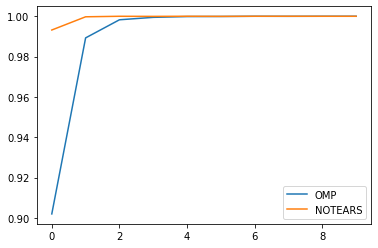

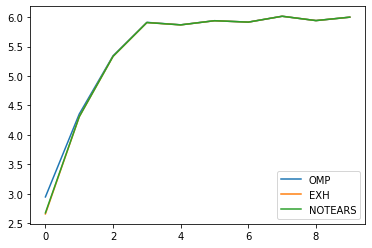

In [5]:
omp_relative = np.array(results[1]) / np.array(results[0])
notears_relative = np.array(results[1]) / np.array(results[2])

plt.plot(omp_relative, label = "OMP")
plt.plot(notears_relative, label = "NOTEARS")
plt.legend()
plt.show()

plt.plot(results[0], label = "OMP")
plt.plot(results[1], label = "EXH")
plt.plot(results[2], label = "NOTEARS")
plt.legend()

### Varying number of edges

In [6]:
s_values = [0, 1, 2, 5, 7, 10, 15, 20]
iterations = 10

results = [[], [], []]

for s in s_values:
    ## First approach: A is a DAG, no model mismatch
    A_true = h.generate_A(n, s, tril = False, low = 0.25, high = 0.5)

    # set coefficients to be positive (else oscillating which does not make sense)
    for i in range(len(A_true)):
        A_true[i][i] = np.abs(A_true[i][i])
    
    tmp_results = [[], [], []]
    
    for _ in range(iterations):
        X = h.generate_var_2(100, n, A_true, P_true)
    
        tmp_results[0].append(h.score(X, m._OMP(X), W_true, printing = False)[4])
        tmp_results[1].append(h.score(X, m._Exh(X), W_true, printing = False)[4])
        tmp_results[2].append(h.score(X, m._notears_2(X), W_true, printing = False)[4])
        
    results[0].append(sum(tmp_results[0]) / len(tmp_results[0]))
    results[1].append(sum(tmp_results[1]) / len(tmp_results[1]))
    results[2].append(sum(tmp_results[2]) / len(tmp_results[2]))

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 2.398081733190338e-14.
rho: 9.999999999999999e+25.
loss: (3.5221889170788563, array([-1.07321860e-04, -5.93115156e+00,  9.89299536e-01, -5.88644520e-03,
       -4.19756103e+04,  6.82164784e-02,  5.06106655e+04,  3.83826450e-04,
        3.38531691e+03,  6.67208417e-02,  1.07615834e+05, -9.13220643e-02,
        9.89536334e+03, -2.31038283e-01,  6.15621474e-04,  1.63682905e-02,
        7.26593774e+04,  2.66909662e+00, -3.79151477e+04, -1.19683586e+05,
        8.70646762e+04, -1.48324150e-06, -3.66122860e+02, -3.71198804e+03,
        2.89476823e+00, -5.34434739e+01, -2.43807677e+00, -3.29976211e-06,
        5.90670257e-05, -1.32654842e-04, -3.08565710e+05,  2.72355156e+02,
        1.01759073e+05, -8.43661673e-04, -4.67353624e+03, -3.85553077e-05,
        1.07321860e-04,  5.93115156e+00, -9.89299536e-01,  5.88644520e-03,
        4.19756103e+04, -6.82164784e-02, -5.06106655e+04, -3.83826450e-04,
       -3.38531691e+03, -6.67208417e-02, -1.07615834e+05,  9.13220643e-02,
       -9.89536334e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.0154421224021593, array([-2.68975348e-04,  8.53523990e-03,  3.75112751e-03, -8.74368538e-03,
       -1.99354537e-01, -1.58549155e-03, -9.76980461e+02, -1.58947567e-05,
        1.11700265e-03,  6.10112626e-04, -2.73228746e-02,  4.62099613e-05,
       -3.66796682e+02,  2.12312161e+03, -9.56248244e-05,  1.81364209e-03,
        1.88363509e-03, -4.90057444e+02, -3.55142896e+02, -9.53280262e+02,
        1.01200324e+04,  3.40027737e-05,  4.53477602e-03,  8.68919330e+02,
        3.93065414e+03,  6.77049552e+03,  6.45888254e+01, -8.25714214e+03,
       -1.78003282e-04,  2.73697131e+03,  1.94520410e+03, -1.89710652e+02,
       -9.19797164e-04,  3.46285445e-03, -3.52114559e-02, -5.33148560e-05,
        2.68975348e-04, -8.53523990e-03, -3.75112751e-03,  8.74368538e-03,
        1.99354537e-01,  1.58549155e-03,  9.76980461e+02,  1.58947567e-05,
       -1.11700265e-03, -6.10112626e-04,  2.73228746e-02, -4.62099613e-05,
        3.66796682

  5%|████▎                                                                           | 39/720 [00:00<00:01, 382.48it/s]

h: 7.105427357601002e-15.
rho: 9.999999999999999e+25.
loss: (2.9434111185618033, array([-6.59541389e-05,  5.45237327e-02, -2.84453942e+00, -8.36096477e-01,
        2.76630640e-01, -2.04596603e-02, -1.14557894e+03, -3.05647693e-05,
       -1.32900719e-02, -1.54466102e+03,  3.08990907e+04,  2.04108548e+04,
       -2.50372095e+04, -7.08561902e+03, -1.04583014e-05, -2.08694970e+04,
        1.30030615e+03,  4.79674242e+03,  7.73709198e+03,  3.87136284e-03,
       -1.60382263e-01,  7.33014768e-04, -2.35771118e-03, -2.36077747e+03,
       -2.79622040e+04, -2.81625144e-02, -3.41693768e-01,  4.76433973e+03,
        3.02263837e-05, -4.46675048e+04, -1.83998315e+02,  1.90303793e-01,
       -7.40478292e-02,  1.27787674e-02,  4.16145572e-02,  3.39068988e-05,
        6.59541389e-05, -5.45237327e-02,  2.84453942e+00,  8.36096477e-01,
       -2.76630640e-01,  2.04596603e-02,  1.14557894e+03,  3.05647693e-05,
        1.32900719e-02,  1.54466102e+03, -3.08990907e+04, -2.04108548e+04,
        2.50372095e

  5%|████▎                                                                           | 39/720 [00:00<00:01, 390.00it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.7332510272262707, array([ 6.67719517e-05, -2.49131199e+02, -3.41164585e+03,  3.75833697e+03,
       -4.54185078e-03,  1.06080583e+03,  2.51054173e-03, -2.70309244e-06,
        1.15877058e+03,  2.40316754e+03, -2.65675009e-02, -5.65599612e+02,
       -4.50316714e-04,  1.27349911e-04,  1.68317581e-07, -3.32109011e-04,
       -1.79569347e-03, -7.27494496e-05,  4.06015251e-03, -6.51462840e-04,
        7.07174737e+02,  1.08863671e-04, -2.68596127e-02,  1.43388069e+03,
        7.98906941e+02,  4.49246103e+03, -1.04124532e+03, -2.57567210e+03,
        3.05774541e-03, -4.06586272e+03,  7.46007311e-03, -1.58820702e-03,
        7.70545754e+02,  9.72253725e-03,  1.58949658e-01,  9.27175762e-05,
       -6.67719517e-05,  2.49131199e+02,  3.41164585e+03, -3.75833697e+03,
        4.54185078e-03, -1.06080583e+03, -2.51054173e-03,  2.70309244e-06,
       -1.15877058e+03, -2.40316754e+03,  2.65675009e-02,  5.65599612e+02,
        4.50316714

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.7222827179807485, array([-5.24511589e-05, -2.69064259e+03,  5.20846555e+03, -1.08615293e+04,
        1.31411907e-04,  1.28015948e-03,  6.70599324e-03,  8.63871566e-05,
        2.16699356e+03, -1.32875797e+02, -3.45034890e-03, -4.80356462e-05,
       -2.22445799e-01,  2.25192545e-03, -6.04886816e-05, -4.11706600e+03,
        1.02718126e-03, -5.98015119e-04,  3.31981932e-01,  2.70702627e-02,
       -1.18562612e-01,  2.00670849e-04,  2.54497018e-03, -1.31360031e-04,
       -2.47786283e+03, -2.57502966e+03,  3.45693442e+03,  3.02325227e+03,
       -1.14721702e-05, -1.99524358e+03,  5.44500089e+03,  2.28818704e+02,
       -1.69315255e+03, -2.77554811e+02,  1.22306302e-03, -1.99171923e-05,
        5.24511589e-05,  2.69064259e+03, -5.20846555e+03,  1.08615293e+04,
       -1.31411907e-04, -1.28015948e-03, -6.70599324e-03, -8.63871566e-05,
       -2.16699356e+03,  1.32875797e+02,  3.45034890e-03,  4.80356462e-05,
        2.22445799e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (2.760201730164649, array([-2.47362601e-05,  1.33861182e-05,  7.33284948e-04,  3.35643439e-04,
        8.61759795e-05,  1.00992974e-03,  1.65305961e-04,  1.91923237e-06,
       -2.47195970e-05, -1.56679562e-02, -5.45069517e-02,  3.64764810e-04,
        1.90844714e-02, -5.29352700e-06, -3.46105972e-05,  4.28677754e-03,
        1.16242562e-02, -1.96087407e-04,  6.13372334e-03, -3.12592786e-05,
        6.49723896e-05, -4.60668286e-05,  3.28744705e-05, -5.23910508e-04,
        1.17350560e-02, -5.62142423e-05, -1.37871787e-04, -5.95976611e-02,
        1.10175297e-05,  4.10540228e-04,  1.70354490e-02,  1.36539424e-02,
        1.45835623e-02,  1.16141086e-02,  2.32835785e-03, -1.98115801e-04,
        2.47362601e-05, -1.33861182e-05, -7.33284948e-04, -3.35643439e-04,
       -8.61759795e-05, -1.00992974e-03, -1.65305961e-04, -1.91923237e-06,
        2.47195970e-05,  1.56679562e-02,  5.45069517e-02, -3.64764810e-04,
       -1.90844714e-02,  5.29352700e-06,  3.46105972e-

  6%|████▍                                                                           | 40/720 [00:00<00:01, 395.96it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.908628846891471, array([ 1.07054359e-04, -1.32505450e+04,  4.01179548e+02,  9.30454912e-01,
        1.79342375e-01,  9.13028352e+02, -2.78658314e-03,  6.56674530e-06,
        1.67208503e-02, -1.13887578e-01,  1.32332386e-03, -1.21055794e-02,
       -4.75678004e-04,  6.41509652e+01,  3.67888575e-04,  1.26516194e-02,
       -1.93065260e-03, -1.40888126e+04, -1.64928078e+04,  7.40599289e+03,
       -1.00617504e+04, -8.07814073e-05, -1.30397254e+04,  2.03003957e+04,
       -4.58338212e+04, -7.41258178e+01, -9.24701987e+02, -3.97330265e-01,
        3.03142951e-05, -2.41502972e+04, -4.12176843e-03,  1.70748717e+03,
       -1.13606404e-02,  2.81156977e-03,  1.46078478e-01, -2.62969289e-05,
       -1.07054359e-04,  1.32505450e+04, -4.01179548e+02, -9.30454912e-01,
       -1.79342375e-01, -9.13028352e+02,  2.78658314e-03, -6.56674530e-06,
       -1.67208503e-02,  1.13887578e-01, -1.32332386e-03,  1.21055794e-02,
        4.75678004e-

  5%|████▏                                                                           | 38/720 [00:00<00:01, 377.88it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (3.0552289913271555, array([ 1.19483008e-05, -1.80292212e-02,  9.69545093e-03, -6.84710198e+03,
       -3.14536133e-01, -2.75724987e-02, -7.34695908e+03,  1.88303843e-04,
       -3.71067237e-01, -1.18259849e+04, -1.56025359e-02,  1.76113873e-01,
       -1.92660876e+04,  6.84537139e+03,  1.38397001e-04, -1.07368118e+04,
       -8.09346977e-02, -1.92204825e+03, -6.48692203e-03, -1.18965694e-02,
       -1.07342726e-02,  1.33402602e-05,  1.09043129e-01,  1.56060677e-02,
       -1.83174727e+04,  8.71182848e+03, -1.33728463e+04, -6.18560831e+03,
        2.95296428e-05,  1.20854684e+04, -5.98493837e+03,  9.89625904e+02,
       -4.57838662e-01,  4.42056960e+02,  1.65958553e-02,  6.51450013e-05,
       -1.19483008e-05,  1.80292212e-02, -9.69545093e-03,  6.84710198e+03,
        3.14536133e-01,  2.75724987e-02,  7.34695908e+03, -1.88303843e-04,
        3.71067237e-01,  1.18259849e+04,  1.56025359e-02, -1.76113873e-01,
        1.92660876e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.811232041294089, array([-9.55252483e-06, -3.68578750e-01, -4.21418992e-03,  2.53142836e-04,
       -3.07601334e-05, -9.79976466e-03,  1.19522166e+04,  2.43191523e-04,
        1.68381408e+03, -7.34117012e+00,  1.59065881e-03,  6.87015592e+03,
        5.76017674e+03, -1.23647326e-02,  1.01307196e-05, -6.65656658e-03,
        1.54910980e-02, -6.28149946e-03, -1.88922636e+03,  8.13105704e+02,
        1.88499439e+04, -7.82312978e-05,  1.15268315e-03,  8.06056517e+03,
       -3.01474195e+02,  1.42661450e+03,  9.11873191e+03, -2.99709338e+03,
       -1.32284434e-05,  1.35747586e+04,  3.40229491e+02,  2.13801956e-03,
        8.51004566e+03,  8.48781920e-03,  3.19443061e-02, -2.43409439e-05,
        9.55252483e-06,  3.68578750e-01,  4.21418992e-03, -2.53142836e-04,
        3.07601334e-05,  9.79976466e-03, -1.19522166e+04, -2.43191523e-04,
       -1.68381408e+03,  7.34117012e+00, -1.59065881e-03, -6.87015592e+03,
       -5.76017674e+

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 4.263256414560601e-14.
rho: 9.999999999999999e+25.
loss: (4.696317853925711, array([ 1.44900973e-04, -1.09234651e+05,  3.10228158e-02,  2.52825487e+04,
        1.36259387e+01, -2.44439883e+04,  9.50503520e+00, -1.61351555e-04,
       -4.51033987e+00,  1.71256281e-01,  2.15681050e+01,  6.84681266e+00,
        8.30949103e+03, -1.17071312e+05,  4.52775956e-05,  8.26948876e+02,
        1.27403277e+01, -8.54933870e+04,  1.08182328e+01, -2.86862915e+04,
       -6.93191956e+00, -1.66550293e-04, -4.26614301e-01, -2.05539079e+05,
        7.95837956e+04, -1.54836913e+05,  1.23112260e+05,  1.93445128e+05,
       -2.24026381e-04, -5.32986791e+04, -1.44482866e-01, -1.16522568e+05,
       -2.22499125e-01,  6.71063361e-02, -1.34878791e+01, -7.46839521e-05,
       -1.44900973e-04,  1.09234651e+05, -3.10228158e-02, -2.52825487e+04,
       -1.36259387e+01,  2.44439883e+04, -9.50503520e+00,  1.61351555e-04,
        4.51033987e+00, -1.71256281e-01, -2.15681050e+01, -6.84681266e+00,
       -8.30949103e+

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 291.73it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 8.881784197001252e-15.
rho: 9.999999999999999e+25.
loss: (3.0168083840589714, array([ 8.93241758e-05, -3.61875079e+04, -1.60355969e+04,  6.45708982e+03,
       -2.77919901e+04, -2.44990859e-04,  1.12709410e+00,  5.86311632e-04,
        4.61043642e+04, -5.15618765e+04,  3.51413833e+03,  8.31794371e-03,
        4.95532790e-03,  1.20493777e-02,  1.30070904e-06,  2.30814031e+04,
       -1.22034061e-04,  1.24704849e-02, -2.36091972e-02, -1.26749170e-02,
       -8.20536343e-02, -1.21398014e-05, -6.31454789e-04,  1.10517129e-04,
        6.51704451e-02,  1.16457476e+00, -2.01616463e+03, -7.41831229e+02,
        3.81210646e-04,  1.81195758e-01, -1.13321854e+02, -2.88646136e+03,
       -1.31007238e+04, -5.96445450e+02,  1.84843681e+04,  1.89902446e-04,
       -8.93241758e-05,  3.61875079e+04,  1.60355969e+04, -6.45708982e+03,
        2.77919901e+04,  2.44990859e-04, -1.12709410e+00, -5.86311632e-04,
       -4.61043642e+04,  5.15618765e+04, -3.51413833e+03, -8.31794371e-03,
       -4.95532790e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 6.572520305780927e-14.
rho: 9.999999999999999e+25.
loss: (7.445028457539421, array([ 1.56771451e-04, -2.28101684e+01,  2.16715237e-01, -6.80599848e+04,
       -3.88646038e+00, -9.72343298e+04, -1.04254379e+05,  9.69447522e-04,
       -2.07561863e+05, -4.27095112e+04,  1.73072630e+05,  1.07638574e+05,
        3.62015477e+04, -8.07095815e+01,  5.93692149e-04, -1.89491572e+05,
       -2.55993370e+00, -3.88972316e+04, -4.48049890e-02,  3.88874382e-02,
       -2.65018626e-01,  2.15616733e-07, -2.82459635e-01,  2.08870902e-02,
       -6.51800683e+04, -3.27406640e+01,  9.81225042e+04,  1.53844910e+05,
        1.85670976e-05,  3.53785445e+04, -1.48973002e+01,  9.19901635e+02,
        6.86846952e+01, -4.71502114e+04, -2.10199023e+02, -1.71654183e-04,
       -1.56771451e-04,  2.28101684e+01, -2.16715237e-01,  6.80599848e+04,
        3.88646038e+00,  9.72343298e+04,  1.04254379e+05, -9.69447522e-04,
        2.07561863e+05,  4.27095112e+04, -1.73072630e+05, -1.07638574e+05,
       -3.62015477e+

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.865174681370263e-14.
rho: 9.999999999999999e+25.
loss: (2.9860732668415446, array([-3.71410539e-05, -3.01755673e+03,  2.87599796e-02, -9.73225959e+04,
       -1.19722299e+05,  8.39620039e+03, -4.03337448e-01, -5.33206848e-06,
       -4.65805470e-03,  4.02936806e-02,  3.14333064e+02, -5.52071992e+04,
       -4.31706909e+04, -1.22695937e+04, -3.24029993e-06,  1.67587239e+05,
       -7.86041621e+04,  6.84853631e+03,  1.10573964e+00,  1.33224746e+04,
       -2.83052641e-02,  1.95749519e-05, -1.62726101e+04, -1.08215245e+04,
        2.65175423e+01, -3.58477364e-01, -9.12720618e-02, -4.89328077e+00,
       -3.97301949e-06, -9.58896936e-02,  1.31995021e-01, -1.88485353e-02,
        2.21908901e-02, -2.87016895e-02, -1.73474772e+04,  1.85042136e-05,
        3.71410539e-05,  3.01755673e+03, -2.87599796e-02,  9.73225959e+04,
        1.19722299e+05, -8.39620039e+03,  4.03337448e-01,  5.33206848e-06,
        4.65805470e-03, -4.02936806e-02, -3.14333064e+02,  5.52071992e+04,
        4.31706909e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (3.191354235034273, array([ 3.58342321e-05, -8.04815522e-03,  8.56721441e-05,  2.35627910e+03,
        4.05093634e-01,  5.26701963e-03,  6.80347735e+02, -5.64602035e-06,
       -8.31927482e-03, -7.30359791e+03, -1.46204794e+03,  3.49434886e+03,
       -2.09716459e+03,  6.12068963e+03, -1.33101104e-04, -6.67199982e+03,
        7.48133258e+03,  1.76583786e+02, -5.64892235e-01,  3.68424111e-03,
       -4.42696586e-03,  2.01245273e-04, -1.19744852e+00,  3.87524010e-04,
        9.51266309e+03,  1.92177506e-03,  1.09531269e-01, -1.63490619e+04,
       -1.04347927e-04, -2.71853430e-03, -6.76393240e+03,  1.17451855e-03,
       -6.65897963e-04,  2.55942833e+03, -1.69541667e+03, -3.80352055e-05,
       -3.58342321e-05,  8.04815522e-03, -8.56721441e-05, -2.35627910e+03,
       -4.05093634e-01, -5.26701963e-03, -6.80347735e+02,  5.64602035e-06,
        8.31927482e-03,  7.30359791e+03,  1.46204794e+03, -3.49434886e+03,
        2.09716459e+

  6%|████▍                                                                           | 40/720 [00:00<00:01, 396.25it/s]

h: 0.0.
rho: 1e+24.
loss: (2.6250542856722094, array([-1.64904374e-04,  7.23785372e-04,  1.03142042e-03, -5.80608439e-02,
        4.79105468e-02,  1.77822518e-01, -1.44198235e-02, -1.79563985e-04,
       -2.74253135e-02, -1.78427219e-02, -9.24623815e-04,  8.86237975e-02,
       -1.68034814e-04,  3.47081157e-04,  4.56847057e-05, -4.11857369e-02,
       -3.19704546e-05,  3.06450560e-05, -2.57265911e-03,  3.13419665e-04,
       -1.06568122e-04, -1.06587632e-04, -1.58161818e-04, -2.93547648e-04,
        1.03864292e-04,  6.23585613e-05,  2.84932421e-02,  1.21497460e-02,
        6.98136033e-05, -2.51824338e-05,  1.78770870e-04, -2.01979640e-06,
       -7.85113950e-02,  1.51895251e-01,  7.01792419e-03, -2.39224330e-06,
        1.64904374e-04, -7.23785372e-04, -1.03142042e-03,  5.80608439e-02,
       -4.79105468e-02, -1.77822518e-01,  1.44198235e-02,  1.79563985e-04,
        2.74253135e-02,  1.78427219e-02,  9.24623815e-04, -8.86237975e-02,
        1.68034814e-04, -3.47081157e-04, -4.56847057e

  5%|████▏                                                                           | 38/720 [00:00<00:01, 376.23it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.7841040945547055, array([-4.60434117e-06, -1.74674288e+03, -9.50935978e+00, -9.91065626e+02,
       -4.64774188e+03, -1.95396875e+03,  1.60623212e-03, -4.69641222e-04,
        1.73176248e-03,  8.10897435e+03, -1.07607694e-02, -1.18708835e-01,
        1.67919948e-05, -5.40004723e+02, -2.01220743e-04,  5.92933284e+02,
       -1.07308579e-03,  3.24460646e-04, -7.08115213e-05, -1.95148464e-03,
       -1.11881795e-03,  1.13094676e-04, -1.98647604e-03,  2.11701662e-02,
        1.56000883e-02,  2.38351048e+03,  5.73519977e+02,  3.87113379e+03,
        1.19005673e-03, -9.05354340e-03,  2.40902897e-03, -2.23959713e+03,
        1.43553613e+02,  7.46496835e+03, -1.59231063e+03,  3.78090357e-04,
        4.60434117e-06,  1.74674288e+03,  9.50935978e+00,  9.91065626e+02,
        4.64774188e+03,  1.95396875e+03, -1.60623212e-03,  4.69641222e-04,
       -1.73176248e-03, -8.10897435e+03,  1.07607694e-02,  1.18708835e-01,
       -1.67919948

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 4.618527782440651e-14.
rho: 9.999999999999999e+25.
loss: (5.335584953370393, array([ 1.57247886e-04, -3.64235264e+04, -2.34960055e+01,  4.00299889e+01,
        6.65043822e+04,  1.07072941e-01,  2.83992422e-03, -8.66160625e-06,
        4.82981458e-02,  4.59980821e-03,  5.26511495e-02,  3.94141833e-01,
       -3.51686374e+04,  1.19949261e+04,  1.57106093e-03, -3.54287909e+01,
        2.55331273e+02,  3.50839385e-02,  2.04177993e+04,  1.47274650e+03,
        1.95059806e+04,  8.43451494e-07, -3.65917131e+04, -1.84373741e-03,
       -2.78312449e+01, -1.64119584e+04,  6.64508231e+01,  3.45980114e+01,
        9.08986974e-05,  4.52883770e-02,  3.29304774e+04, -4.88077411e+04,
        4.79026023e+04, -1.33731625e+04,  1.63755954e+04, -1.54581494e-06,
       -1.57247886e-04,  3.64235264e+04,  2.34960055e+01, -4.00299889e+01,
       -6.65043822e+04, -1.07072941e-01, -2.83992422e-03,  8.66160625e-06,
       -4.82981458e-02, -4.59980821e-03, -5.26511495e-02, -3.94141833e-01,
        3.51686374e+

  6%|████▍                                                                           | 40/720 [00:00<00:01, 399.96it/s]

h: 9.769962616701378e-15.
rho: 9.999999999999999e+25.
loss: (3.0445900577998892, array([-1.31568543e-04,  5.78718779e+04,  2.16908652e-02, -4.05893467e+04,
        2.38361599e-02, -3.15836513e+04, -5.33889898e-02, -2.65948842e-06,
        7.20755178e-01,  1.26372716e-02,  1.01730415e-01, -9.22959120e-02,
       -2.32968132e+02, -5.69621955e+04, -7.83148843e-06,  8.68396686e+01,
       -3.88909581e-02, -1.17581199e+04,  1.71488220e+00,  1.76403090e+03,
        1.01785281e-02,  2.28436086e-05, -8.44702223e-03,  9.54385400e-01,
        4.43084122e+03, -8.42652596e+03,  1.53995109e+04,  5.56905175e+03,
        7.84301240e-05,  9.28320387e+03, -9.06791081e-01, -3.78349669e+03,
        6.65178498e-02,  7.17226233e+03, -3.29926428e-02, -3.56979430e-06,
        1.31568543e-04, -5.78718779e+04, -2.16908652e-02,  4.05893467e+04,
       -2.38361599e-02,  3.15836513e+04,  5.33889898e-02,  2.65948842e-06,
       -7.20755178e-01, -1.26372716e-02, -1.01730415e-01,  9.22959120e-02,
        2.32968132e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.4210854715202004e-14.
rho: 9.999999999999999e+25.
loss: (3.351849207745814, array([ 3.58739896e-05, -2.49838361e-01,  7.97912842e+04, -5.88867432e+04,
        8.21267934e+04,  5.11272792e+04,  2.36141094e+03, -2.71367180e-04,
        4.43452706e+04, -8.17393969e+04, -3.96526895e+04, -1.06630999e+05,
        2.60375819e+00,  9.59611075e+00, -4.11851369e-05, -3.67189853e-01,
       -3.42465386e-01,  2.82909240e+04, -2.78809612e-01, -1.38830188e+00,
        4.01100403e+04,  6.83207557e-05,  1.60937972e-02,  3.01428688e+04,
        2.37145136e-01,  3.91764835e-01, -2.57241028e+04, -5.61885209e+03,
       -1.85390340e-05, -5.50585549e+04, -6.36902933e-01, -4.03390057e-02,
       -5.33783459e-02, -1.96975574e-02, -1.51169816e-01, -4.61370060e-06,
       -3.58739896e-05,  2.49838361e-01, -7.97912842e+04,  5.88867432e+04,
       -8.21267934e+04, -5.11272792e+04, -2.36141094e+03,  2.71367180e-04,
       -4.43452706e+04,  8.17393969e+04,  3.96526895e+04,  1.06630999e+05,
       -2.60375819e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.8925665033588612, array([ 5.58766807e-05,  9.46311628e+03, -4.90533274e+03, -8.24720975e+03,
       -1.76055514e+01, -3.25394724e+03,  1.48776633e-02, -3.74184364e-04,
       -1.58484588e+03, -6.61264368e+03,  6.53586722e+03, -3.18197162e+02,
        1.86549024e-01, -7.16620952e-02, -6.07756573e-05, -6.78135186e-03,
       -3.92436799e+03,  3.16574310e+03, -5.48009603e-02, -5.55264898e-02,
        8.94849489e+03,  2.90436535e-04, -6.28010268e+03, -7.97320280e+03,
       -7.86914985e-04,  5.95539551e-01,  2.76192601e-02,  5.59576728e-02,
       -1.71941756e-05,  6.94130995e+03,  9.14952895e-05, -2.05080484e-04,
        1.62684500e-03, -2.78904101e-02, -1.49936455e-03, -1.65146047e-06,
       -5.58766807e-05, -9.46311628e+03,  4.90533274e+03,  8.24720975e+03,
        1.76055514e+01,  3.25394724e+03, -1.48776633e-02,  3.74184364e-04,
        1.58484588e+03,  6.61264368e+03, -6.53586722e+03,  3.18197162e+02,
       -1.86549024e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 373.45it/s]
..\notears\notears\notears\linear.py:77: RuntimeWarning: overflow encountered in multiply
  G_smooth = G_loss + (rho * h + alpha) * G_h
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.8533688844565557, array([-8.52365905e-05, -5.73791970e-05,  8.38788641e-04, -8.84901135e-04,
       -4.90113840e-02,  2.42193914e-03, -7.89035408e+02, -5.57243112e-06,
       -4.44078437e+04,  7.81433252e+03, -1.44994546e+03,  2.08922528e+04,
       -1.29230820e+03, -3.42350464e-03,  8.01303515e-05, -1.11841497e-03,
       -5.05383752e-03, -1.59230345e-02,  1.10770941e+03,  3.58729206e-02,
       -9.77952949e+02,  6.09225732e-05, -1.09726349e-03, -1.10257689e-02,
        1.01163106e+04,  1.41081392e-03,  5.04443719e+03, -7.44718917e+02,
       -4.34712087e-04,  4.27047615e+03,  5.10918848e+03, -9.39782542e-03,
       -4.29048985e+03,  6.24324317e+02,  4.43201236e-03, -2.13759502e-04,
        8.52365905e-05,  5.73791970e-05, -8.38788641e-04,  8.84901135e-04,
        4.90113840e-02, -2.42193914e-03,  7.89035408e+02,  5.57243112e-06,
        4.44078437e+04, -7.81433252e+03,  1.44994546e+03, -2.08922528e+04,
        1.29230820

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.0658141036401503e-14.
rho: 9.999999999999999e+25.
loss: (2.9942181958058773, array([ 1.20827852e-04, -1.04426281e-02, -8.15228541e+04, -2.20247396e-02,
       -1.55284288e-04,  2.57684918e-01, -2.58842998e+04,  3.58345233e-06,
       -1.29605181e+05,  8.56102485e+04,  4.23162226e-01,  7.27708579e+04,
        6.84557445e-02, -1.40120459e-02,  2.01718589e-06,  3.80190293e-03,
        1.03120511e-04, -2.90499089e-02,  3.46601273e+04, -2.91626104e-01,
        9.27498890e+03,  4.73146935e-05,  3.86252245e+00, -4.24290047e-01,
       -1.93927914e+03, -3.83384768e+04, -3.65393624e+03,  6.79470473e+04,
       -6.78931236e-05,  4.32799395e+04,  5.92649028e+04, -1.70971432e-02,
       -3.74725733e+04,  1.21754301e+05, -5.78447518e-01,  4.61524550e-05,
       -1.20827852e-04,  1.04426281e-02,  8.15228541e+04,  2.20247396e-02,
        1.55284288e-04, -2.57684918e-01,  2.58842998e+04, -3.58345233e-06,
        1.29605181e+05, -8.56102485e+04, -4.23162226e-01, -7.27708579e+04,
       -6.84557445

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 382.12it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  5%|████▎                                                                           | 39/720 [00:00<00:01, 385.99it/s]

h: 4.529709940470639e-14.
rho: 9.999999999999999e+25.
loss: (5.123537950974114, array([-3.88302013e-06,  2.14436459e-02, -1.01041805e+05, -5.91711584e-03,
        1.28250253e-01, -2.91982325e+03, -1.53812439e+05, -2.24107106e-04,
        4.36356940e+05, -1.03234600e+04, -1.70166292e+05, -7.07809417e+04,
        1.33275538e-01, -2.81943386e-02, -1.01534521e-05, -4.76676063e-01,
        6.40123697e-02, -1.41803242e+04, -2.38038374e+04, -3.36634071e+01,
       -1.61267034e+05, -1.14901202e-04,  5.75669587e+04,  1.46051275e+05,
        2.19521101e+05,  9.75436462e+01, -4.58748153e+04,  5.07864195e+01,
       -4.19879797e-04,  6.02463484e+04,  3.09273298e-03, -9.90751773e-04,
       -6.22331464e-02,  1.48591742e-01,  1.26037998e-01,  3.64237411e-07,
        3.88302013e-06, -2.14436459e-02,  1.01041805e+05,  5.91711584e-03,
       -1.28250253e-01,  2.91982325e+03,  1.53812439e+05,  2.24107106e-04,
       -4.36356940e+05,  1.03234600e+04,  1.70166292e+05,  7.07809417e+04,
       -1.33275538e-

  5%|████▏                                                                           | 38/720 [00:00<00:01, 376.14it/s]

h: 1.865174681370263e-14.
rho: 9.999999999999999e+25.
loss: (3.023072640969895, array([-1.68245605e-05, -9.76420415e+03, -7.56942843e+03, -4.18883746e+03,
        4.62178378e+04,  8.30204350e+03, -1.13308950e+00,  1.17849310e-04,
       -3.78519642e+04,  3.06031409e+00, -3.11764472e+03, -9.97366697e+03,
        1.92669643e+00, -8.31864529e-03,  7.73055724e-05,  1.23284292e-02,
        3.55208004e+03, -1.76093590e-02, -2.30288541e+00, -4.33844556e+04,
       -7.86117248e+03, -7.28543936e-06, -4.22947089e+03,  4.59061156e+04,
        2.03635416e+01, -7.91935562e-01,  4.45532054e+00, -5.62519626e+00,
        1.63123406e-04,  4.13849880e-01, -1.84089008e+00, -1.51010043e-01,
        1.01293457e+05, -4.64534450e-01, -1.05680117e+05,  4.48397409e-05,
        1.68245605e-05,  9.76420415e+03,  7.56942843e+03,  4.18883746e+03,
       -4.62178378e+04, -8.30204350e+03,  1.13308950e+00, -1.17849310e-04,
        3.78519642e+04, -3.06031409e+00,  3.11764472e+03,  9.97366697e+03,
       -1.92669643e+

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 3.552713678800501e-14.
rho: 9.999999999999999e+25.
loss: (4.315221575660303, array([-6.29673230e-05, -1.26678962e-01,  1.87236913e+04,  3.88382562e-02,
        4.76499714e-02, -1.53460229e-01,  5.61505081e+04,  3.24179952e-05,
       -1.28152768e+04,  2.34024313e+04,  2.53019564e+04,  9.19289101e+03,
       -5.83331369e-02,  6.48759752e-05,  9.21254808e-06,  1.30198975e+00,
        5.71883038e-04,  1.02245167e-03, -1.28620739e+02, -2.75996392e-02,
        4.73296296e+04, -3.32558724e-04, -2.03965377e-02,  4.26766145e+02,
        8.55769173e+03,  4.71867289e-02,  1.14805569e+04,  2.70327958e+04,
       -1.20075102e-04,  3.14244704e+03,  1.07542401e+04, -5.35610737e-02,
       -1.02937067e+04,  9.78142088e+04,  2.14894520e-04,  6.02094310e-05,
        6.29673230e-05,  1.26678962e-01, -1.87236913e+04, -3.88382562e-02,
       -4.76499714e-02,  1.53460229e-01, -5.61505081e+04, -3.24179952e-05,
        1.28152768e+04, -2.34024313e+04, -2.53019564e+04, -9.19289101e+03,
        5.83331369e-

  5%|████▎                                                                           | 39/720 [00:00<00:01, 386.00it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.8638441253533653, array([ 3.22419372e-05,  1.04692758e-05,  6.14097308e-05,  4.98555268e-05,
        5.70810386e-04,  1.69486509e+02, -5.94797288e+02, -3.58465204e-05,
       -5.59332826e+03,  1.37989057e+02, -2.02003664e-02, -1.90134471e+04,
        5.61481451e+02, -5.68573067e-03,  3.62266415e-04,  2.42813575e+03,
        1.46204067e-01,  9.97599520e+02,  1.20585340e+03, -4.17525969e-05,
       -2.02415617e-02,  6.56735126e-07, -3.62114192e-04, -7.58593707e+02,
       -1.76819202e+03,  3.29201522e+02,  8.39433349e+03, -2.02035474e+03,
        3.71683048e-04, -3.14009373e+01,  3.13100502e-05, -2.77761914e-03,
       -4.07658861e-04,  9.15297504e-05,  4.76180061e-04,  1.55490269e-05,
       -3.22419372e-05, -1.04692758e-05, -6.14097308e-05, -4.98555268e-05,
       -5.70810386e-04, -1.69486509e+02,  5.94797288e+02,  3.58465204e-05,
        5.59332826e+03, -1.37989057e+02,  2.02003664e-02,  1.90134471e+04,
       -5.61481451

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 382.36it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 9.769962616701378e-15.
rho: 9.999999999999999e+25.
loss: (2.9524801675896692, array([ 2.08927402e-05,  1.68347590e-01, -4.56153338e-02,  1.26013303e-02,
       -1.20906020e-02,  1.61411845e-01, -3.63241679e+04, -1.14419970e-04,
       -8.72991749e+04,  7.69137966e+03, -1.82000187e+04,  4.79783160e+03,
       -1.36865179e+04, -1.13446126e-02,  1.50938030e-04, -3.44034368e-04,
       -4.53492318e+04,  1.80019583e-03, -6.63058848e+04,  2.12053003e-02,
       -5.55102421e+02,  1.05678427e-04, -6.73032984e+03, -3.31768389e+04,
       -2.06345825e+04,  9.77309557e-03,  1.16056330e-02, -6.80863553e-04,
        3.11975998e-05, -3.35279524e-02,  3.37378650e+04, -2.46175522e-03,
        1.20689535e+03, -1.15741163e+01,  2.22215317e+04,  1.28186249e-04,
       -2.08927402e-05, -1.68347590e-01,  4.56153338e-02, -1.26013303e-02,
        1.20906020e-02, -1.61411845e-01,  3.63241679e+04,  1.14419970e-04,
        8.72991749e+04, -7.69137966e+03,  1.82000187e+04, -4.79783160e+03,
        1.36865179e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 373.05it/s]
..\notears\notears\notears\linear.py:76: RuntimeWarning: overflow encountered in double_scalars
  obj = loss + 0.5 * rho * h * h + alpha * h + lambda1 * w.sum()
..\notears\notears\notears\linear.py:77: RuntimeWarning: overflow encountered in multiply
  G_smooth = G_loss + (rho * h + alpha) * G_h
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.4210854715202004e-14.
rho: 9.999999999999999e+25.
loss: (2.887955181270512, array([ 1.48151728e-05, -7.91317958e-02, -1.83462875e+03, -1.66648451e+05,
       -2.57571954e-01, -1.08333692e+05, -2.36811558e+04,  5.82652688e-05,
       -7.05254497e+05, -6.40799126e+04, -3.39465699e+04, -2.42659187e+04,
       -1.35019938e-01, -6.01439960e-02, -1.51717001e-05,  1.07912854e+05,
        3.49021611e+00,  3.06836915e+04,  2.01037878e-01, -2.32850997e-02,
       -4.93765299e-02, -8.20538902e-06,  1.00965983e+00, -6.51584973e-03,
        3.74666572e+04,  1.98283092e+00,  6.48983631e+04, -1.07117052e+05,
        1.06613013e-04,  1.19495438e+05,  1.50237602e-01, -9.14701225e-03,
        8.74069596e-01,  4.39192560e+03, -1.06075023e+00, -6.22126687e-05,
       -1.48151728e-05,  7.91317958e-02,  1.83462875e+03,  1.66648451e+05,
        2.57571954e-01,  1.08333692e+05,  2.36811558e+04, -5.82652688e-05,
        7.05254497e+05,  6.40799126e+04,  3.39465699e+04,  2.42659187e+04,
        1.35019938e

  5%|████▎                                                                           | 39/720 [00:00<00:01, 389.87it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.7019064703473195, array([ 1.09907031e-05, -1.42124489e-03,  1.52395329e-01,  1.09192885e-02,
        8.99438449e-03, -4.25464888e+02,  4.02126475e+03,  9.01057814e-06,
        5.87521439e+03, -2.93410386e+02, -4.25508206e+02,  2.75543707e+03,
        4.30743374e+03, -2.75057387e-04, -1.17763364e-04, -5.61256186e+02,
        1.93497603e+02, -5.14455282e+01, -1.61481856e+04, -2.40008546e-05,
        5.91080487e-03, -7.91898002e-05,  2.83406941e-03,  2.08970907e+03,
        3.55119260e+03,  5.35302821e-04, -1.91182412e-03,  6.79461030e+03,
        1.22234355e-04, -7.67581184e+02,  2.57488882e-04, -6.56265058e-04,
       -1.33842607e-03,  3.37592518e-03, -9.66348521e-04,  1.57556836e-07,
       -1.09907031e-05,  1.42124489e-03, -1.52395329e-01, -1.09192885e-02,
       -8.99438449e-03,  4.25464888e+02, -4.02126475e+03, -9.01057814e-06,
       -5.87521439e+03,  2.93410386e+02,  4.25508206e+02, -2.75543707e+03,
       -4.30743374

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.81376632374805, array([-3.30570852e-04, -2.11061419e-04,  2.16125816e-01, -8.88470542e-03,
        1.17627288e-02, -5.09543604e-02,  2.87393045e+03, -1.83639469e-05,
       -2.47234764e+03,  1.78471433e+03, -1.68194990e+03,  4.59814985e+02,
        1.79546999e+03, -1.78412122e-05, -1.37159163e-03,  4.95495052e-05,
        2.69061695e+03,  3.42000664e+03,  1.56178325e+03, -2.82100866e-04,
       -6.18933180e+02, -1.38910604e-05,  2.17238077e+03,  5.95458392e+02,
       -2.41997540e+03, -3.26049104e-03, -4.44962057e-02, -9.82997450e-04,
        5.83252261e-05,  2.00197473e-03,  8.74736944e+02, -2.02405559e-04,
        4.21946341e-02, -3.27555377e-04, -4.78758598e+03,  3.59003444e-05,
        3.30570852e-04,  2.11061419e-04, -2.16125816e-01,  8.88470542e-03,
       -1.17627288e-02,  5.09543604e-02, -2.87393045e+03,  1.83639469e-05,
        2.47234764e+03, -1.78471433e+03,  1.68194990e+03, -4.59814985e+02,
       -1.79546999e+

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.2434497875801753e-14.
rho: 9.999999999999999e+25.
loss: (3.144339031108224, array([-2.54444680e-05,  1.84020556e+04, -5.94367255e+02, -2.59763947e+04,
       -1.98702290e+04,  2.73567459e+03,  2.46812326e-03,  7.41916347e-05,
       -5.19139540e-03,  6.94926749e-03, -4.73816825e-01, -1.51019097e-01,
       -1.36844383e-04,  2.13284061e+04,  4.27555061e-05,  3.24519016e+04,
        2.02642390e+03, -5.79844280e+04, -1.32389312e-02,  2.10008973e+03,
        2.25752980e+01,  1.55093563e-04,  3.13741629e-01,  1.80429779e+04,
       -8.57199829e-04,  3.17936207e+04, -2.43483100e-01, -2.24216062e+02,
       -1.38104919e-04, -4.89018785e+04, -1.45048324e-04, -3.89964252e+03,
       -2.13660936e-02,  3.42672266e+00, -9.21021315e-02, -1.43361276e-04,
        2.54444680e-05, -1.84020556e+04,  5.94367255e+02,  2.59763947e+04,
        1.98702290e+04, -2.73567459e+03, -2.46812326e-03, -7.41916347e-05,
        5.19139540e-03, -6.94926749e-03,  4.73816825e-01,  1.51019097e-01,
        1.36844383e

  5%|████▎                                                                           | 39/720 [00:00<00:01, 382.34it/s]

h: 0.0.
rho: 1e+20.
loss: (2.9249430393897597, array([ 7.31774223e-05,  7.89787796e-02, -1.29057733e-03, -3.76641265e-02,
        3.81641341e-02, -1.21286497e-02,  9.10956311e-06,  1.59494224e-04,
       -3.18246620e-04,  3.39614997e-02, -2.79866575e-02, -4.37110004e-02,
       -9.10378535e-03,  5.94503173e-03,  2.45846811e-05,  1.87403380e-02,
       -2.15503287e-02,  1.94810681e-02,  3.54940866e-06, -8.49114538e-05,
       -9.76788828e-06,  4.71068536e-06, -2.11016089e-03, -6.04952646e-05,
       -8.35547193e-05, -7.19925693e-04,  1.41168046e-03, -1.04791437e-02,
       -3.14465724e-04,  1.47674129e-02, -1.55935853e-05, -2.80611762e-04,
        3.86139816e-04,  9.23957361e-02, -1.10264448e-04, -5.53848396e-05,
       -7.31774223e-05, -7.89787796e-02,  1.29057733e-03,  3.76641265e-02,
       -3.81641341e-02,  1.21286497e-02, -9.10956311e-06, -1.59494224e-04,
        3.18246620e-04, -3.39614997e-02,  2.79866575e-02,  4.37110004e-02,
        9.10378535e-03, -5.94503173e-03, -2.45846811e

  6%|████▌                                                                           | 41/720 [00:00<00:01, 401.96it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.1881385207452335, array([-4.77295833e-05, -1.06338774e+04,  4.08399581e+03,  1.46872882e+02,
       -3.38461300e+03,  1.23793850e+03,  5.96397392e-04, -1.73360270e-04,
        9.45411564e-03,  1.13309175e-01,  1.51641233e-02,  9.19266370e-03,
        4.63405027e-02,  6.57420369e+03,  4.07034414e-05,  6.24629948e-03,
        1.14854478e+03,  1.24857742e+03, -8.88796005e-04,  5.03043942e+03,
       -4.56167472e+03,  2.22813750e-04,  5.33905987e+01,  2.99942200e+03,
       -7.25754458e-05, -5.16501495e+03,  5.35452541e-04, -5.29574193e-04,
       -2.35577948e-06,  2.03185892e+03, -5.64662210e-04, -4.56304239e+03,
       -5.81376317e-04, -9.85407141e-03, -3.42630435e-03,  1.27302917e-04,
        4.77295833e-05,  1.06338774e+04, -4.08399581e+03, -1.46872882e+02,
        3.38461300e+03, -1.23793850e+03, -5.96397392e-04,  1.73360270e-04,
       -9.45411564e-03, -1.13309175e-01, -1.51641233e-02, -9.19266370e-03,
       -4.63405027

  5%|████▎                                                                           | 39/720 [00:00<00:01, 389.98it/s]

h: 2.6645352591003757e-15.
rho: 9.999999999999999e+25.
loss: (2.9872593507600538, array([ 7.36380837e-05,  3.70301626e+04, -4.21872553e+03, -7.08078809e+03,
        4.73014994e+03, -7.35017045e+03,  4.51903043e-03,  1.06188658e-03,
       -7.20073731e+02,  6.28870408e+03, -2.92869480e+03,  1.41123535e+04,
       -1.20779088e-02,  1.82725350e-02, -1.64811297e-04,  5.76108324e-03,
       -1.06462139e-03,  2.17945556e+04, -9.22136862e-03,  5.24946314e-03,
        2.98364024e+03,  1.38715675e-05, -4.21322100e-03,  7.59747219e+03,
       -6.21494113e-03, -1.25331538e-02, -2.15019781e+03, -1.50732265e+04,
       -7.86344038e-05,  1.47472197e+04,  2.66445839e-02,  1.11818455e-01,
       -9.94085207e-03,  3.06440297e-03, -1.71979054e-02, -1.10310290e-04,
       -7.36380837e-05, -3.70301626e+04,  4.21872553e+03,  7.08078809e+03,
       -4.73014994e+03,  7.35017045e+03, -4.51903043e-03, -1.06188658e-03,
        7.20073731e+02, -6.28870408e+03,  2.92869480e+03, -1.41123535e+04,
        1.20779088

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (2.7362310208999086, array([ 3.55704975e-05, -4.15250663e-02,  1.70577469e-04,  2.67412185e-04,
       -1.41988235e-02, -5.60971518e-03, -6.25701501e-05, -2.70064816e-05,
       -1.29022484e-03, -1.25061719e-03, -1.12212686e-04, -2.66870762e-04,
        4.71173165e-03,  8.25676150e-03,  2.54494795e-04,  1.59825487e-02,
       -2.88928416e-04, -5.31384171e-03,  1.55422132e-02, -7.33561438e-03,
       -2.39461227e-04, -3.37039982e-05,  3.92337644e-03, -2.21460417e-03,
        1.53628280e-05,  1.47722391e-02, -5.16473803e-04, -2.95537947e-04,
       -4.29988657e-05,  5.72969630e-03, -2.63503522e-05, -6.04993153e-02,
        4.94925141e-04,  1.76718922e-04,  3.32101345e-04,  3.35224680e-05,
       -3.55704975e-05,  4.15250663e-02, -1.70577469e-04, -2.67412185e-04,
        1.41988235e-02,  5.60971518e-03,  6.25701501e-05,  2.70064816e-05,
        1.29022484e-03,  1.25061719e-03,  1.12212686e-04,  2.66870762e-04,
       -4.71173165e-03, -8.25676150e-03, -2.54494795e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 374.02it/s]
..\notears\notears\notears\linear.py:76: RuntimeWarning: overflow encountered in double_scalars
  obj = loss + 0.5 * rho * h * h + alpha * h + lambda1 * w.sum()
..\notears\notears\notears\linear.py:77: RuntimeWarning: overflow encountered in multiply
  G_smooth = G_loss + (rho * h + alpha) * G_h
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 2.3092638912203256e-14.
rho: 9.999999999999999e+25.
loss: (3.4652498457179925, array([-4.16087928e-05,  1.46764176e+05,  1.09323896e-01,  2.66010771e-01,
       -5.95602351e+05, -1.65052738e+03,  7.98302528e-03, -5.58170621e-06,
       -4.41035587e-02,  4.55989784e-01, -6.93363164e-02,  2.36626277e-02,
       -1.94422291e+03, -6.97788701e+04, -5.01021314e-05, -4.42118447e+00,
       -5.09715610e+04, -1.08070859e+05,  1.53224674e+04,  3.65795848e+04,
        1.31458102e+04,  1.35429498e-04,  6.35352927e+04,  1.65254973e+05,
       -6.39293949e-02, -1.90263663e+04,  4.63164062e-02, -2.69096102e+00,
        8.92485188e-05, -1.69086630e+04, -3.78534916e-02,  8.78355430e+04,
       -3.96778232e+00,  1.68957813e+00, -3.73726177e+00,  1.06284603e-04,
        4.16087928e-05, -1.46764176e+05, -1.09323896e-01, -2.66010771e-01,
        5.95602351e+05,  1.65052738e+03, -7.98302528e-03,  5.58170621e-06,
        4.41035587e-02, -4.55989784e-01,  6.93363164e-02, -2.36626277e-02,
        1.94422291

  5%|████                                                                            | 37/720 [00:00<00:01, 370.00it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.927727194611033, array([ 7.45039639e-05, -9.13897014e+03,  1.00641627e+03, -4.40475260e-02,
       -3.07686007e+04,  3.30398799e+04,  1.92944807e-02, -5.57096335e-06,
        4.80308318e-03,  2.19554475e-01,  5.34488010e-01, -7.79074928e-02,
        5.45584801e-02, -2.31817780e+03, -1.70259835e-04,  8.51661480e-03,
       -1.04066211e+04, -9.77154305e+03, -2.13641093e+04, -2.85852355e+04,
        8.69046783e+03, -6.98258603e-06,  1.71362515e+04, -3.83278508e+03,
       -3.06567459e-02,  1.05912053e+04,  6.63516026e-03, -4.93852232e-02,
        2.95983783e-05,  2.46183246e+04,  2.66333159e-01,  1.17696723e+04,
       -2.98096594e-02, -6.19397679e-03, -1.13854267e-01,  5.46286551e-06,
       -7.45039639e-05,  9.13897014e+03, -1.00641627e+03,  4.40475260e-02,
        3.07686007e+04, -3.30398799e+04, -1.92944807e-02,  5.57096335e-06,
       -4.80308318e-03, -2.19554475e-01, -5.34488010e-01,  7.79074928e-02,
       -5.45584801e-

  5%|████▎                                                                           | 39/720 [00:00<00:01, 386.13it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.836918344706992, array([ 2.52716254e-05, -2.93424701e+03,  2.08200156e+04, -1.58055494e-03,
       -1.00694002e+04, -6.14848812e+02,  4.78279132e-04,  5.51592665e-04,
        1.40750941e+01,  5.75735603e-03, -9.37192227e+03, -1.56639393e+04,
        7.06211379e-03, -7.11358053e-02,  4.71723758e-04, -1.76803282e-04,
        1.14771077e+04,  6.21559722e+03, -1.20245564e+01, -3.94339924e+03,
        1.63283248e+03, -6.72996424e-05, -1.06443892e+03,  2.30419392e+03,
       -2.27317402e-04,  1.29619374e-01, -3.87696597e-03, -4.33870972e-04,
       -2.14479302e-05,  9.55490576e+02, -1.09989377e-05,  5.73671719e-01,
       -4.65615567e-02, -5.39194268e-06, -3.00805243e-02, -2.29401409e-04,
       -2.52716254e-05,  2.93424701e+03, -2.08200156e+04,  1.58055494e-03,
        1.00694002e+04,  6.14848812e+02, -4.78279132e-04, -5.51592665e-04,
       -1.40750941e+01, -5.75735603e-03,  9.37192227e+03,  1.56639393e+04,
       -7.06211379e-

  5%|████▏                                                                           | 38/720 [00:00<00:01, 368.93it/s]

h: 7.105427357601002e-15.
rho: 9.999999999999999e+25.
loss: (3.171120388042962, array([-1.08756672e-04, -1.40226104e+05,  8.09104863e-04,  1.23851251e+04,
       -2.09195366e+04,  6.98835303e+04,  8.17115894e-03,  1.46990107e-05,
        5.42187643e-03, -1.34099689e+00, -5.95624414e-02,  1.06295842e-01,
       -1.96660013e+03,  3.38423769e+04,  1.00485575e-05, -1.29069943e+04,
       -1.78487905e+04, -5.30638236e+04, -2.39370522e-02, -1.74318342e+04,
        2.33292533e-03,  7.41873630e-04, -1.08955450e-01,  1.44769735e+04,
       -1.65592563e-01,  1.08833416e+04,  6.26794291e-03,  2.98322626e+04,
        9.77189570e-06, -1.15465367e+04, -1.06597434e-01, -1.95797055e+03,
       -1.61312212e-03,  7.55932420e-02, -1.45217804e-01,  6.04145116e-04,
        1.08756672e-04,  1.40226104e+05, -8.09104863e-04, -1.23851251e+04,
        2.09195366e+04, -6.98835303e+04, -8.17115894e-03, -1.46990107e-05,
       -5.42187643e-03,  1.34099689e+00,  5.95624414e-02, -1.06295842e-01,
        1.96660013e+

  5%|████▎                                                                           | 39/720 [00:00<00:01, 389.99it/s]

h: 0.0.
rho: 1e+20.
loss: (2.707645921150718, array([ 6.95674400e-06,  1.57641828e-02,  2.41983327e-02, -1.30135425e-02,
        6.40554686e-03,  6.67168765e-03,  5.50823835e-06,  2.36275921e-04,
        2.56746122e-03, -5.32756017e-03, -2.40492593e-02, -1.59992416e-02,
        7.63918468e-06,  1.84319690e-04, -1.13109079e-05, -4.06520633e-02,
       -9.46391876e-05,  4.90810490e-02, -9.94041057e-06,  4.32089945e-04,
        6.47990763e-05,  8.11866304e-06,  8.11118447e-05, -2.72657700e-03,
        1.93011910e-05,  3.58951469e-04, -3.01057570e-02,  4.69948249e-03,
        8.85164613e-05, -7.37927932e-03,  3.99285229e-06,  8.44389378e-04,
        6.72616661e-05,  1.18091732e-04,  1.01446330e-04, -4.66878931e-05,
       -6.95674400e-06, -1.57641828e-02, -2.41983327e-02,  1.30135425e-02,
       -6.40554686e-03, -6.67168765e-03, -5.50823835e-06, -2.36275921e-04,
       -2.56746122e-03,  5.32756017e-03,  2.40492593e-02,  1.59992416e-02,
       -7.63918468e-06, -1.84319690e-04,  1.13109079e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 374.99it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  6%|████▍                                                                           | 40/720 [00:00<00:01, 396.03it/s]

h: 7.105427357601002e-15.
rho: 9.999999999999999e+25.
loss: (2.4238249737198974, array([-2.09875989e-04,  2.33916974e+04,  2.82596279e+04,  3.00263820e+04,
       -3.30000537e+04,  9.59251767e+03,  1.48719718e+00, -4.88979091e-05,
        5.48642022e+04, -2.46877130e+04, -4.15815758e-01, -2.92755743e+03,
       -6.30703677e-01,  3.20774740e-02, -1.86330521e-04,  3.66601363e+04,
       -3.32230960e-02, -1.12115338e+04,  3.99993175e-03,  4.50018781e-04,
       -9.01274445e-02, -4.78174572e-06,  7.77827442e-03,  3.84263063e+04,
        1.87140641e-01, -2.93261715e+03,  1.27491762e+04, -1.44350795e+04,
       -1.60032296e-05, -1.70451918e+04, -1.10862632e-03, -5.68383750e-05,
        4.87485252e-03,  1.39641200e-03, -8.84743244e-03,  2.57153403e-06,
        2.09875989e-04, -2.33916974e+04, -2.82596279e+04, -3.00263820e+04,
        3.30000537e+04, -9.59251767e+03, -1.48719718e+00,  4.88979091e-05,
       -5.48642022e+04,  2.46877130e+04,  4.15815758e-01,  2.92755743e+03,
        6.30703677e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+22.
loss: (2.5560954773901434, array([ 7.16442839e-06,  1.97975956e-03,  2.57904923e-02,  4.31324254e-03,
       -6.22542423e-02,  6.18457822e-02, -7.11662351e-06,  8.86491070e-07,
        3.30218989e-01, -3.02051671e-01, -4.48029817e-02,  2.13712908e-01,
        4.82598411e-05, -5.83723601e-05,  2.08807674e-05,  1.84725025e-01,
       -2.67010565e-02, -7.32035297e-03, -3.00551479e-05, -2.78037394e-04,
       -2.73628651e-04,  7.27684834e-05, -5.50268111e-02, -2.13377269e-01,
       -5.55389722e-05, -1.20157122e-03, -1.15842562e-04,  2.96253732e-04,
       -7.67756438e-06,  7.25269645e-05, -1.24631713e-06,  2.13361720e-04,
       -7.28650751e-05,  8.06078200e-05,  1.22580691e-01,  4.70337553e-05,
       -7.16442839e-06, -1.97975956e-03, -2.57904923e-02, -4.31324254e-03,
        6.22542423e-02, -6.18457822e-02,  7.11662351e-06, -8.86491070e-07,
       -3.30218989e-01,  3.02051671e-01,  4.48029817e-02, -2.13712908e-01,
       -4.82598411e-05,  5.83723601e-05, -2.08807674e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 379.75it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.2434497875801753e-14.
rho: 9.999999999999999e+25.
loss: (3.03052415966427, array([-7.60806115e-05, -2.87193286e-02, -1.50675734e+04, -2.11078461e-01,
        2.64945761e+03,  3.38003099e-01, -4.03328065e+04, -3.02034759e-06,
        3.84835135e+04, -1.69361696e+04, -3.80641022e+04,  1.46802549e+05,
        1.34994431e-01,  1.49346150e-03, -1.41960535e-04, -1.66323946e-01,
        7.46743949e-02, -2.03547046e+00,  1.99554836e+04,  3.07492077e-02,
        9.78173436e+03, -6.41889072e-05, -6.52499477e+04,  2.50192502e+04,
        2.55360129e-01,  5.68149742e-02,  4.77905900e+04, -2.83154136e+00,
       -4.25507237e-04,  3.19051044e+00,  5.10718227e+04,  2.95285781e-02,
       -3.36976253e+04,  3.21300877e-01, -8.26362965e+04, -1.71897291e-04,
        7.60806115e-05,  2.87193286e-02,  1.50675734e+04,  2.11078461e-01,
       -2.64945761e+03, -3.38003099e-01,  4.03328065e+04,  3.02034759e-06,
       -3.84835135e+04,  1.69361696e+04,  3.80641022e+04, -1.46802549e+05,
       -1.34994431e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 7.105427357601002e-15.
rho: 9.999999999999999e+25.
loss: (3.091987320383625, array([ 1.94539270e-04,  5.55963682e-01, -1.52621746e-01,  3.92301706e+04,
       -1.12275442e+04,  8.18087858e+03, -2.56912728e+03,  1.27590288e-05,
        8.36525772e+03,  5.38379328e+03,  1.23385307e+04,  1.51176494e+02,
       -7.42361688e+03,  1.66885346e-01,  6.49668783e-05,  3.71425304e+04,
        2.50315665e+03,  1.27911965e+04,  7.75082799e-02,  8.46271917e-05,
       -4.12687920e-01,  3.84934644e-05,  8.55450440e-04, -1.02408495e+03,
        2.83650771e-01, -9.35513240e-02, -9.63276107e-01,  1.32420962e+03,
       -3.18033416e-04, -1.42470563e+03,  3.26330109e-02, -1.11016334e-05,
       -5.02499374e-01,  2.36028906e-02,  3.72292227e-03,  3.82729575e-05,
       -1.94539270e-04, -5.55963682e-01,  1.52621746e-01, -3.92301706e+04,
        1.12275442e+04, -8.18087858e+03,  2.56912728e+03, -1.27590288e-05,
       -8.36525772e+03, -5.38379328e+03, -1.23385307e+04, -1.51176494e+02,
        7.42361688e+

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.6112981775973485, array([ 5.34887846e-05,  7.79804195e+03, -2.45055632e-02,  2.80263418e+04,
        8.44865379e+03,  1.90123188e+04, -4.19363185e-03,  3.52906660e-05,
        5.48447893e-02,  1.28288517e+04, -2.67605491e-03,  5.23642615e+03,
       -8.32099063e+03,  1.29430327e+04,  3.19675834e-04, -2.46587741e+04,
       -3.59909105e+03, -1.22981115e+04,  4.75448362e-02,  1.23687269e-02,
        2.13888822e-01,  5.40033506e-05,  3.54243199e-02,  6.04717214e+04,
        1.84870702e-03,  4.91545071e+03, -3.02767800e-02, -4.08880538e+03,
        3.03645163e-04,  5.64822180e+03, -3.69586127e-02, -1.24033091e-04,
        2.24322135e-02,  1.24851253e-02,  3.22717346e-03, -3.08782259e-05,
       -5.34887846e-05, -7.79804195e+03,  2.45055632e-02, -2.80263418e+04,
       -8.44865379e+03, -1.90123188e+04,  4.19363185e-03, -3.52906660e-05,
       -5.48447893e-02, -1.28288517e+04,  2.67605491e-03, -5.23642615e+03,
        8.32099063e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 2.6645352591003757e-15.
rho: 9.999999999999999e+25.
loss: (2.7542513769493056, array([ 4.16583267e-04,  8.45094161e+03, -4.48766120e+03,  1.10035639e+03,
       -8.01566013e+03,  1.80420602e+03,  2.97329705e-02, -8.84465113e-05,
       -1.68526927e+04,  6.88389452e+02, -1.25648954e-01, -6.76499300e+03,
        2.01026535e-02,  3.76325553e-03, -1.13819778e-04, -1.69016216e-02,
       -5.72456670e-03,  4.58037125e-03,  1.80556880e-03,  4.27890199e-04,
       -1.06973587e+04, -9.31350670e-05,  8.14940991e-04, -9.63990922e+03,
        6.25345170e-02,  2.51068149e+03, -6.17133795e+03,  4.90633876e+02,
       -6.31645435e-04, -3.12614288e+03, -8.26690129e-04,  4.76593001e-04,
       -3.44622553e+03,  1.29224181e-03, -2.30379378e-03, -5.21188645e-06,
       -4.16583267e-04, -8.45094161e+03,  4.48766120e+03, -1.10035639e+03,
        8.01566013e+03, -1.80420602e+03, -2.97329705e-02,  8.84465113e-05,
        1.68526927e+04, -6.88389452e+02,  1.25648954e-01,  6.76499300e+03,
       -2.01026535

  5%|████▏                                                                           | 38/720 [00:00<00:01, 376.12it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.7408795695516934, array([-1.95664010e-04, -2.02028556e+04, -1.41966339e+04,  6.15733635e+03,
        2.40425498e+03, -3.76817025e+02,  1.38472745e-01, -1.21424884e-04,
        4.23436563e+04,  2.08165740e+04, -2.74071583e-02, -4.21806041e+03,
       -2.33086139e-02,  2.51827742e-03, -2.19242705e-04, -4.27178798e-03,
       -1.25360739e-03,  2.18374958e-03,  3.87486583e-04,  8.46250188e-03,
        3.85708212e+03, -5.45274393e-05,  3.49286177e-01, -3.03885338e+04,
        7.37993063e-03,  1.06233829e+04,  1.31149417e+03, -1.78774315e+04,
        5.01955103e-05, -3.71212494e+04, -2.02196429e-04,  1.00807136e-03,
        2.58814628e+03,  1.07100439e-01,  4.10596328e-01,  7.79018888e-05,
        1.95664010e-04,  2.02028556e+04,  1.41966339e+04, -6.15733635e+03,
       -2.40425498e+03,  3.76817025e+02, -1.38472745e-01,  1.21424884e-04,
       -4.23436563e+04, -2.08165740e+04,  2.74071583e-02,  4.21806041e+03,
        2.33086139e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+21.
loss: (2.6050935579247896, array([-2.74644838e-05,  5.46647654e-02, -1.00563784e-02,  9.12746477e-03,
        1.88913962e-03, -1.69071094e-02,  1.83447985e-03, -2.41933298e-04,
        2.11500988e-01,  1.59024054e-02,  5.30786683e-04,  6.42600663e-03,
        4.39157836e-05, -3.74837333e-04, -4.02497342e-05, -7.59032564e-02,
        8.09315027e-05, -3.33977380e-02, -6.24284559e-06, -4.69204926e-04,
        1.15651000e-03, -1.97296486e-04, -2.26411043e-03,  9.36411714e-02,
       -7.09882101e-05, -2.15663846e-02, -3.20066420e-03, -1.49237741e-02,
       -2.94423831e-04, -1.57557623e-01,  3.69449520e-05,  1.42153463e-05,
        6.17605091e-04, -3.63760575e-04,  3.67077564e-04,  1.03848145e-04,
        2.74644838e-05, -5.46647654e-02,  1.00563784e-02, -9.12746477e-03,
       -1.88913962e-03,  1.69071094e-02, -1.83447985e-03,  2.41933298e-04,
       -2.11500988e-01, -1.59024054e-02, -5.30786683e-04, -6.42600663e-03,
       -4.39157836e-05,  3.74837333e-04,  4.02497342e

  5%|████▎                                                                           | 39/720 [00:00<00:01, 389.85it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.8244380334991916, array([-6.88804468e-05, -3.37606403e-03, -3.95111027e+04,  1.48098825e+02,
        1.14806766e-01, -4.09342971e+04, -7.56815068e+03, -4.85054830e-06,
        5.92413987e+04,  1.08271647e+04,  7.30779531e-02,  1.54065920e+03,
       -1.19183216e-02,  1.95782972e-02, -1.26279210e-04,  4.39911698e-04,
        7.42358768e-02,  2.13947110e+04,  9.00486450e-03,  1.79757686e-02,
       -1.80266108e+03, -2.54701303e-04, -1.39832889e-01, -3.03732976e+04,
       -2.52239892e+04, -9.72469939e+03, -2.22533043e+04,  8.53468553e+03,
        6.50001814e-05, -2.50300850e+04, -4.85896623e-02,  5.18145281e-02,
        2.30920080e-01,  2.38316093e-02,  1.23267334e-01, -1.68696112e-04,
        6.88804468e-05,  3.37606403e-03,  3.95111027e+04, -1.48098825e+02,
       -1.14806766e-01,  4.09342971e+04,  7.56815068e+03,  4.85054830e-06,
       -5.92413987e+04, -1.08271647e+04, -7.30779531e-02, -1.54065920e+03,
        1.19183216e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 380.95it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  5%|████▎                                                                           | 39/720 [00:00<00:01, 386.13it/s]

h: 1.0658141036401503e-14.
rho: 9.999999999999999e+25.
loss: (2.9799731899402437, array([ 2.10934192e-05,  1.00388167e-02,  7.04848805e-01,  1.13837072e+04,
       -3.62642560e+03, -9.83024393e+03,  6.10635839e+03,  3.84524197e-05,
        7.56649921e+03,  9.48496464e+03,  4.30562355e+04,  1.87110487e+04,
       -1.21887955e+04,  2.99231970e-03,  1.23032159e-04,  2.09294665e+04,
        1.55040462e+03,  6.69861831e+04,  9.77676323e-02,  9.19252695e-03,
        2.13527194e+00,  4.43260867e-05,  3.90723569e+03, -1.45315517e+04,
        7.67088094e-03,  4.70448506e-02, -1.49016265e-02, -3.15041082e-02,
        6.29916478e-05, -1.35170767e+04,  3.92922752e-01, -6.08924757e-04,
        2.80403364e-01,  3.94077487e-01, -2.06718598e-01, -1.14678247e-03,
       -2.10934192e-05, -1.00388167e-02, -7.04848805e-01, -1.13837072e+04,
        3.62642560e+03,  9.83024393e+03, -6.10635839e+03, -3.84524197e-05,
       -7.56649921e+03, -9.48496464e+03, -4.30562355e+04, -1.87110487e+04,
        1.21887955

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (2.774528103539152, array([-3.81982322e-04, -2.48282972e-05,  3.69816752e-02, -3.55819043e-03,
        2.88159755e-02,  8.78223087e-02, -1.08270333e-02, -2.51116640e-05,
       -3.02011744e-03, -1.34639354e-02,  1.39074128e-01,  9.74323192e-03,
        1.28708300e-03, -4.22712209e-05, -2.49913713e-04,  2.53157931e-02,
        1.08773306e-02, -8.97820765e-03,  7.91580400e-04,  4.21341203e-04,
        1.00570042e-03,  1.98713904e-04,  2.43369359e-03,  1.79335471e-02,
       -6.09579231e-04, -1.18989989e-04, -5.57026136e-05,  3.55701323e-02,
       -5.95977895e-04, -1.01022966e-02,  1.64092587e-04, -8.09719432e-05,
       -2.02350427e-04, -3.22581372e-05, -2.62063495e-04, -9.67511844e-06,
        3.81982322e-04,  2.48282972e-05, -3.69816752e-02,  3.55819043e-03,
       -2.88159755e-02, -8.78223087e-02,  1.08270333e-02,  2.51116640e-05,
        3.02011744e-03,  1.34639354e-02, -1.39074128e-01, -9.74323192e-03,
       -1.28708300e-03,  4.22712209e-05,  2.49913713e-

  6%|████▍                                                                           | 40/720 [00:00<00:01, 395.96it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.9699210104645655, array([ 8.29493543e-05, -2.97942419e+04, -9.45663193e+03, -1.67531703e-01,
       -1.29805447e+04,  1.32112451e+04, -7.83905389e-01, -2.40109958e-04,
       -5.31168393e+04,  3.31167448e-03,  8.50320938e+04,  3.67671878e+04,
       -3.79491935e-03,  5.71503277e-03,  2.21296582e-04,  6.62014842e-04,
        2.10083754e-02,  1.68641119e+04, -7.81925182e+04, -1.22822356e+03,
        2.89276830e+03,  1.93685055e-04, -3.54585943e+04, -5.07602736e+04,
       -1.06814488e-03,  1.71717175e-02,  9.72791026e+03,  3.19663264e-02,
        1.28153631e-03,  7.68145449e+04,  1.00208895e-04,  2.43142752e-03,
       -5.29193389e-04, -5.31662467e-03, -5.64304180e-03, -2.80394440e-05,
       -8.29493543e-05,  2.97942419e+04,  9.45663193e+03,  1.67531703e-01,
        1.29805447e+04, -1.32112451e+04,  7.83905389e-01,  2.40109958e-04,
        5.31168393e+04, -3.31167448e-03, -8.50320938e+04, -3.67671878e+04,
        3.79491935e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 2.6645352591003757e-15.
rho: 9.999999999999999e+25.
loss: (3.20893339739555, array([ 1.58096835e-04, -1.47627122e+03,  3.37199751e+03,  2.55170214e+03,
       -1.30284073e+04,  5.31164659e+03, -2.25677301e-03,  2.07136433e-04,
       -2.55456128e+03,  6.14045503e+03,  5.51848483e+03, -2.72021409e+04,
        2.51729927e-02,  5.67482029e-03,  1.87924322e-04,  8.58665444e+03,
        2.81119561e-02,  2.77086969e+03,  7.21690873e-02, -2.34780064e-02,
        2.73921044e-02,  4.19879175e-04,  2.28873252e-01, -5.41231838e+03,
       -5.00372363e-03,  3.18029317e-03, -5.30784157e+03, -8.35792225e+03,
        1.77784256e-04, -9.68084887e+03,  2.25904559e-04,  1.04879327e-02,
       -1.35534224e-03,  4.06205863e-04, -2.45343637e-03, -2.74288862e-04,
       -1.58096835e-04,  1.47627122e+03, -3.37199751e+03, -2.55170214e+03,
        1.30284073e+04, -5.31164659e+03,  2.25677301e-03, -2.07136433e-04,
        2.55456128e+03, -6.14045503e+03, -5.51848483e+03,  2.72021409e+04,
       -2.51729927e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.694002663263362, array([ 6.31576461e-05, -1.53869704e-02,  1.11409612e+04, -5.51253625e+03,
        1.59503485e+04,  1.34970192e+04, -1.35515703e+04,  4.00334253e-05,
        1.52756094e+03, -1.02074305e+04, -2.28720871e+04,  2.28957644e+03,
       -6.57219898e-02,  2.45772666e-05, -1.03835144e-04, -7.95931817e-04,
       -1.55546143e+03,  1.54333405e+04, -4.91764852e-03, -7.10234944e-03,
        1.22128179e+02, -1.92457101e-05, -2.74024888e+03, -1.03732932e+04,
       -1.10554555e-03,  2.51525760e-03,  3.18090211e-04,  1.53760307e-04,
       -3.46630745e-06, -7.02544276e+03, -1.30898615e-03,  1.98755902e-04,
       -4.78712433e-04, -3.83817150e-04, -4.20706742e-04,  3.79666791e-05,
       -6.31576461e-05,  1.53869704e-02, -1.11409612e+04,  5.51253625e+03,
       -1.59503485e+04, -1.34970192e+04,  1.35515703e+04, -4.00334253e-05,
       -1.52756094e+03,  1.02074305e+04,  2.28720871e+04, -2.28957644e+03,
        6.57219898e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 9.769962616701378e-15.
rho: 9.999999999999999e+25.
loss: (3.0467270923954524, array([ 5.72460245e-03, -4.83744422e+04,  1.47485470e+03,  4.21295617e+03,
        5.93452715e+03, -1.09488758e+04, -8.86118040e+00, -1.83572701e-03,
       -3.89824294e+03, -3.84866095e-02, -2.14352281e+04, -1.21153179e+04,
       -9.36287360e-04,  3.53376281e-03,  2.56206447e-05,  2.68808722e-02,
       -1.95087793e-02,  2.89392440e+04, -1.25561321e-01,  2.67965719e+04,
        5.19041504e+03,  5.88146244e-05, -3.98865125e+03,  2.73917991e+04,
        2.00364730e-03,  4.50365673e-04,  5.22899575e+04,  3.43571289e-03,
       -3.64500736e-05,  2.08175188e+04, -1.76387799e-03, -1.18920889e-03,
       -5.68005978e-05, -7.97606390e-04, -8.95320218e-04, -5.73431953e-06,
       -5.72460245e-03,  4.83744422e+04, -1.47485470e+03, -4.21295617e+03,
       -5.93452715e+03,  1.09488758e+04,  8.86118040e+00,  1.83572701e-03,
        3.89824294e+03,  3.84866095e-02,  2.14352281e+04,  1.21153179e+04,
        9.36287360e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.990091500044023, array([ 4.32225619e-04,  1.94497855e-01, -3.20235586e+04, -5.86656718e-02,
       -3.31077064e+04,  1.63090986e+04,  2.21050666e+04, -4.76759792e-06,
       -1.82685941e+04,  4.40456907e+03,  1.87594722e+02, -3.22796189e+03,
       -3.30953413e-02,  5.85712099e-04,  4.53976933e-06, -1.31684418e+00,
       -4.76911461e+04, -1.31797708e+05,  3.86135729e+03, -1.08218467e-03,
       -2.09440097e+04,  5.36334370e-05,  2.85503066e+04,  1.05075860e+04,
       -7.54861225e-04,  4.95590108e-05, -7.70465179e-02,  7.37358736e-03,
        1.02317808e-04, -5.09110975e+03, -4.69951067e-04,  8.83309371e-05,
       -1.52981145e-02, -1.86890633e-04, -5.06395131e-05, -1.26702999e-05,
       -4.32225619e-04, -1.94497855e-01,  3.20235586e+04,  5.86656718e-02,
        3.31077064e+04, -1.63090986e+04, -2.21050666e+04,  4.76759792e-06,
        1.82685941e+04, -4.40456907e+03, -1.87594722e+02,  3.22796189e+03,
        3.30953413e-

  5%|████                                                                            | 37/720 [00:00<00:01, 366.22it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.971626409615981, array([ 4.12565889e-05,  2.74654370e-03, -2.07035424e-02, -1.10356963e-01,
       -1.31762291e+04, -1.36651521e+03,  3.72008590e+03,  1.16751268e-04,
       -6.78060429e+02, -2.86276629e-03, -1.26290310e+03,  8.48782511e+03,
        4.30194911e+03,  7.41237297e-05,  2.15799016e-04, -1.29767206e-02,
        5.01256682e+03, -5.99888592e+03,  9.59007291e+03, -6.66520927e+02,
        5.83986916e+03, -1.20839924e-04, -4.99084981e+03,  1.87708213e+04,
       -6.79013079e-03, -1.00070602e-04, -2.23738146e-02,  6.37522402e-03,
       -4.84972731e-05, -1.16988697e+04,  6.68542922e-05,  4.56870114e-04,
       -1.08246836e-04, -2.34830838e-03, -3.09764869e-04, -4.90413283e-06,
       -4.12565889e-05, -2.74654370e-03,  2.07035424e-02,  1.10356963e-01,
        1.31762291e+04,  1.36651521e+03, -3.72008590e+03, -1.16751268e-04,
        6.78060429e+02,  2.86276629e-03,  1.26290310e+03, -8.48782511e+03,
       -4.30194911e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 8.881784197001252e-16.
rho: 9.999999999999999e+25.
loss: (2.887459542413677, array([ 2.65635715e-04, -1.39201532e+02, -2.91598828e+03, -1.00291298e+03,
       -1.59073667e+03, -1.18222503e+04, -1.00368239e-03,  3.76415459e-04,
        3.14376855e+02, -7.32868486e+02, -4.27830443e+03, -9.31234200e+02,
       -2.28914287e-02,  3.43761786e-04,  2.31179137e-04,  3.81906991e+02,
       -9.22021999e+02, -3.75969830e+03, -1.58853324e-04,  1.27732947e-04,
        7.61105278e-04,  3.87125198e-04,  9.27793798e+02,  5.36990090e+03,
       -1.02311349e-03,  1.17385115e-04,  2.79042574e-04, -1.18433082e-04,
       -3.45703354e-06,  2.08330577e+03, -3.06714318e-03, -1.48521524e-05,
       -2.81025195e-04, -4.95847043e-04, -1.02372094e-03, -3.33602437e-04,
       -2.65635715e-04,  1.39201532e+02,  2.91598828e+03,  1.00291298e+03,
        1.59073667e+03,  1.18222503e+04,  1.00368239e-03, -3.76415459e-04,
       -3.14376855e+02,  7.32868486e+02,  4.27830443e+03,  9.31234200e+02,
        2.28914287e-

  5%|████▏                                                                           | 38/720 [00:00<00:01, 372.54it/s]

h: 2.6645352591003757e-15.
rho: 9.999999999999999e+25.
loss: (2.953953971285344, array([-9.74385731e-04, -1.20133328e+04,  1.89830911e+04, -2.81124202e-03,
        4.52434458e+03,  2.31228757e+04,  1.40824551e-01, -5.69263368e-05,
       -6.63478283e+03, -8.76721007e-03, -3.12229950e+03, -1.38477115e+04,
       -4.05873713e-02,  1.63014088e-03, -4.17301979e-04,  2.28692952e-02,
       -3.01890200e-02, -1.30710120e+02, -5.51965742e+03, -1.07097591e+04,
       -1.75891793e+04,  2.87093619e-04, -6.60889937e+03,  7.88630708e+03,
       -9.81508264e-03,  8.43446656e-05, -1.01459744e+04, -8.22997974e-04,
       -4.82919640e-04, -7.26350200e+03, -7.26852384e-04,  1.94744871e-04,
        1.73600638e-04, -5.55257236e-05, -2.61728064e-04, -2.93237015e-05,
        9.74385731e-04,  1.20133328e+04, -1.89830911e+04,  2.81124202e-03,
       -4.52434458e+03, -2.31228757e+04, -1.40824551e-01,  5.69263368e-05,
        6.63478283e+03,  8.76721007e-03,  3.12229950e+03,  1.38477115e+04,
        4.05873713e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.7536205593035215, array([ 8.68766204e-05,  3.01565650e-02,  7.65034250e-02, -9.34347276e+02,
       -4.40338010e+04, -6.11524325e+04, -1.40734987e+04,  1.02400419e-03,
        1.27718232e+04, -5.09225823e+03, -9.65281100e+03,  4.58175557e+04,
        2.66224770e+04,  2.10984062e-03,  1.56387830e-04, -2.86361882e+04,
       -3.41228061e+04, -1.56296722e+04,  1.20430133e-02, -1.22302751e-02,
        1.26066161e+00, -1.34870880e-04, -9.38394499e-02,  2.69258137e+04,
       -1.75377689e-02,  1.22884222e-03, -6.94266561e-02, -1.00491861e+04,
       -9.74200492e-05, -2.06031706e+04, -4.01438198e-02,  7.51268351e-03,
       -1.26573801e-03, -6.65405763e-04, -1.03896992e-02, -2.86224030e-06,
       -8.68766204e-05, -3.01565650e-02, -7.65034250e-02,  9.34347276e+02,
        4.40338010e+04,  6.11524325e+04,  1.40734987e+04, -1.02400419e-03,
       -1.27718232e+04,  5.09225823e+03,  9.65281100e+03, -4.58175557e+04,
       -2.66224770e

  5%|████▎                                                                           | 39/720 [00:00<00:01, 382.21it/s]

h: 0.0.
rho: 1e+20.
loss: (3.210296274275776, array([ 2.52715244e-05, -6.96414912e-02,  4.72464757e-04, -3.38087149e-02,
        2.21355923e-02,  6.01947612e-03,  1.30566517e-05, -3.75752738e-04,
       -9.21909493e-04, -4.10846716e-04, -4.46238211e-03, -1.67905184e-02,
        3.16217230e-05, -4.76781617e-02, -6.62953440e-06,  2.97751413e-02,
       -4.60475501e-03,  3.69487320e-03, -3.94757687e-05,  1.78291936e-04,
       -2.77754339e-03,  5.55464697e-04,  1.05065823e-03,  4.38334631e-04,
       -1.31219880e-04, -1.68019761e-04,  1.88022546e-04, -2.61759788e-04,
        1.79566895e-04,  2.24589408e-02, -1.97285295e-05,  7.76452098e-06,
        4.42013717e-04, -8.11405773e-05,  1.88659861e-03, -4.69325778e-04,
       -2.52715244e-05,  6.96414912e-02, -4.72464757e-04,  3.38087149e-02,
       -2.21355923e-02, -6.01947612e-03, -1.30566517e-05,  3.75752738e-04,
        9.21909493e-04,  4.10846716e-04,  4.46238211e-03,  1.67905184e-02,
       -3.16217230e-05,  4.76781617e-02,  6.62953440e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.955185530788466, array([-1.18419521e-04, -2.40741884e+03,  6.19891355e+03, -1.98506263e+04,
       -4.69169697e+03, -1.10486335e+04, -1.01408882e-04, -5.16378443e-05,
       -3.71722096e+03, -3.78295308e+03, -5.89499098e+02, -5.08333870e+02,
        3.50958588e-04, -3.11780678e-05, -7.38697528e-04,  4.24973182e-05,
       -2.61157774e+03,  3.59608038e+02,  1.63177842e-04,  7.94727242e-05,
       -1.76965501e+03, -4.23994556e-04,  4.08410232e+02,  4.83994587e+03,
        3.20861343e-04, -1.30265650e-04,  1.26442116e-04, -1.80654389e-05,
       -7.44596389e-05,  2.79903793e+04,  6.16940302e-04,  2.16069128e-04,
        8.33443123e-04, -3.36891339e-04, -6.36272599e-01,  7.04960132e-05,
        1.18419521e-04,  2.40741884e+03, -6.19891355e+03,  1.98506263e+04,
        4.69169697e+03,  1.10486335e+04,  1.01408882e-04,  5.16378443e-05,
        3.71722096e+03,  3.78295308e+03,  5.89499098e+02,  5.08333870e+02,
       -3.50958588e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 373.43it/s]
..\notears\notears\notears\linear.py:76: RuntimeWarning: overflow encountered in double_scalars
  obj = loss + 0.5 * rho * h * h + alpha * h + lambda1 * w.sum()
..\notears\notears\notears\linear.py:77: RuntimeWarning: overflow encountered in multiply
  G_smooth = G_loss + (rho * h + alpha) * G_h
  6%|████▍                                                                           | 40/720 [00:00<00:01, 388.48it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.2812490545713078, array([ 9.16453212e-04,  1.38492109e+04,  8.21108647e+02, -6.54667578e+02,
        2.70572272e+04,  2.59554203e+02, -3.62900071e-03,  2.88370977e-04,
        1.39538299e-02, -1.63297816e+03, -6.71778234e+02, -3.18967849e+02,
       -2.30870435e-03, -1.23757909e+04, -8.00638411e-05, -1.12812093e+04,
       -4.54067127e+02,  7.30236248e+04,  3.75483467e-03,  3.90261843e-04,
        1.26169035e-02, -1.30056630e-04, -1.06575004e+04,  3.91582226e+03,
        2.11011098e-03,  3.57519443e-03, -1.45675745e-03,  4.01753571e-03,
       -2.61962884e-04,  1.42193888e+03,  6.20400357e-04, -1.54020835e-04,
       -6.63962564e-03,  2.59324016e-06, -3.54512511e-04, -5.78504271e-06,
       -9.16453212e-04, -1.38492109e+04, -8.21108647e+02,  6.54667578e+02,
       -2.70572272e+04, -2.59554203e+02,  3.62900071e-03, -2.88370977e-04,
       -1.39538299e-02,  1.63297816e+03,  6.71778234e+02,  3.18967849e+02,
        2.30870435

  6%|████▍                                                                           | 40/720 [00:00<00:01, 399.77it/s]

h: 2.1316282072803006e-14.
rho: 9.999999999999999e+25.
loss: (3.577965026979646, array([ 8.80653407e-05, -4.69528817e+04, -9.41380327e+04,  1.03602234e+05,
       -1.16450538e+05,  2.33910254e+04, -5.01437404e-03,  3.66032745e-04,
       -1.37220725e+04,  8.29843192e+04,  1.43286904e+05,  3.10210394e+03,
       -1.44621106e-02, -3.30989215e-03, -1.46417053e-04, -1.62581730e+04,
       -7.56836996e+04,  3.08159569e+05,  7.95579273e-03,  8.24915765e-03,
       -1.07488257e-02, -3.38189818e-05,  2.86190986e+05, -1.45082060e+05,
       -4.50970978e-03,  8.55787514e-03, -3.10301210e-03,  1.90663735e-02,
       -3.84788731e-05,  1.70763730e+05,  1.58028455e-04,  4.63330578e-04,
       -6.62299757e-03,  8.38853272e-03,  4.22614748e+01,  1.12643437e-04,
       -8.80653407e-05,  4.69528817e+04,  9.41380327e+04, -1.03602234e+05,
        1.16450538e+05, -2.33910254e+04,  5.01437404e-03, -3.66032745e-04,
        1.37220725e+04, -8.29843192e+04, -1.43286904e+05, -3.10210394e+03,
        1.44621106e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 376.04it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.9539925233402755e-14.
rho: 9.999999999999999e+25.
loss: (3.655985755693485, array([-1.46227250e-05, -1.76292998e+03,  4.49203170e+03,  3.32818571e+03,
        6.17799743e+04, -1.37531323e+05, -2.57141188e-03, -3.10977596e-04,
        6.52500174e+04, -5.18406356e+03, -1.36736194e+03,  2.38188280e+04,
       -6.77343137e-03,  4.10798566e+01, -6.31688567e-04,  1.50670760e+01,
        9.76631592e+04, -1.11779213e+04,  2.41283064e-03,  2.49914435e-01,
       -7.46074793e+04,  6.67028489e-05, -1.41462273e+02, -7.13424189e+00,
       -2.32622368e-03,  5.81828494e-04, -2.88002278e-03,  3.49327264e-04,
        8.07796005e-06, -1.44872389e-02, -1.36218438e-02, -1.36659739e-03,
       -3.36372224e-03,  2.16639424e-03, -7.22049923e+04, -1.53634227e-04,
        1.46227250e-05,  1.76292998e+03, -4.49203170e+03, -3.32818571e+03,
       -6.17799743e+04,  1.37531323e+05,  2.57141188e-03,  3.10977596e-04,
       -6.52500174e+04,  5.18406356e+03,  1.36736194e+03, -2.38188280e+04,
        6.77343137e

  5%|████▎                                                                           | 39/720 [00:00<00:01, 389.98it/s]

h: 7.993605777301127e-15.
rho: 9.999999999999999e+25.
loss: (3.110648277945286, array([-6.58969396e-06, -2.26813809e+04, -9.18467816e+03, -3.00518546e+04,
       -2.30313388e+04,  3.53853428e+03, -8.08429822e-04,  1.45551751e-04,
        5.20278940e-01, -2.40172128e+03, -7.02574722e+04, -1.59088930e+04,
       -1.85660057e-04, -3.96743097e+04, -1.32855676e-03,  5.93538141e+04,
       -7.18026495e+03,  8.76539643e+04,  4.86056555e-04,  1.91727221e-01,
        3.09527962e+00,  1.50606090e-04, -2.23353120e+03,  6.86266344e+03,
       -1.12913243e-03,  2.91957339e-03,  1.59484451e-03,  2.99578801e-04,
       -4.38589950e-05,  3.25140591e-02,  1.83789090e-05, -7.44991266e-04,
       -3.04720974e-03,  2.78749139e-04, -4.56099812e+04,  2.43292364e-07,
        6.58969396e-06,  2.26813809e+04,  9.18467816e+03,  3.00518546e+04,
        2.30313388e+04, -3.53853428e+03,  8.08429822e-04, -1.45551751e-04,
       -5.20278940e-01,  2.40172128e+03,  7.02574722e+04,  1.59088930e+04,
        1.85660057e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+21.
loss: (2.8020833807810557, array([ 5.92875446e-05, -3.74540239e-03,  1.29414730e-02,  2.53311730e-02,
        7.08849933e-02, -3.44516025e-02,  8.86410502e-05, -1.06351198e-04,
       -4.92992615e-04, -5.98886831e-03,  3.61390882e-02, -6.75301588e-03,
        3.33289859e-05, -2.79863352e-02, -2.19493970e-04,  8.01627852e-03,
        4.79639220e-03,  1.27026763e-03, -1.64470031e-04,  3.50425529e-04,
        2.31861783e-03,  1.55147552e-03, -8.78445637e-02,  2.32215788e-03,
        4.62519462e-05,  1.66059270e-04,  1.95993282e-04,  7.33197172e-04,
       -3.60822655e-04, -1.54279808e-04,  4.09919847e-05,  3.53285413e-04,
        9.04949338e-05,  1.31219208e-03,  1.39080154e-02,  9.02688172e-05,
       -5.92875446e-05,  3.74540239e-03, -1.29414730e-02, -2.53311730e-02,
       -7.08849933e-02,  3.44516025e-02, -8.86410502e-05,  1.06351198e-04,
        4.92992615e-04,  5.98886831e-03, -3.61390882e-02,  6.75301588e-03,
       -3.33289859e-05,  2.79863352e-02,  2.19493970e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 7.105427357601002e-15.
rho: 9.999999999999999e+25.
loss: (3.0766756059097604, array([-1.62865641e-04, -1.60666342e+04,  1.96253985e+04, -9.56426316e+03,
       -4.87780726e+04,  2.49902396e+04, -1.43342035e-03, -1.82479737e-04,
        2.87977738e+00, -3.33291884e+04,  7.01335272e+02, -5.94298901e+04,
       -1.82555345e-03,  4.40757468e+04, -8.48839463e-05,  1.62189352e+04,
        1.34317945e+03, -1.24192383e+04,  1.86409510e-03,  3.07728846e-03,
        1.13329843e-01,  3.92263019e-04, -1.50597968e+04, -2.34954703e+04,
       -2.26694908e-03,  1.09854430e-03, -1.47670787e-03,  2.67368142e-03,
        1.91482086e-05, -3.09106684e+04,  3.24284310e-04, -2.60831687e-03,
       -6.68835327e-04,  9.43917013e-04,  1.41399631e-01, -9.22382845e-05,
        1.62865641e-04,  1.60666342e+04, -1.96253985e+04,  9.56426316e+03,
        4.87780726e+04, -2.49902396e+04,  1.43342035e-03,  1.82479737e-04,
       -2.87977738e+00,  3.33291884e+04, -7.01335272e+02,  5.94298901e+04,
        1.82555345e

  5%|████▎                                                                           | 39/720 [00:00<00:01, 386.18it/s]

h: 0.0.
rho: 1e+20.
loss: (2.6296400020584785, array([-7.94114061e-05, -1.06725251e-02, -4.65529928e-03,  1.61419138e-01,
        4.09511955e-02,  1.09214971e-01, -5.68468256e-05, -2.21813470e-04,
       -1.74038919e-02,  2.81606293e-03, -8.50447663e-02, -7.89575083e-03,
        6.74365763e-05,  3.96034380e-05, -3.93517422e-04,  3.52863460e-04,
        1.23730344e-03, -1.61055756e-02, -8.25425628e-05, -1.13653326e-04,
        6.78602233e-03, -2.42469031e-04, -4.70055390e-02, -1.32190487e-01,
       -5.39808664e-05, -2.30241238e-04,  3.45174041e-01, -1.74632093e-04,
        2.28284815e-04, -8.07788726e-02,  1.74258802e-04,  2.25273967e-04,
        2.78889068e-04, -6.97322613e-05, -6.69332005e-04, -1.67220180e-04,
        7.94114061e-05,  1.06725251e-02,  4.65529928e-03, -1.61419138e-01,
       -4.09511955e-02, -1.09214971e-01,  5.68468256e-05,  2.21813470e-04,
        1.74038919e-02, -2.81606293e-03,  8.50447663e-02,  7.89575083e-03,
       -6.74365763e-05, -3.96034380e-05,  3.93517422e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (3.0560787288576003, array([ 6.68925663e-06, -2.06591591e+04, -1.90540783e+04, -1.72539517e+04,
       -5.92741400e+04,  2.40188307e+04, -9.02203640e-03,  2.42612155e-05,
        1.19517377e+00,  1.27454542e+04, -4.35651542e+03, -2.82587504e+03,
       -6.66535070e-03, -2.02927456e+04, -3.56836268e-04,  2.55274707e+04,
       -1.88018146e+04, -2.22976895e+02,  3.66436857e-04,  6.37790626e-04,
        1.31313238e-01,  1.09432279e-04,  6.84557220e-02, -2.34772592e+03,
       -1.10153580e-02,  8.86626555e-03, -1.82359300e-02, -1.89618818e+04,
       -4.11465038e-06,  1.34071085e+04,  8.22640500e-04, -1.79270600e-03,
       -1.11875158e-03,  2.61964711e-02, -3.29684701e-01, -5.00085276e-05,
       -6.68925663e-06,  2.06591591e+04,  1.90540783e+04,  1.72539517e+04,
        5.92741400e+04, -2.40188307e+04,  9.02203640e-03, -2.42612155e-05,
       -1.19517377e+00, -1.27454542e+04,  4.35651542e+03,  2.82587504e+03,
        6.66535070e

  5%|████                                                                            | 36/720 [00:00<00:01, 352.89it/s]

h: 0.0.
rho: 1e+23.
loss: (3.3201442653700872, array([ 3.65949297e-04, -2.21487895e+00, -1.64920150e+00,  4.32482555e+00,
        2.13381518e-01,  1.50051255e+00,  1.08350990e-04,  1.05376656e-03,
        1.46771195e+00,  2.34875735e-01, -1.37965820e+01,  1.52927717e+00,
        3.29087526e-04,  3.18515853e-04,  2.49517821e-04, -1.14245022e+00,
        1.06780811e+00, -3.75082998e+00, -1.44143817e-03,  2.71240056e-04,
       -5.44887321e-05, -3.38246128e-04, -2.34380818e+00,  8.85369326e-02,
        2.24290830e-04,  3.21037846e-04, -1.91244572e-04,  1.17750257e-04,
       -1.96560674e-06,  1.54784709e+00,  1.56970296e-04, -3.53776119e-05,
        2.37134740e-04, -9.39704911e-04, -1.90948295e-04, -3.21522503e-04,
       -3.65949297e-04,  2.21487895e+00,  1.64920150e+00, -4.32482555e+00,
       -2.13381518e-01, -1.50051255e+00, -1.08350990e-04, -1.05376656e-03,
       -1.46771195e+00, -2.34875735e-01,  1.37965820e+01, -1.52927717e+00,
       -3.29087526e-04, -3.18515853e-04, -2.49517821e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 8.881784197001252e-16.
rho: 9.999999999999999e+25.
loss: (3.001554869191331, array([ 1.64681326e-04, -3.27981473e+03, -4.72453920e+03,  4.88537750e+03,
       -8.67866127e+03,  1.62523539e+04,  1.62889186e-03, -6.65928526e-04,
       -6.44205541e+03, -2.44755651e+03, -3.76377278e+01, -3.91111403e+03,
       -1.45754736e-03, -3.28914968e-04, -2.66870065e-04, -2.26027662e+03,
       -7.10638458e+03,  4.09148638e+03,  8.69630871e-03, -1.88873038e-03,
        2.14403799e-03, -3.09556833e-04,  1.33795138e+03,  3.66905858e+03,
       -1.61288728e-04, -5.57747228e-04, -1.11038594e-03,  1.69928705e-03,
       -6.98465247e-04, -4.32507997e+03, -9.17626080e-04,  1.33470757e-04,
       -3.05393451e-04, -1.40489697e-05,  5.10309862e-04, -1.90519626e-04,
       -1.64681326e-04,  3.27981473e+03,  4.72453920e+03, -4.88537750e+03,
        8.67866127e+03, -1.62523539e+04, -1.62889186e-03,  6.65928526e-04,
        6.44205541e+03,  2.44755651e+03,  3.76377278e+01,  3.91111403e+03,
        1.45754736e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (2.864498427336148, array([ 3.01234005e-04, -5.52413649e-02,  3.94110086e-02,  3.77308922e-02,
       -3.94864290e-02,  3.83388074e-02, -2.93941400e-04, -3.21387726e-04,
       -7.85364124e-02,  6.52633720e-02,  8.08225290e-02, -2.73444762e-02,
        7.99206705e-05,  4.85587059e-04, -7.60972523e-04, -8.82576674e-03,
       -3.17545165e-02, -2.32029132e-01,  1.59312163e-04,  2.91615075e-04,
       -7.38310588e-04, -3.75094227e-04, -2.01822741e-01, -1.34299474e-02,
        1.42967864e-04, -1.13494238e-04,  9.10026105e-04, -1.35393831e-04,
        1.87481477e-04,  2.59413264e-02, -3.91641489e-05,  2.71756246e-05,
        9.36275236e-05, -2.70022459e-04,  1.61753661e-04, -2.18346687e-04,
       -3.01234005e-04,  5.52413649e-02, -3.94110086e-02, -3.77308922e-02,
        3.94864290e-02, -3.83388074e-02,  2.93941400e-04,  3.21387726e-04,
        7.85364124e-02, -6.52633720e-02, -8.08225290e-02,  2.73444762e-02,
       -7.99206705e-05, -4.85587059e-04,  7.60972523e-

  5%|████▎                                                                           | 39/720 [00:00<00:01, 382.36it/s]

h: 0.0.
rho: 1e+23.
loss: (2.6386881517512673, array([ 2.58792035e-05,  4.55792663e-01,  2.07442324e+00,  3.66620996e+00,
       -2.66716992e+00,  1.09183796e+00, -3.82995319e-04, -1.19313450e-04,
        3.98249410e-01, -6.67387662e-01,  7.17035715e+00,  3.06677595e+00,
        6.07351431e-04,  1.28833601e-04,  7.67279989e-04,  1.37459979e+00,
        1.38605535e+00, -9.68342951e+00,  4.54771985e-04,  3.17813511e-06,
        2.39339479e-04,  4.80042841e-04, -1.81013056e-01, -2.97621994e-01,
        3.86933790e-04, -3.82188335e-05,  6.09025435e-05,  5.53324995e-04,
        9.28094989e-05,  2.61477407e-01,  7.67376863e-04,  5.83444369e-05,
        5.14350937e-04, -1.57957151e-04, -5.06245317e-04, -1.00508028e-03,
       -2.58792035e-05, -4.55792663e-01, -2.07442324e+00, -3.66620996e+00,
        2.66716992e+00, -1.09183796e+00,  3.82995319e-04,  1.19313450e-04,
       -3.98249410e-01,  6.67387662e-01, -7.17035715e+00, -3.06677595e+00,
       -6.07351431e-04, -1.28833601e-04, -7.67279989e

  5%|████                                                                            | 36/720 [00:00<00:01, 356.41it/s]

h: 0.0.
rho: 1e+22.
loss: (2.9678602190736036, array([-1.44495372e-04,  1.87471239e-01,  1.45316024e-01, -8.63355632e-01,
       -4.82004698e-02,  2.48291910e-01, -5.85283178e-04, -3.39233640e-04,
        1.48399044e-01,  1.72649537e-01,  8.73500157e-03, -1.25371646e-01,
        3.36925520e-04,  4.10961747e-04,  2.22815464e-04, -1.64905597e-02,
       -1.84403089e-02,  1.58485272e-01,  4.61215363e-04,  5.06692330e-04,
       -7.06886794e-05, -6.10483866e-05,  2.44958536e-02,  1.17003847e-01,
        7.14134640e-05, -9.04885212e-05,  1.40826016e-04, -4.82544098e-04,
       -4.38027774e-04,  1.91893813e-01,  9.66645126e-05, -3.60192725e-04,
        1.71864055e-04, -1.58727272e-04, -4.77390984e-04, -5.30252520e-04,
        1.44495372e-04, -1.87471239e-01, -1.45316024e-01,  8.63355632e-01,
        4.82004698e-02, -2.48291910e-01,  5.85283178e-04,  3.39233640e-04,
       -1.48399044e-01, -1.72649537e-01, -8.73500157e-03,  1.25371646e-01,
       -3.36925520e-04, -4.10961747e-04, -2.22815464e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (3.4139667276167636, array([-1.52066019e-04,  1.20469539e-02, -2.03617752e-02, -3.58712308e-02,
       -6.94981148e-03,  1.84422763e-02, -7.43270852e-05, -7.14007652e-05,
        6.34116316e-03,  3.84770430e-02,  1.31485406e-02,  1.42857759e-02,
        1.41936556e-04,  1.00164978e-03, -1.67531615e-03, -6.90730012e-02,
       -2.83046149e-02, -7.01055923e-03, -1.71817453e-04,  3.36520247e-04,
       -8.75435968e-04, -2.50642939e-04,  2.50591794e-02, -2.25880685e-02,
        1.17508377e-04,  5.95419246e-06,  1.24324774e-04, -3.11739253e-04,
       -4.44385812e-05,  1.91269902e-02,  1.13625216e-04,  1.39597128e-04,
        6.97583421e-04, -1.88957580e-04, -2.14066957e-05, -1.72745727e-04,
        1.52066019e-04, -1.20469539e-02,  2.03617752e-02,  3.58712308e-02,
        6.94981148e-03, -1.84422763e-02,  7.43270852e-05,  7.14007652e-05,
       -6.34116316e-03, -3.84770430e-02, -1.31485406e-02, -1.42857759e-02,
       -1.41936556e-04, -1.00164978e-03,  1.67531615e

  5%|████                                                                            | 36/720 [00:00<00:01, 359.99it/s]

h: 0.0.
rho: 1e+20.
loss: (3.1609627197095826, array([ 5.70677520e-05, -1.51192708e-01,  3.32848075e-03,  9.72544804e-02,
       -6.92447651e-02,  1.55638298e-02, -1.72251265e-04, -2.58992741e-04,
       -1.90165196e-01, -1.92899158e-02,  8.89417399e-02,  1.08394762e-01,
        4.12424290e-05,  2.64727473e-04,  1.09525904e-03, -4.11008282e-02,
       -7.18532724e-03,  9.20378284e-02, -1.45921804e-04, -2.57458569e-05,
        2.02914768e-04, -3.11925240e-04, -5.04823052e-02,  5.64249476e-02,
        1.90797036e-04,  2.77081268e-05, -2.85345784e-04,  5.50858432e-04,
       -1.47616089e-05,  6.84087464e-03, -3.21494167e-05, -8.44892283e-05,
       -2.62643979e-04, -1.23768853e-04, -3.17139602e-05,  5.17491073e-06,
       -5.70677520e-05,  1.51192708e-01, -3.32848075e-03, -9.72544804e-02,
        6.92447651e-02, -1.55638298e-02,  1.72251265e-04,  2.58992741e-04,
        1.90165196e-01,  1.92899158e-02, -8.89417399e-02, -1.08394762e-01,
       -4.12424290e-05, -2.64727473e-04, -1.09525904e

  5%|████                                                                            | 36/720 [00:00<00:01, 356.42it/s]

h: 0.0.
rho: 1e+22.
loss: (2.8606786488787406, array([-8.83044129e-05,  2.39129408e-02,  2.01505063e-02,  1.46815392e-03,
       -4.06881957e-03, -3.24759521e-02, -2.49505835e-04,  6.40086275e-06,
        3.02905817e-02, -5.66210650e-03, -6.88404875e-02,  1.28634621e-01,
        3.97838429e-04, -2.98895202e-05, -2.30177176e-04,  6.11014809e-03,
        3.05889556e-02,  2.32427658e-02,  6.03803454e-04,  4.44059529e-05,
       -2.51577975e-04,  1.75932987e-04, -3.90302984e-03,  1.66746676e-02,
        1.44494695e-05, -2.71536960e-05,  3.13215551e-04, -1.39477378e-04,
       -2.05211237e-04,  1.80040225e-02, -5.71712657e-05, -5.01322154e-05,
        1.68987930e-04,  1.20363737e-04, -1.61782821e-04, -2.09237533e-06,
        8.83044129e-05, -2.39129408e-02, -2.01505063e-02, -1.46815392e-03,
        4.06881957e-03,  3.24759521e-02,  2.49505835e-04, -6.40086275e-06,
       -3.02905817e-02,  5.66210650e-03,  6.88404875e-02, -1.28634621e-01,
       -3.97838429e-04,  2.98895202e-05,  2.30177176e

  5%|████▏                                                                           | 38/720 [00:00<00:01, 379.99it/s]

h: 0.0.
rho: 1e+20.
loss: (2.794662244853159, array([-1.39521247e-04, -2.70458320e-02, -1.41785953e-01, -1.35104563e-01,
       -1.14127631e-02, -2.20772550e-02, -2.72001021e-04, -3.90519324e-04,
        8.24714802e-02,  9.02044098e-04, -5.86007823e-02,  2.24596274e-01,
        2.47848757e-04,  1.03044278e-03, -1.99602731e-03,  5.27920585e-02,
        9.47129568e-03,  2.28508295e-02,  6.16802848e-06,  2.41819066e-04,
       -1.06981459e-03,  1.39733600e-05, -1.31623125e-01,  3.10190816e-02,
       -3.74762866e-05, -2.16104035e-04,  1.11743340e-03, -8.90731379e-06,
       -1.41895848e-05,  1.16282296e-02,  2.96479158e-05,  2.41329416e-04,
        1.97001134e-04, -5.25815591e-04, -3.89993208e-05,  3.30544965e-05,
        1.39521247e-04,  2.70458320e-02,  1.41785953e-01,  1.35104563e-01,
        1.14127631e-02,  2.20772550e-02,  2.72001021e-04,  3.90519324e-04,
       -8.24714802e-02, -9.02044098e-04,  5.86007823e-02, -2.24596274e-01,
       -2.47848757e-04, -1.03044278e-03,  1.99602731e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 380.94it/s]


h: 8.881784197001252e-16.
rho: 9.999999999999999e+25.
loss: (2.951117668609724, array([ 2.73755690e-06,  2.28038653e+02, -3.24859595e+03,  5.14105819e+03,
        1.82819954e+03, -6.20307086e+02,  9.04885029e-04, -1.43954087e-05,
       -6.70088386e+02, -4.13678937e+01, -5.67316554e+02,  1.16303959e+03,
       -1.75014275e-03,  1.85439166e-04, -2.31794981e-04, -3.66724617e+03,
       -1.92797287e+02,  2.04988482e+03,  8.57969161e-04, -1.15010410e-03,
        2.08135941e-03, -8.55069251e-05, -1.10937608e+03, -7.76436772e+02,
       -1.67894831e-04, -1.18751606e-04,  4.39842906e-04, -8.65828863e-05,
        6.29219594e-06, -1.07280078e+01, -4.83302344e-05, -5.70785950e-05,
       -3.99226519e-05,  9.40879145e-04,  3.08283567e-05,  8.10803078e-06,
       -2.73755690e-06, -2.28038653e+02,  3.24859595e+03, -5.14105819e+03,
       -1.82819954e+03,  6.20307086e+02, -9.04885029e-04,  1.43954087e-05,
        6.70088386e+02,  4.13678937e+01,  5.67316554e+02, -1.16303959e+03,
        1.75014275e-

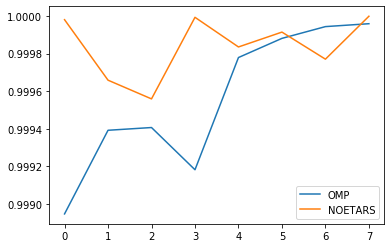

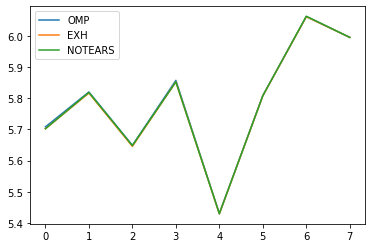

In [7]:
omp_relative = np.array(results[1]) / np.array(results[0])
notears_relative = np.array(results[1]) / np.array(results[2])

plt.plot(omp_relative, label = "OMP")
plt.plot(notears_relative, label = "NOETARS")
plt.legend()
plt.show()

plt.plot(results[0], label = "OMP")
plt.plot(results[1], label = "EXH")
plt.plot(results[2], label = "NOTEARS")
plt.legend()

In [8]:
n_values = [3, 4, 5, 7, 10, 15, 20, 25, 30, 35, 40]
iterations = 10

results = [[], []]

for s in s_values:
    ## First approach: A is a DAG, no model mismatch
    A_true = h.generate_A(n, 2 * n, tril = False, low = 0.25, high = 0.5)

    # set coefficients to be positive (else oscillating which does not make sense)
    for i in range(len(A_true)):
        A_true[i][i] = np.abs(A_true[i][i])
    
    tmp_results = [[], []]
    
    for _ in range(iterations):
        X = h.generate_var_2(100, n, A_true, P_true)
    
        tmp_results[0].append(h.score(X, m._OMP(X), W_true, printing = False)[4])
        # tmp_results[1].append(h.score(X, m._Exh(X), W_true, printing = False)[4])
        tmp_results[1].append(h.score(X, m._notears_2(X), W_true, printing = False)[4])
        
    results[0].append(sum(tmp_results[0]) / len(tmp_results[0]))
    results[1].append(sum(tmp_results[1]) / len(tmp_results[1]))

h: 7.105427357601002e-15.
rho: 9.999999999999999e+25.
loss: (3.3585520267672, array([ 4.73820746e-06, -2.04707235e+04, -6.84961013e+03,  9.71961677e+03,
        3.00359598e+04, -8.46167283e+04, -6.47102413e-03,  2.71404611e-05,
       -3.67025889e+04,  4.55617837e+03,  4.04829233e+04,  3.46518268e+04,
       -1.58512035e-03, -5.62438279e-03,  1.11504523e-03,  3.25760904e+04,
       -8.07500761e+03, -4.27105904e+03,  7.43186025e-04,  4.75418160e-03,
        1.79467215e+00,  2.79168612e-04, -7.45033764e-01,  3.82285811e+04,
        1.72939834e-02,  1.03215572e-02,  3.41512150e-01,  4.66414494e+03,
        1.12886244e-03,  1.28113769e+04, -4.66184535e-03, -3.24776969e-03,
        3.33031926e-03, -9.00820741e-03,  1.70165956e-03, -1.01847269e-05,
       -4.73820746e-06,  2.04707235e+04,  6.84961013e+03, -9.71961677e+03,
       -3.00359598e+04,  8.46167283e+04,  6.47102413e-03, -2.71404611e-05,
        3.67025889e+04, -4.55617837e+03, -4.04829233e+04, -3.46518268e+04,
        1.58512035e-03

..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.835640202828711, array([-1.82822234e-05,  3.08262384e+04,  2.51689232e+04,  1.15691034e+04,
        1.11575739e+04, -2.54254888e+04, -3.54533214e-02,  1.13421194e-04,
        2.00916594e+04, -4.69262310e+02,  7.07299629e+01,  1.68752343e+03,
       -2.52520385e-02, -3.44247036e-02,  9.92676172e-05,  9.26499805e-02,
       -6.32619798e+03,  2.91782916e+03, -4.19010883e-03,  1.17754984e-03,
       -5.41926657e+03, -1.95020799e-04,  1.11832528e+04, -2.78615565e+04,
       -1.23020556e-02,  1.22328655e-02,  2.85357537e-02,  2.89537271e-01,
       -2.33486782e-04, -5.82045460e-02, -1.55851486e-03,  8.16273423e-05,
        2.79030509e-04, -1.43743728e-02, -2.92624508e+03,  1.45175372e-04,
        1.82822234e-05, -3.08262384e+04, -2.51689232e+04, -1.15691034e+04,
       -1.11575739e+04,  2.54254888e+04,  3.54533214e-02, -1.13421194e-04,
       -2.00916594e+04,  4.69262310e+02, -7.07299629e+01, -1.68752343e+03,
        2.52520385e-

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.8955184470406197, array([-6.35461276e-05,  1.18430035e+04, -7.94285349e+03,  2.51327943e+03,
       -4.95861972e+02, -4.39416176e+03, -1.62491794e-03, -4.73659244e-06,
       -2.95733677e+04, -1.48300511e+04,  1.58249550e+04,  3.64196473e+03,
        5.40413941e-03, -8.63408055e-03, -9.98442798e-04,  1.95847117e+04,
       -1.09344319e+04, -1.36419062e+04,  2.74449316e-04,  1.08100552e-03,
       -6.19147162e-01,  8.33550302e-05,  3.87319922e+02,  1.41243828e+04,
        5.29061674e-05,  1.17625753e-03,  2.57416914e-05, -3.17710024e-05,
       -5.77109198e-05,  9.87710322e-04, -1.40748393e-04,  2.52099749e-04,
        5.25176863e-04, -2.74919072e-03, -7.32934292e+03, -1.53539462e-05,
        6.35461276e-05, -1.18430035e+04,  7.94285349e+03, -2.51327943e+03,
        4.95861972e+02,  4.39416176e+03,  1.62491794e-03,  4.73659244e-06,
        2.95733677e+04,  1.48300511e+04, -1.58249550e+04, -3.64196473e+03,
       -5.40413941e

..\notears\notears\notears\linear.py:76: RuntimeWarning: overflow encountered in double_scalars
  obj = loss + 0.5 * rho * h * h + alpha * h + lambda1 * w.sum()
..\notears\notears\notears\linear.py:77: RuntimeWarning: overflow encountered in multiply
  G_smooth = G_loss + (rho * h + alpha) * G_h


h: 2.6645352591003757e-15.
rho: 9.999999999999999e+25.
loss: (2.632219213613618, array([ 3.59095565e-05, -3.38969438e+03, -9.77540656e+02,  3.00796720e+03,
       -8.22502450e+02,  2.29080551e+03,  1.86612077e-05, -1.97721251e-05,
        1.27084988e+04,  8.20744414e+03, -6.47655134e-03,  7.61014450e+02,
       -1.54672763e-04, -2.10895555e-03,  3.23684038e-04, -8.36564446e+02,
       -6.79933705e-02, -5.95438084e+03,  1.05589056e-04, -6.00100007e-03,
        2.74599188e-02, -8.26133745e-04, -1.46195044e-01, -9.33148806e+03,
       -9.05925394e-05,  4.01509604e+03,  5.16204056e+03, -1.81451716e+04,
       -3.63786065e-05, -2.77554273e+03, -4.72514868e-05, -7.05481906e-05,
       -2.31792996e-04, -4.07594677e-04, -6.21973363e-05,  3.09488222e-05,
       -3.59095565e-05,  3.38969438e+03,  9.77540656e+02, -3.00796720e+03,
        8.22502450e+02, -2.29080551e+03, -1.86612077e-05,  1.97721251e-05,
       -1.27084988e+04, -8.20744414e+03,  6.47655134e-03, -7.61014450e+02,
        1.54672763e

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.848012405134526, array([ 1.26217867e-03, -5.12647763e+03,  4.55255501e+02, -2.64905414e+04,
       -8.42309792e+02,  5.59455127e+02,  2.40054045e-02,  3.45793485e-05,
        6.06846337e+03,  2.82387308e+03,  6.68752035e+04,  5.56523028e+03,
       -2.20203909e-02, -1.01591519e-03,  2.24403215e-05, -4.25130110e+03,
        1.28934142e+04,  1.69420963e+04, -4.68708188e-01,  2.01767873e-02,
        9.95079004e-03, -8.73198427e-05, -3.14303610e+03, -9.04599537e+03,
       -5.08748542e-04, -6.47370031e-03, -5.77531624e-04, -1.36130163e-03,
        9.23800282e-06, -5.82749565e+03,  7.10616914e-04, -1.48706927e-04,
        9.41133924e-04,  8.50641321e-04,  2.96186974e-03, -3.27054290e-06,
       -1.26217867e-03,  5.12647763e+03, -4.55255501e+02,  2.64905414e+04,
        8.42309792e+02, -5.59455127e+02, -2.40054045e-02, -3.45793485e-05,
       -6.06846337e+03, -2.82387308e+03, -6.68752035e+04, -5.56523028e+03,
        2.20203909e-

..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 8.419931418757187e-13.
rho: 9.999999999999999e+25.
loss: (746.8383306746155, array([-2.04827205e-03,  5.71119669e-02, -2.53882416e+06, -7.34803803e+05,
       -6.50516339e+06,  5.79916748e+06,  3.48912368e+05, -3.69789845e-05,
       -4.06063514e+05,  9.63687171e+05, -1.65576001e+06,  6.85941853e+06,
        2.18380512e+05, -1.22959572e-02,  2.46737334e-03,  1.47574532e+04,
       -1.24288515e+06,  2.81855244e+06,  7.29154751e+04,  1.60446938e-02,
        1.00320233e+06, -4.93354089e-04, -5.65633435e+06,  4.74031358e+05,
       -4.61880734e-01, -2.60462525e-02, -1.58210464e-02, -1.37184032e-01,
        7.32405187e-06,  8.08508710e+05,  1.77758536e+00, -1.91473449e-01,
        9.28574050e-02, -2.54834475e-02,  3.21183156e-01, -1.28748038e-05,
        2.04827205e-03, -5.71119669e-02,  2.53882416e+06,  7.34803803e+05,
        6.50516339e+06, -5.79916748e+06, -3.48912368e+05,  3.69789845e-05,
        4.06063514e+05, -9.63687171e+05,  1.65576001e+06, -6.85941853e+06,
       -2.18380512e+

..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 1.509903313490213e-14.
rho: 9.999999999999999e+25.
loss: (3.066402785979817, array([ 4.21404656e-04,  4.53689310e-03, -2.86759174e-01,  7.20214959e+03,
        2.03335787e+04,  9.99677220e+04, -1.80530217e+04,  1.24594528e-04,
        7.10801516e+03, -5.61691369e+03, -4.83812520e+04, -1.46329503e+03,
        1.93149866e+04, -1.29252848e-04, -2.09439685e-04,  8.59207972e+04,
       -3.78886901e+04, -2.23980688e+04,  9.16936991e-01,  6.38726306e-05,
        7.35178385e+00, -2.51093165e-04, -1.09606581e+05,  4.56385011e+04,
       -8.66418449e-01, -3.87633275e-04, -1.88245600e-04, -1.10930194e-02,
       -2.51520390e-06, -7.80697865e+04, -8.78114670e-01, -1.17098207e-04,
        2.79627513e-04,  2.65324727e-01,  1.24759256e+00,  3.54233207e-04,
       -4.21404656e-04, -4.53689310e-03,  2.86759174e-01, -7.20214959e+03,
       -2.03335787e+04, -9.99677220e+04,  1.80530217e+04, -1.24594528e-04,
       -7.10801516e+03,  5.61691369e+03,  4.83812520e+04,  1.46329503e+03,
       -1.93149866e+

..\notears\notears\notears\linear.py:76: RuntimeWarning: overflow encountered in double_scalars
  obj = loss + 0.5 * rho * h * h + alpha * h + lambda1 * w.sum()
..\notears\notears\notears\linear.py:77: RuntimeWarning: overflow encountered in multiply
  G_smooth = G_loss + (rho * h + alpha) * G_h
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 2.398081733190338e-14.
rho: 9.999999999999999e+25.
loss: (3.7290368523237793, array([ 1.33678473e-06,  5.31652056e+04,  2.88456709e+04,  1.00823145e+04,
        1.20062850e+04, -1.85807716e+04, -1.08812870e-03,  3.08373432e-04,
        4.64651354e+04, -8.56863386e+04,  1.92545367e+05, -1.50494962e+05,
       -5.84795002e-04,  2.29994579e+00, -9.41245011e-04, -7.11955550e+04,
        5.35085688e+04, -1.05290245e+05, -8.11200262e-05, -2.55007463e-02,
       -1.19132950e+00, -1.56913567e-04,  5.94669562e+04,  8.40870451e+04,
       -5.20643509e-05, -2.32744820e+01,  1.13270080e+01, -2.56349238e+00,
        1.24694956e-03,  6.93317068e+02,  9.54297351e-05, -1.23567744e-01,
       -5.35366547e-02, -6.52114794e-03,  5.39233816e-04, -1.86241717e-05,
       -1.33678473e-06, -5.31652056e+04, -2.88456709e+04, -1.00823145e+04,
       -1.20062850e+04,  1.85807716e+04,  1.08812870e-03, -3.08373432e-04,
       -4.64651354e+04,  8.56863386e+04, -1.92545367e+05,  1.50494962e+05,
        5.84795002e

..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 1.0658141036401503e-14.
rho: 9.999999999999999e+25.
loss: (2.9206670499413256, array([-1.21688662e-04, -2.21515267e+04, -9.58836130e+04,  9.62962445e+03,
       -9.98801082e+04, -4.62869134e+03, -1.84357042e-02, -3.24599515e-05,
       -5.27906801e+03,  5.84742911e+03,  1.68615959e-01,  1.50442185e+04,
       -1.34462755e-02,  6.28315637e-02,  2.66567037e-05,  1.05448249e+03,
       -1.79735829e+00,  2.37374264e+04, -1.09696939e-03,  3.07328997e-02,
       -3.86275698e-01,  2.95816816e-04, -3.76966788e+00,  7.20802925e+02,
       -4.76182936e-03, -5.06066902e+02, -3.80567476e+04,  7.60029169e+04,
        6.65405186e-04,  6.66702928e+03, -2.49350920e-05, -2.99121881e-03,
       -2.01215307e-03, -2.49285877e-04, -6.27678160e-04, -1.08770473e-06,
        1.21688662e-04,  2.21515267e+04,  9.58836130e+04, -9.62962445e+03,
        9.98801082e+04,  4.62869134e+03,  1.84357042e-02,  3.24599515e-05,
        5.27906801e+03, -5.84742911e+03, -1.68615959e-01, -1.50442185e+04,
        1.34462755

..\notears\notears\notears\linear.py:76: RuntimeWarning: overflow encountered in double_scalars
  obj = loss + 0.5 * rho * h * h + alpha * h + lambda1 * w.sum()
..\notears\notears\notears\linear.py:77: RuntimeWarning: overflow encountered in multiply
  G_smooth = G_loss + (rho * h + alpha) * G_h


h: 7.105427357601002e-15.
rho: 9.999999999999999e+25.
loss: (2.794330950193303, array([ 3.64669239e-05, -1.80370425e+03, -4.04913383e+02, -2.38069578e+03,
        5.43600626e+04,  1.95370669e+03,  1.78011853e-05,  1.24587621e-04,
        1.69744139e+04, -2.12024424e+04, -2.50957319e+04, -4.06488245e+04,
       -4.19006929e-05,  1.23818214e-01,  7.44639312e-04,  4.99016339e+03,
       -1.53577893e+04, -1.13349761e+03, -1.41432594e-05, -1.50763006e-01,
       -7.54185513e-02,  1.83421709e-04,  1.13490217e+04, -1.62545105e+04,
       -3.04439541e-03,  2.28298013e+00, -8.88516027e-01, -2.16352857e-01,
        2.42350806e-04, -2.49457944e+03, -2.02225990e-05, -3.89808213e-02,
       -6.46462462e-02, -5.38502992e-03,  2.49583533e-04, -4.58658428e-05,
       -3.64669239e-05,  1.80370425e+03,  4.04913383e+02,  2.38069578e+03,
       -5.43600626e+04, -1.95370669e+03, -1.78011853e-05, -1.24587621e-04,
       -1.69744139e+04,  2.12024424e+04,  2.50957319e+04,  4.06488245e+04,
        4.19006929e-

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (3.0125461885059366, array([-8.23049890e-05, -1.97507402e+04, -3.70948434e+04, -2.13772912e+03,
       -3.77167887e+03, -2.77066626e+04, -2.34709218e-01, -1.37269293e-04,
        3.59769888e+03, -2.75200923e+03, -2.04316564e+03,  2.79969348e+04,
        6.61716731e-02, -2.22574750e-01, -4.27297456e-05, -2.30240914e+03,
        1.20868978e-01,  1.83135406e+04, -8.26625345e-04,  1.40024104e-03,
        1.58448278e-02, -1.79511071e-04, -1.06487067e-01,  6.98520036e+03,
        2.61025361e-02,  2.41380412e-03,  1.29221379e+03,  2.29924686e+04,
       -2.61147893e-04, -2.39227687e+04, -7.75099759e-02,  9.27980455e-03,
        1.34185860e-03,  2.49314044e-03,  6.13616356e-03, -2.81427561e-04,
        8.23049890e-05,  1.97507402e+04,  3.70948434e+04,  2.13772912e+03,
        3.77167887e+03,  2.77066626e+04,  2.34709218e-01,  1.37269293e-04,
       -3.59769888e+03,  2.75200923e+03,  2.04316564e+03, -2.79969348e+04,
       -6.61716731e

..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 1.0658141036401503e-14.
rho: 9.999999999999999e+25.
loss: (3.1010278331073837, array([-1.44922512e-04,  3.22505416e+04, -8.35531227e+02,  3.15032107e+03,
        1.19349750e+03, -5.30254338e+04, -1.03344168e-02,  2.86430596e-04,
       -1.88093400e+04, -7.41072574e+03, -2.17263755e+04,  1.89857425e+04,
       -1.06549533e-02, -3.03408667e-03, -2.65987366e-05, -1.91451498e+04,
       -8.22322448e+04,  1.50036233e+03,  5.27343546e-04,  2.03161585e-03,
        4.96358929e-01,  1.03189229e-04, -4.07634400e+03,  6.29158852e+03,
       -8.43749592e-04,  3.43636748e-03, -5.48687184e-01,  2.50339893e+00,
        1.41613562e-05,  1.33909860e+04,  7.99148119e-02,  1.98937450e-02,
        5.76019009e-03,  2.90181360e-03,  7.21214456e-04, -5.66666102e-04,
        1.44922512e-04, -3.22505416e+04,  8.35531227e+02, -3.15032107e+03,
       -1.19349750e+03,  5.30254338e+04,  1.03344168e-02, -2.86430596e-04,
        1.88093400e+04,  7.41072574e+03,  2.17263755e+04, -1.89857425e+04,
        1.06549533

..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 2.6645352591003757e-15.
rho: 9.999999999999999e+25.
loss: (2.846978490912972, array([ 6.89884222e-04,  3.08043166e+03,  7.43110813e+02, -1.93858454e+04,
       -4.28589365e+03, -1.89624192e+04, -2.35004147e-02,  9.15313288e-05,
        1.87316797e+04,  5.90351681e+02, -5.65168470e+04, -7.24491254e+03,
       -2.91217241e-03, -3.79508080e-03,  1.24816456e-05,  1.74651967e+04,
        8.07469366e-03, -4.41290410e+03,  4.80098815e-02,  1.51314740e-02,
        1.76465468e-03, -2.96724616e-05,  1.04308198e-03,  1.56761520e-03,
       -2.36865465e-02,  1.10818829e-02,  1.23355759e+04, -1.51845987e+03,
        4.05558866e-05,  8.46453342e+03,  1.09322756e-01,  2.92515668e-03,
        1.85066488e-03,  5.64212323e+03,  7.86393461e-03, -9.14263493e-05,
       -6.89884222e-04, -3.08043166e+03, -7.43110813e+02,  1.93858454e+04,
        4.28589365e+03,  1.89624192e+04,  2.35004147e-02, -9.15313288e-05,
       -1.87316797e+04, -5.90351681e+02,  5.65168470e+04,  7.24491254e+03,
        2.91217241e

..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 2.5757174171303632e-14.
rho: 9.999999999999999e+25.
loss: (3.7677755384348526, array([ 3.55370039e-05,  4.25357161e+00, -7.47649930e+04,  4.34404300e+04,
       -4.79094692e+04, -3.56057851e+04,  3.97896321e+03, -6.22344037e-04,
        1.51773808e+05,  3.11855215e+04,  1.58507716e+05, -3.52505259e+05,
       -1.82768464e+00,  6.71496859e+01, -1.68931368e-04, -2.48557959e+03,
        4.46434928e+03,  4.57578479e+04, -5.79104067e-03, -4.56035745e-01,
       -4.11519189e-05,  4.66777194e-04,  1.36755158e+03, -1.70406570e+05,
        2.98169292e-02, -7.67876088e-01, -2.85542246e-03,  4.35967005e-01,
       -1.18025428e-04,  3.98909024e+05,  7.40007090e-03,  1.47316947e-02,
       -1.86413223e-03, -1.15501273e-01,  5.01176819e-02, -3.26448482e-06,
       -3.55370039e-05, -4.25357161e+00,  7.47649930e+04, -4.34404300e+04,
        4.79094692e+04,  3.56057851e+04, -3.97896321e+03,  6.22344037e-04,
       -1.51773808e+05, -3.11855215e+04, -1.58507716e+05,  3.52505259e+05,
        1.82768464

..\notears\notears\notears\linear.py:76: RuntimeWarning: overflow encountered in double_scalars
  obj = loss + 0.5 * rho * h * h + alpha * h + lambda1 * w.sum()
..\notears\notears\notears\linear.py:77: RuntimeWarning: overflow encountered in multiply
  G_smooth = G_loss + (rho * h + alpha) * G_h


h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.0290971331555974, array([-1.22633306e-04,  1.63785786e-02,  1.09144261e-04,  9.92473722e+03,
        6.50203530e+03, -6.59663304e+03, -5.54109136e+03, -1.45563553e-04,
        8.17441102e+03,  6.77916350e+02,  3.19603551e+03, -3.92829249e+03,
        2.42750423e+03, -8.80678046e-02, -2.89919984e-04, -1.81644299e+03,
        5.07331474e+02,  6.61952985e+03, -6.90952056e-03,  1.02443978e-05,
        1.16998813e-04, -5.57477980e-05,  3.52488044e+02, -1.87053231e+03,
        5.39052149e-04, -7.68648642e-04,  8.75122820e-05,  3.05697947e-04,
       -9.38466161e-05,  3.19618701e+03, -2.71715442e-04, -1.66132924e-04,
       -1.34946355e-04, -1.78573411e-05, -1.63914107e-04, -2.97033597e-04,
        1.22633306e-04, -1.63785786e-02, -1.09144261e-04, -9.92473722e+03,
       -6.50203530e+03,  6.59663304e+03,  5.54109136e+03,  1.45563553e-04,
       -8.17441102e+03, -6.77916350e+02, -3.19603551e+03,  3.92829249e+03,
       -2.42750423

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.961673757168299, array([-9.41175207e-05,  5.78173592e+03, -2.44539496e+03,  3.17690272e+03,
        9.84285315e+02,  4.71543346e+02,  1.19823345e-04,  1.41201450e-04,
       -1.71518289e+04, -6.22361010e+03, -1.64283740e+02,  4.16112053e+03,
        1.09207161e-04, -1.10778461e-01,  1.21155161e-03,  5.87762799e+02,
        4.59778705e+02, -3.15270216e+04,  1.13045531e-04, -6.10725512e-04,
       -6.14788136e-05, -9.86683585e-05,  5.36251085e-04,  4.27701209e+03,
        2.10448114e-04,  8.63379299e-04,  9.26664414e-04,  2.61188787e+03,
        1.34575076e-05, -5.64892397e+03, -1.60159429e-05, -1.72495483e-04,
       -1.34475585e-03, -1.00704593e-03, -9.14645683e-05, -1.11830158e-04,
        9.41175207e-05, -5.78173592e+03,  2.44539496e+03, -3.17690272e+03,
       -9.84285315e+02, -4.71543346e+02, -1.19823345e-04, -1.41201450e-04,
        1.71518289e+04,  6.22361010e+03,  1.64283740e+02, -4.16112053e+03,
       -1.09207161e

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (3.124607618220279, array([-2.83590679e-06, -1.87329051e+02,  9.21290662e+03, -1.10328750e+04,
       -5.86271925e+03, -9.56894254e+03,  8.66080429e-07,  4.41100402e-04,
        2.60139844e-01, -1.59801100e-01,  2.86151807e+04, -8.72276013e+03,
       -1.42616170e-04, -4.67976407e+03,  4.40510037e-04,  7.46746165e-01,
       -1.83752695e+04, -2.36274222e+04,  1.91936264e-03, -1.54320865e+04,
        1.33559119e+04,  4.25178685e-04,  8.01290910e+03,  1.58585409e+04,
        1.19368547e-05,  6.63043396e-03,  1.53395516e-03, -1.35226507e-02,
       -2.60456495e-06, -1.70399712e+04,  4.26877895e-05, -2.94622845e-04,
       -5.36686188e-03, -4.52302425e-02, -4.65382826e-03,  2.10683410e-05,
        2.83590679e-06,  1.87329051e+02, -9.21290662e+03,  1.10328750e+04,
        5.86271925e+03,  9.56894254e+03, -8.66080429e-07, -4.41100402e-04,
       -2.60139844e-01,  1.59801100e-01, -2.86151807e+04,  8.72276013e+03,
        1.42616170e-

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.0336771279823154, array([-6.66566827e-05, -3.37973178e-03,  2.75113246e-02, -3.86495407e-02,
       -3.64146476e+03, -1.89595189e+03, -1.71772106e+03,  1.17634502e-05,
        1.69324846e+03,  3.11316362e+03,  4.61749822e+03,  3.66093695e+03,
       -4.09981132e+03,  2.27551241e-05,  6.76123971e-04, -2.27503277e+03,
        3.73271801e+03,  7.92930858e+02, -3.24703366e+03, -7.31719942e-04,
        1.79516715e-02, -5.75410521e-04, -1.86594929e+02, -3.35469610e+03,
       -7.88890303e-04, -5.80011083e-05, -1.48839763e-03,  3.24795071e-04,
        6.29503382e-05,  1.94560193e+03, -1.86715250e-04,  4.07702985e-05,
        5.01244558e-04,  9.85886239e-04, -7.36009786e-05,  1.87131474e-05,
        6.66566827e-05,  3.37973178e-03, -2.75113246e-02,  3.86495407e-02,
        3.64146476e+03,  1.89595189e+03,  1.71772106e+03, -1.17634502e-05,
       -1.69324846e+03, -3.11316362e+03, -4.61749822e+03, -3.66093695e+03,
        4.09981132

..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 1.0658141036401503e-14.
rho: 9.999999999999999e+25.
loss: (2.9703052366067877, array([ 1.36772666e-03, -4.54583628e+00,  1.56907364e+04,  1.07988710e+05,
        3.00148061e+04,  1.78749645e+03,  1.15953992e+05,  3.63522207e-06,
       -6.52463860e+04,  6.36305436e+04, -1.24043950e+05,  3.02919005e+04,
       -6.54904012e-02,  2.44904609e-03, -4.52652661e-05, -1.13741250e+05,
        2.37057418e+03,  3.78651416e+04,  1.45491305e-01, -2.48582937e-03,
        5.33557968e-02, -9.42564165e-04,  1.40294134e+04,  7.93456536e+03,
        1.30549479e-03, -4.00018292e-03, -2.53779400e-02,  3.14813100e-03,
       -1.16997672e-04,  2.88484681e+05, -8.42602453e-05,  2.82443233e-04,
       -4.46568022e-03, -3.30919796e-03, -2.16079639e-02, -1.37226990e-04,
       -1.36772666e-03,  4.54583628e+00, -1.56907364e+04, -1.07988710e+05,
       -3.00148061e+04, -1.78749645e+03, -1.15953992e+05, -3.63522207e-06,
        6.52463860e+04, -6.36305436e+04,  1.24043950e+05, -3.02919005e+04,
        6.54904012

..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 4.440892098500626e-15.
rho: 9.999999999999999e+25.
loss: (2.6901869028024383, array([ 8.41526939e-05,  8.13229772e+04,  8.69763423e+02, -1.19363241e+04,
       -1.04167596e+04,  2.64668530e+03, -1.27389134e-01,  4.13347534e-04,
        8.78794513e+04, -1.98482386e+04,  2.58129053e+04, -5.87352000e+04,
       -6.39866382e-04,  6.51334997e-03, -1.12489646e-04,  1.00110148e+05,
        2.95880761e+04, -1.67154137e+04, -1.52138790e-03, -2.36488201e-03,
        1.82335302e-02,  8.82663389e-05,  1.79121705e+04,  4.54144016e+04,
        2.59142143e-03, -1.77219246e-02,  1.78084135e-02,  2.55743749e-02,
        9.28284303e-05,  7.63312850e+02, -7.29171368e-05,  3.68980214e-02,
       -3.55577346e-02, -5.03866740e-04, -2.90740380e-02,  2.83712043e-04,
       -8.41526939e-05, -8.13229772e+04, -8.69763423e+02,  1.19363241e+04,
        1.04167596e+04, -2.64668530e+03,  1.27389134e-01, -4.13347534e-04,
       -8.78794513e+04,  1.98482386e+04, -2.58129053e+04,  5.87352000e+04,
        6.39866382e

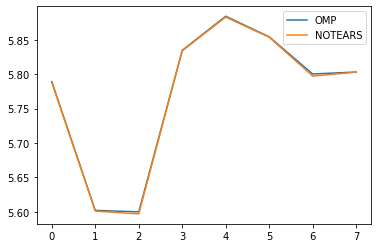

In [9]:
plt.plot(results[0], label = "OMP")
plt.plot(results[1], label = "NOTEARS")
plt.legend()

### Model Mismatches

In [10]:
n = 6
s_values = [0, 1, 2, 5, 7, 10, 15, 20]
iterations = 10

results = [[], [], []]

for s in s_values:
    ## First approach: A is a DAG, no model mismatch
    A_true = (np.array([0.0] * (n ** 2 - s) + [1.0] * s) * (2 * np.random.randint(0, 2, size=(n ** 2)) - 1) * np.random.uniform(low = 0.25, high = 0.50, size = n ** 2))

    tmp_results = [[], [], []]
    print(s)
    for _ in range(iterations):
        # shuffle for randomness
        np.random.shuffle(A_true)

        # reshape
        A_true = A_true.reshape(n, n)
        
        # set coefficients to be positive (else oscillating which does not make sense)
        for i in range(len(A_true)):
            A_true[i][i] = np.abs(A_true[i][i])
    
        X = h.generate_var_2(100, n, A_true, P_true)
        
        tmp_results[0].append(h.score(X, m._OMP(X), W_true, printing = False)[4])
        tmp_results[1].append(h.score(X, m._Exh(X), W_true, printing = False)[4])
        tmp_results[2].append(h.score(X, m._notears_2(X), W_true, printing = False)[4])
        
    results[0].append(sum(tmp_results[0]) / len(tmp_results[0]))
    results[1].append(sum(tmp_results[1]) / len(tmp_results[1]))
    results[2].append(sum(tmp_results[2]) / len(tmp_results[2]))

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

0


  5%|████▏                                                                           | 38/720 [00:00<00:01, 379.94it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.953930234391618, array([-3.07794288e-05,  1.16829180e-02, -1.89188848e+03, -2.96282889e+03,
        3.38870988e+03,  4.22825811e+03, -3.00977658e+03,  5.33077485e-04,
        6.01437480e+03, -4.64645824e+03,  9.84996357e+01,  4.28386816e+03,
       -1.20504455e-03,  1.09151470e-02,  1.30680609e-06,  2.04586026e-03,
        6.94509209e-04,  6.59389140e-03,  1.36451061e-02,  1.72541511e-01,
       -2.63564782e+03,  3.10607919e-04, -6.33604398e-04, -7.75438418e+02,
        2.79525013e-03,  4.22097543e-03,  4.92616040e+03,  1.40232979e+02,
       -9.50578038e-06,  3.37866903e+02,  5.63508851e-04, -3.00706012e-03,
       -2.75324940e+03, -6.35808513e-02,  5.72119633e-05,  2.37776095e-07,
        3.07794288e-05, -1.16829180e-02,  1.89188848e+03,  2.96282889e+03,
       -3.38870988e+03, -4.22825811e+03,  3.00977658e+03, -5.33077485e-04,
       -6.01437480e+03,  4.64645824e+03, -9.84996357e+01, -4.28386816e+03,
        1.20504455e

  5%|████▎                                                                           | 39/720 [00:00<00:01, 389.85it/s]

h: 0.0.
rho: 1e+21.
loss: (2.8550346180480632, array([ 7.91897561e-05,  1.12382575e-06, -7.13187791e-05, -2.85184056e-04,
       -4.21494245e-04,  6.60756479e-02,  2.32288744e-02,  1.83551383e-05,
        2.35375196e-06,  3.18827110e-04, -3.52330334e-02, -3.79025724e-02,
        6.17789701e-03, -7.81616003e-02,  2.50416909e-05, -1.29626678e-04,
       -1.41863175e-02,  1.40005864e-02,  5.27669129e-03, -3.76614103e-02,
       -3.47834989e-02, -2.03883994e-04,  4.12617297e-02, -1.51107704e-02,
        1.58669039e-02, -8.43912670e-05,  1.66821083e-04,  1.37958306e-04,
        1.05992302e-04, -2.22415178e-02,  3.45245998e-05, -5.90426704e-06,
       -3.87126793e-04, -6.49722648e-04, -7.36341177e-04, -9.18054332e-05,
       -7.91897561e-05, -1.12382575e-06,  7.13187791e-05,  2.85184056e-04,
        4.21494245e-04, -6.60756479e-02, -2.32288744e-02, -1.83551383e-05,
       -2.35375196e-06, -3.18827110e-04,  3.52330334e-02,  3.79025724e-02,
       -6.17789701e-03,  7.81616003e-02, -2.50416909e

  5%|████▎                                                                           | 39/720 [00:00<00:01, 389.98it/s]

h: 0.0.
rho: 1e+21.
loss: (2.4329925667315764, array([ 8.34820796e-05, -2.40957769e-03, -8.20346989e-04,  1.96324631e-04,
       -1.03331851e-05,  3.81411035e-04,  4.98751041e-02, -1.27838719e-04,
       -6.45377349e-03, -1.38256868e-04, -2.73294691e-05, -1.65910332e-04,
        7.72808218e-03,  3.30001462e-04, -5.08956794e-06,  1.48034081e-04,
        9.23850336e-04,  8.07436129e-05,  2.56032598e-02, -5.16997083e-02,
       -1.47023084e-01, -1.42566486e-05,  1.01060194e-05,  1.58817901e-05,
        1.57341392e-02, -1.70628073e-02,  9.72122430e-02,  2.24308124e-02,
        6.44426305e-05, -1.35465107e-01,  7.34050462e-02,  6.79038828e-02,
        4.23776984e-02, -1.02547563e-03, -6.77770918e-05, -4.27854256e-05,
       -8.34820796e-05,  2.40957769e-03,  8.20346989e-04, -1.96324631e-04,
        1.03331851e-05, -3.81411035e-04, -4.98751041e-02,  1.27838719e-04,
        6.45377349e-03,  1.38256868e-04,  2.73294691e-05,  1.65910332e-04,
       -7.72808218e-03, -3.30001462e-04,  5.08956794e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 379.54it/s]
..\notears\notears\notears\linear.py:76: RuntimeWarning: overflow encountered in double_scalars
  obj = loss + 0.5 * rho * h * h + alpha * h + lambda1 * w.sum()
..\notears\notears\notears\linear.py:77: RuntimeWarning: overflow encountered in multiply
  G_smooth = G_loss + (rho * h + alpha) * G_h
  5%|████▎                                                                           | 39/720 [00:00<00:01, 386.00it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.9647383014935293, array([ 2.63073185e-04, -2.22132706e+03,  7.55633666e+03,  9.92762483e+03,
       -1.64175469e+04, -1.32788661e+04, -1.25621939e-02, -2.16727336e-05,
       -2.63924827e+03,  2.83233855e-02,  1.58694840e+03, -2.18100054e+03,
       -1.09629536e-02,  1.31986308e-02, -1.73704704e-04,  4.40060629e-01,
        1.37980284e+04, -1.75745621e+04, -4.02340955e-02,  4.95600616e+03,
       -1.97509310e+04, -2.28917007e-04,  4.91255792e+00,  1.04574874e+04,
       -1.21779399e+00, -2.75224726e-02,  1.43181635e-01, -3.82845977e-02,
       -6.52333170e-04, -4.55820856e-02, -5.30702464e-02,  1.97193546e-03,
        7.44140294e-03,  9.10867137e-02,  3.97411984e+03,  3.27567174e-05,
       -2.63073185e-04,  2.22132706e+03, -7.55633666e+03, -9.92762483e+03,
        1.64175469e+04,  1.32788661e+04,  1.25621939e-02,  2.16727336e-05,
        2.63924827e+03, -2.83233855e-02, -1.58694840e+03,  2.18100054e+03,
        1.09629536e

  5%|████▏                                                                           | 38/720 [00:00<00:01, 379.99it/s]

h: 0.0.
rho: 1e+21.
loss: (2.8113064478006136, array([ 7.67568199e-05, -5.08497903e-03, -4.01805397e-03, -5.49108225e-02,
        8.90913180e-02, -1.73724271e-01,  2.18374494e-04, -2.41786783e-04,
       -3.72269986e-02, -2.21039193e-04,  1.90782692e-02, -1.64508519e-01,
       -1.72611715e-06, -1.22918993e-04,  2.98183389e-04, -4.14475054e-05,
        1.59055818e-03,  2.08905745e-04, -1.12431268e-04,  7.11076176e-03,
        2.56679504e-01, -2.55394326e-05,  3.50922058e-02, -6.54720338e-02,
        5.76285308e-04,  9.33312535e-05,  4.89176233e-03, -6.90046843e-05,
       -1.00587306e-05,  2.94311640e-02,  7.27088289e-05,  3.31308518e-04,
        1.71109666e-02,  1.55959889e-04,  4.58566959e-05, -1.97910032e-04,
       -7.67568199e-05,  5.08497903e-03,  4.01805397e-03,  5.49108225e-02,
       -8.90913180e-02,  1.73724271e-01, -2.18374494e-04,  2.41786783e-04,
        3.72269986e-02,  2.21039193e-04, -1.90782692e-02,  1.64508519e-01,
        1.72611715e-06,  1.22918993e-04, -2.98183389e

  6%|████▍                                                                           | 40/720 [00:00<00:01, 388.41it/s]

h: 0.0.
rho: 1e+21.
loss: (2.9552205203721487, array([ 1.68428630e-06,  9.67338878e-02, -3.97182882e-04, -7.29804801e-05,
       -6.29905356e-05,  5.67100115e-03,  2.31239164e-04, -2.50047639e-05,
        4.25061736e-04,  2.79083040e-04, -2.15040552e-04, -2.59398334e-02,
        1.33100084e-01,  3.00755496e-02,  6.36660244e-04,  9.60027325e-02,
       -4.27093692e-05, -1.77591652e-02, -3.36150149e-01, -3.07382696e-01,
        5.84409413e-04, -4.26963415e-06, -1.45696712e-04, -1.97492501e-02,
       -2.33171174e-02, -2.39339096e-01,  1.43787558e-01, -3.59984615e-02,
       -5.27565520e-05,  5.82546728e-02,  1.84971162e-04, -2.74818583e-04,
       -2.26465024e-03, -2.42104430e-04,  5.92948638e-04, -1.61711854e-04,
       -1.68428630e-06, -9.67338878e-02,  3.97182882e-04,  7.29804801e-05,
        6.29905356e-05, -5.67100115e-03, -2.31239164e-04,  2.50047639e-05,
       -4.25061736e-04, -2.79083040e-04,  2.15040552e-04,  2.59398334e-02,
       -1.33100084e-01, -3.00755496e-02, -6.36660244e

  6%|████▍                                                                           | 40/720 [00:00<00:01, 392.12it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.6649599914508886, array([-9.80655683e-06,  3.53609811e+03,  2.59804329e-06,  1.04028214e-03,
        6.38520105e-04,  1.48700983e-02, -2.03506497e-03,  1.14647397e-03,
       -2.51081783e-06, -1.34326807e-03, -5.97629657e-03, -3.29782328e-01,
       -6.40262281e+01,  2.43623047e+01,  5.46943688e-06,  2.76520158e+02,
        3.17650972e+03, -7.79125161e+01, -2.43809050e+03, -4.91686803e+02,
        3.11082804e-06, -1.35165283e-04, -1.16830274e-04, -2.25347004e-03,
       -8.80920337e+01,  1.94152079e+03, -3.24729400e-04,  6.93675736e+02,
       -5.28765084e-06, -8.13656870e+02, -1.70830440e+02, -3.58520435e+03,
       -2.52384519e-06,  2.65558785e+01, -7.39669658e-05,  1.36121700e-04,
        9.80655683e-06, -3.53609811e+03, -2.59804329e-06, -1.04028214e-03,
       -6.38520105e-04, -1.48700983e-02,  2.03506497e-03, -1.14647397e-03,
        2.51081783e-06,  1.34326807e-03,  5.97629657e-03,  3.29782328e-01,
        6.40262281

  5%|████                                                                            | 36/720 [00:00<00:01, 354.54it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.9157301176828416, array([ 1.25853160e-04,  8.63408820e+03, -7.29715281e+02, -2.28860700e+03,
        2.11094823e-01,  3.47050101e+02,  3.63076157e-01, -2.40125822e-04,
        1.14827436e-01,  3.42913929e-02,  4.06589642e-04,  2.32223039e-02,
       -1.50172170e-03,  7.09189696e+03,  1.30981812e-04, -5.37352797e-05,
       -9.82512861e-03,  1.27352804e+04, -1.14639699e-01,  2.01936809e+03,
       -6.15323511e+02, -1.61292086e-04, -1.45365657e+00, -1.12917975e+02,
       -7.16741108e+02,  1.59132477e+02, -2.00559027e+04, -1.33091234e+04,
        1.55291217e-04,  6.05952715e+03,  1.68079003e-02, -1.62370708e+03,
       -4.78636769e-02,  3.53589724e-05,  6.12345080e-03, -3.29050296e-05,
       -1.25853160e-04, -8.63408820e+03,  7.29715281e+02,  2.28860700e+03,
       -2.11094823e-01, -3.47050101e+02, -3.63076157e-01,  2.40125822e-04,
       -1.14827436e-01, -3.42913929e-02, -4.06589642e-04, -2.32223039e-02,
        1.50172170e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 4.440892098500626e-15.
rho: 9.999999999999999e+25.
loss: (2.8157230392177826, array([-5.60487112e-04, -6.08843940e+02, -4.15685720e+01, -7.50531252e+03,
       -1.03707993e+00,  1.88311331e-01,  2.03818620e-01,  1.04415408e-04,
       -1.74741025e+03,  1.01420927e+03,  1.48756371e+03, -8.53633209e-01,
       -4.14533866e-04,  9.52003546e-04,  1.52019912e-06, -1.10102602e-03,
        6.43945287e-03,  6.63717068e-02,  4.65861858e-03, -1.44084727e-03,
       -3.53367173e+03,  6.14331324e-07,  1.13055372e-03, -5.27734097e-02,
        8.01397158e-05, -3.55315477e-04,  3.22600611e+04, -8.34610599e+02,
       -1.00592853e-05, -1.92408288e-02, -1.96297162e+03,  8.19074730e+03,
       -1.20501817e+04, -4.97657464e+03, -7.80790942e+03, -2.20473765e-05,
        5.60487112e-04,  6.08843940e+02,  4.15685720e+01,  7.50531252e+03,
        1.03707993e+00, -1.88311331e-01, -2.03818620e-01, -1.04415408e-04,
        1.74741025e+03, -1.01420927e+03, -1.48756371e+03,  8.53633209e-01,
        4.14533866e

  6%|████▍                                                                           | 40/720 [00:00<00:01, 392.14it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.953576590113622, array([-2.44371975e-04, -1.09743328e-01, -2.66805306e+03,  7.63790977e+02,
        9.41337050e-03,  5.47485376e+03,  3.65910464e+03,  2.18306311e-05,
        3.46409635e+03, -1.50752472e+02,  4.50757919e+03, -5.77338478e+03,
       -2.36635458e-01,  7.09068608e-04,  4.23694112e-04,  3.81141500e+03,
        4.28446552e-03, -5.21215008e+03,  5.93435039e-04, -1.82071790e-05,
       -2.89598881e-03, -1.01054236e-05, -5.72790809e-02, -6.95255521e-03,
       -3.25120758e+03,  2.26663233e-03,  3.30087248e+02,  9.66075600e+03,
       -3.64018517e-05, -5.27560562e+03,  6.97550365e-01, -1.71710869e-03,
        2.02720301e-01,  3.31557174e+03, -3.41796930e-03,  5.59666617e-06,
        2.44371975e-04,  1.09743328e-01,  2.66805306e+03, -7.63790977e+02,
       -9.41337050e-03, -5.47485376e+03, -3.65910464e+03, -2.18306311e-05,
       -3.46409635e+03,  1.50752472e+02, -4.50757919e+03,  5.77338478e+03,
        2.36635458e-

  5%|████▏                                                                           | 38/720 [00:00<00:01, 376.23it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.0001108195149206, array([ 8.18592991e-05, -2.04904671e-02, -3.53144268e+03,  1.44735848e+03,
        2.37458136e+03, -1.41804849e+03,  6.83300270e+02, -6.72257674e-05,
       -4.56684207e+03, -3.99835925e+03,  3.51101190e+03,  8.65493924e+02,
       -5.88218275e-02,  3.34189451e-02,  8.11574039e-05, -1.17420281e-03,
        1.07177490e-02, -3.65098223e+03,  6.44225320e-02, -7.11322756e-03,
       -1.30140794e+02, -6.29162840e-05, -5.84970995e-03,  1.21737516e+03,
       -7.51662207e-03,  3.84979745e-03, -2.31314081e+03, -4.33080026e+03,
       -4.99359493e-05,  2.68622613e+03, -2.46615622e-02,  1.28552162e-04,
       -1.86123903e-03,  3.26898434e-04,  5.36546869e-03, -8.70103570e-05,
       -8.18592991e-05,  2.04904671e-02,  3.53144268e+03, -1.44735848e+03,
       -2.37458136e+03,  1.41804849e+03, -6.83300270e+02,  6.72257674e-05,
        4.56684207e+03,  3.99835925e+03, -3.51101190e+03, -8.65493924e+02,
        5.88218275

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.841445089215392, array([ 2.59075992e-05, -2.51993535e+04,  1.02063572e+04, -2.09554192e+03,
        1.92803985e-02, -9.72196465e+03,  9.54780532e-03, -9.60250682e-05,
        1.99801953e+04, -1.29572826e+04, -1.90044505e-02,  8.08515367e+03,
        5.90852947e-03,  1.73259386e-02, -3.19309397e-05,  4.48780714e-02,
       -1.69175635e-02, -9.33069990e-02, -1.81594173e-02, -7.84918301e-03,
       -2.82538209e+04, -1.63096166e-04, -1.23357041e-01, -8.07417264e-03,
        2.01010900e+04, -1.33629733e+04, -1.61900920e+04,  2.65631154e+04,
       -3.36608880e-04, -1.23966263e+04, -1.71845191e-02, -3.88556814e-03,
        8.24368035e+03, -4.02751477e+03,  1.07200493e-02,  1.66967243e-04,
       -2.59075992e-05,  2.51993535e+04, -1.02063572e+04,  2.09554192e+03,
       -1.92803985e-02,  9.72196465e+03, -9.54780532e-03,  9.60250682e-05,
       -1.99801953e+04,  1.29572826e+04,  1.90044505e-02, -8.08515367e+03,
       -5.90852947e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 382.77it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 5.1514348342607263e-14.
rho: 9.999999999999999e+25.
loss: (5.231318685323302, array([-2.64937374e-04, -5.10294044e-02,  4.66531210e+02, -2.22913166e+03,
       -1.63805088e+05,  1.75382852e+05,  5.47961685e+05, -2.18218963e-06,
       -3.48904607e+04, -1.76464211e+05,  3.13882260e+05, -3.30793070e+04,
        1.31480625e+00, -4.30237010e-03,  1.83814507e-04, -1.81402006e+05,
        9.39337333e+04, -7.71177064e+04,  2.03247725e+01,  3.52657593e-02,
        5.67271683e+00,  3.54929707e-04, -3.31912684e+04, -1.01687248e+00,
       -5.69100551e+02, -1.41018873e+00, -1.59925552e+01, -1.37239718e+01,
       -1.81772987e-04, -8.64246712e+00, -1.68533033e+01, -1.51849513e-02,
       -2.07465883e+00,  3.05647546e+04,  1.26961555e+05, -1.18303182e-04,
        2.64937374e-04,  5.10294044e-02, -4.66531210e+02,  2.22913166e+03,
        1.63805088e+05, -1.75382852e+05, -5.47961685e+05,  2.18218963e-06,
        3.48904607e+04,  1.76464211e+05, -3.13882260e+05,  3.30793070e+04,
       -1.31480625e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 2.6645352591003757e-15.
rho: 9.999999999999999e+25.
loss: (2.790606577680047, array([ 4.11009281e-05, -8.14667440e-03, -4.22134100e+03,  1.25958725e-03,
       -5.58819232e+03, -7.39433261e+02,  3.16377640e+04, -9.31315674e-05,
        2.53762535e+03, -7.43863113e+03,  8.15028263e+03, -9.93726734e+02,
       -1.69474759e-02, -8.08637555e-04, -2.64733218e-05, -5.41871519e-04,
       -2.95793049e-02,  1.01751511e+04,  2.16961106e+03, -1.37975595e-02,
        2.59315578e+03,  5.40377684e-05,  1.07870344e+03, -8.64075243e+03,
       -1.18979849e-02, -1.35376638e-02,  1.07649742e+03,  1.93351097e-04,
        8.95524789e-05, -7.24677836e+03,  3.43677715e-05,  3.49875105e-05,
        1.96471812e-02,  8.10135340e-04, -3.15233468e-01, -7.50030606e-05,
       -4.11009281e-05,  8.14667440e-03,  4.22134100e+03, -1.25958725e-03,
        5.58819232e+03,  7.39433261e+02, -3.16377640e+04,  9.31315674e-05,
       -2.53762535e+03,  7.43863113e+03, -8.15028263e+03,  9.93726734e+02,
        1.69474759e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.628339576840418, array([ 1.31254882e-04, -3.51761451e+02, -1.62677905e-03, -2.07846242e+03,
       -5.77554698e+03,  1.76608546e-04,  2.28257020e-04,  9.42795905e-06,
       -3.10249966e-03, -7.12929778e+03,  2.49934688e-04, -2.15458262e-05,
        2.54455559e+03, -2.95506341e+03, -1.61096545e-04,  7.72180557e+02,
       -8.40313292e+03, -3.03554654e-01, -4.14149568e-03, -4.53782445e-04,
        2.07964608e-03,  3.08640036e-06,  4.31139251e-03, -3.20274925e-05,
        5.52500311e-03, -7.43474478e+01, -1.45512446e-03,  1.91339144e+03,
        6.51855373e-05, -6.09127802e-05, -1.45295844e+03, -2.89681479e+03,
       -4.60320522e+03,  1.06823073e+03, -2.08262287e+02,  1.98927322e-04,
       -1.31254882e-04,  3.51761451e+02,  1.62677905e-03,  2.07846242e+03,
        5.77554698e+03, -1.76608546e-04, -2.28257020e-04, -9.42795905e-06,
        3.10249966e-03,  7.12929778e+03, -2.49934688e-04,  2.15458262e-05,
       -2.54455559e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+21.
loss: (2.72193668463287, array([-1.37655380e-05, -5.26764638e-05,  7.28074467e-04, -7.18492798e-05,
        7.43396093e-05,  5.93327187e-05, -5.16183085e-02,  1.23668050e-05,
        1.61710228e-04, -2.57043404e-05,  5.07415312e-04,  7.96547706e-05,
        1.49344831e-02,  1.72513186e-02, -1.86493752e-05, -8.41772947e-05,
       -2.84278265e-03, -7.33138770e-04,  2.53765029e-02, -3.12797174e-02,
       -7.74825564e-04, -3.13894565e-05, -1.15072373e-01, -2.20960764e-02,
        1.71755683e-03, -1.18582230e-02, -5.99784511e-03, -1.48687682e-05,
       -1.03784839e-04,  5.28492717e-02,  2.54713264e-03,  1.83927311e-02,
       -6.23679476e-03, -1.09552523e-04, -1.96404860e-04, -1.70421939e-04,
        1.37655380e-05,  5.26764638e-05, -7.28074467e-04,  7.18492798e-05,
       -7.43396093e-05, -5.93327187e-05,  5.16183085e-02, -1.23668050e-05,
       -1.61710228e-04,  2.57043404e-05, -5.07415312e-04, -7.96547706e-05,
       -1.49344831e-02, -1.72513186e-02,  1.86493752e-0

  6%|████▍                                                                           | 40/720 [00:00<00:01, 392.02it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (3.0671983390815725, array([ 3.09027679e-05,  3.86326373e-03, -3.19993548e+03, -2.65344152e-04,
        9.63707503e-04,  3.39305517e-05,  5.23579971e+03,  1.42091397e-05,
       -5.24641016e+01,  1.12515299e+04,  6.63074406e+03, -9.42405532e+03,
       -2.76200650e-04, -5.99830774e-04, -4.99607250e-06, -3.50757000e-04,
       -1.90897763e-04, -2.73382294e-05, -2.48004474e+03,  1.92755170e+00,
       -7.25488973e+02,  5.81224171e-05,  1.41028590e-01, -1.79118888e-02,
       -4.17712436e+02, -2.19484657e-01,  7.03307137e+02,  4.43591144e+03,
       -4.57604383e-05,  1.87045514e+04,  2.21301500e+02, -3.34152815e-01,
       -2.03328344e+02, -6.75090068e+03, -8.07411663e-02, -1.45576727e-05,
       -3.09027679e-05, -3.86326373e-03,  3.19993548e+03,  2.65344152e-04,
       -9.63707503e-04, -3.39305517e-05, -5.23579971e+03, -1.42091397e-05,
        5.24641016e+01, -1.12515299e+04, -6.63074406e+03,  9.42405532e+03,
        2.76200650e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (3.044992877062723, array([-1.13663882e-04, -1.53877962e-04, -1.56553126e-04,  3.54548081e-02,
       -2.28543669e-04,  6.30831747e-03,  9.47833403e-03,  5.50370731e-07,
        3.83646428e-02, -1.78814289e-02,  5.16271915e-02,  1.12728050e-02,
       -1.85447744e-03,  1.14231917e-03, -3.40840525e-06,  6.60991099e-05,
        3.26496718e-04,  4.15240663e-02, -1.46272926e-04,  5.71440419e-04,
        1.29895553e-04,  3.64163192e-05,  1.03942988e-04, -8.77979760e-05,
       -1.08495126e-02,  4.43526866e-04, -2.09495848e-02, -1.39737154e-03,
        2.63763929e-04,  8.13975421e-02,  3.06442860e-04,  6.36572848e-04,
        1.45196034e-04,  5.90978344e-02,  7.74048931e-04, -7.48905662e-06,
        1.13663882e-04,  1.53877962e-04,  1.56553126e-04, -3.54548081e-02,
        2.28543669e-04, -6.30831747e-03, -9.47833403e-03, -5.50370731e-07,
       -3.83646428e-02,  1.78814289e-02, -5.16271915e-02, -1.12728050e-02,
        1.85447744e-03, -1.14231917e-03,  3.40840525e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 331.18it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  4%|███▏                                                                            | 29/720 [00:00<00:02, 289.94it/s]

h: 4.3520742565306136e-14.
rho: 9.999999999999999e+25.
loss: (4.845491537999081, array([ 6.11942565e-04,  9.76354757e-03, -6.21806440e+04, -2.01212355e+04,
        7.93664536e+04,  1.03512368e+05, -2.28574583e+04,  8.91178021e-05,
        1.88373873e+04, -1.60934730e+04, -1.83629363e+05, -4.91479615e+04,
        1.13620561e-02, -1.73504288e-03, -1.46565421e-05, -7.49168106e-04,
       -1.27251605e-04,  4.57103973e-03,  1.19542123e+01, -3.41068502e-03,
       -3.02226938e+03, -1.88117434e-04, -1.48629618e+04,  5.62762790e+04,
       -2.15900189e+01,  1.03885459e-01, -1.10870507e+03, -2.44113750e+00,
       -3.51886688e-05,  3.58676792e+03, -4.90903303e+02, -4.65474327e-01,
       -5.99254543e+04, -6.65078615e+01, -4.17681970e+00,  2.19461095e-04,
       -6.11942565e-04, -9.76354757e-03,  6.21806440e+04,  2.01212355e+04,
       -7.93664536e+04, -1.03512368e+05,  2.28574583e+04, -8.91178021e-05,
       -1.88373873e+04,  1.60934730e+04,  1.83629363e+05,  4.91479615e+04,
       -1.13620561e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 328.76it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 7.993605777301127e-14.
rho: 9.999999999999999e+25.
loss: (9.55533096877458, array([-2.05499722e-03,  4.34252424e+03, -1.25413297e-02, -2.26950391e-03,
        7.97640425e+01, -4.22141463e+04, -1.50053770e+05, -5.47493802e-04,
       -4.33008052e-02,  1.10108539e-02,  9.62286125e+04,  9.28997557e+03,
        2.40314836e+04, -7.73673559e+04, -1.22454003e-04,  1.13227400e+05,
        5.22863139e+04, -1.48308375e+04, -2.80165711e+04, -9.98775215e+04,
        5.67022990e-02,  1.28702459e-04,  1.53066565e+05,  1.21044545e+02,
        1.96717275e+04,  3.43993167e+01,  1.32646735e-01,  9.74450972e-02,
        4.54701060e-04,  8.07176557e+04,  6.73837185e-03,  1.45616265e-03,
       -1.17101968e-03, -3.82794950e-05,  3.62818409e-02, -2.32140633e-06,
        2.05499722e-03, -4.34252424e+03,  1.25413297e-02,  2.26950391e-03,
       -7.97640425e+01,  4.22141463e+04,  1.50053770e+05,  5.47493802e-04,
        4.33008052e-02, -1.10108539e-02, -9.62286125e+04, -9.28997557e+03,
       -2.40314836e+0

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (2.4866621583797617, array([-1.14732025e-04, -7.58002993e-04,  1.09678743e-01,  2.14734319e-04,
       -3.48537437e-04, -1.08221122e-03, -3.26062104e-02,  1.92473301e-04,
       -5.81268101e-03,  2.27592752e-02,  6.09964003e-02, -2.12127918e-02,
       -3.74417898e-05,  1.24137530e-04,  2.02347373e-05,  1.15100487e-04,
       -5.26494304e-05,  1.35144306e-05, -3.75481531e-02,  4.05187682e-05,
        6.01732526e-02,  5.58731371e-05,  3.23321618e-02, -8.72532392e-05,
       -1.54570720e-02, -5.11164821e-04, -6.06659088e-02,  7.82216874e-05,
       -1.88533321e-04, -5.14870989e-04, -3.44558569e-02, -2.46352988e-05,
       -6.25519657e-03, -1.19343843e-02, -1.81479356e-02,  1.82792696e-04,
        1.14732025e-04,  7.58002993e-04, -1.09678743e-01, -2.14734319e-04,
        3.48537437e-04,  1.08221122e-03,  3.26062104e-02, -1.92473301e-04,
        5.81268101e-03, -2.27592752e-02, -6.09964003e-02,  2.12127918e-02,
        3.74417898e-05, -1.24137530e-04, -2.02347373e

  5%|████▎                                                                           | 39/720 [00:00<00:01, 386.00it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.8761151073240794, array([-5.14986172e-06,  2.59657618e+03,  5.17530715e-03,  4.96313136e+02,
       -1.10768554e-04,  1.13993487e-01, -3.07330758e-03, -1.22477068e-04,
       -3.51206473e-02, -4.44721778e+03, -8.67062291e-03,  5.32649775e-05,
        8.23138046e+03,  4.64977838e+03, -2.78872879e-04,  3.24519906e+03,
        1.89551170e-04, -1.87170099e+03, -4.56234018e-04,  1.16277814e-03,
        2.15722437e-04, -8.35476556e-06, -1.08663773e-04, -2.76063969e-03,
        1.11819007e+03,  2.26732778e+03, -5.45737891e+03,  5.43335501e+02,
       -3.22979607e-04, -2.32328047e+03,  5.04007668e+03,  3.53453344e+02,
        6.86818286e-05,  6.57197225e+03, -5.82822155e-04,  1.97275969e-04,
        5.14986172e-06, -2.59657618e+03, -5.17530715e-03, -4.96313136e+02,
        1.10768554e-04, -1.13993487e-01,  3.07330758e-03,  1.22477068e-04,
        3.51206473e-02,  4.44721778e+03,  8.67062291e-03, -5.32649775e-05,
       -8.23138046

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 8.881784197001252e-16.
rho: 9.999999999999999e+25.
loss: (2.70543178590211, array([ 1.18412855e-04,  6.61721685e+02, -8.57098507e+02,  2.22285591e-04,
        1.11458949e-04,  1.12214084e-07, -3.60231486e-04, -6.99078529e-05,
       -4.44109376e-03,  4.58404269e-03, -9.95091238e-04,  1.25153820e-02,
        6.79616302e-03, -4.31224255e+02,  2.10877607e-04, -3.09555009e-04,
        4.67000706e-05,  1.49906618e-03, -1.31934107e+03,  3.34690236e+03,
        7.09325518e+02, -2.00285723e-05, -2.75626036e+02, -6.27523726e+02,
        2.19557897e+03, -1.26458629e+03, -4.39445458e+01, -2.22144017e-04,
        1.62858346e-05, -1.35830026e-03,  7.67500332e+01,  1.81153044e+03,
        1.73464389e+03,  1.71934528e-04, -1.62002880e+03,  9.40136650e-05,
       -1.18412855e-04, -6.61721685e+02,  8.57098507e+02, -2.22285591e-04,
       -1.11458949e-04, -1.12214084e-07,  3.60231486e-04,  6.99078529e-05,
        4.44109376e-03, -4.58404269e-03,  9.95091238e-04, -1.25153820e-02,
       -6.79616302e-0

  5%|████▎                                                                           | 39/720 [00:00<00:01, 382.26it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.9934119091806783, array([ 6.03963298e-05,  2.67175135e+03, -2.24865670e-03, -1.45633513e-03,
       -1.65803131e-04,  1.59597821e+03, -1.28286438e-03, -9.56113000e-06,
        9.17478117e-04,  8.29403957e-02, -2.22517962e-03,  2.25193092e-02,
        5.51914746e+03, -2.33674272e+03,  1.35855218e-04, -6.21518408e-03,
       -3.44870036e+03, -7.97599882e+03,  2.53220152e+03, -1.52632075e+04,
        4.02836946e+03, -1.68099018e-05,  1.29556180e+03,  7.73406475e+02,
       -2.33765010e+03,  6.72324297e+02, -2.23890104e-03,  1.82223564e-03,
       -1.35247076e-05, -3.98244710e+04, -2.14271454e-04,  5.28758250e+03,
       -8.59454627e-04, -3.97282047e-04,  3.19118483e-03, -6.28783097e-05,
       -6.03963298e-05, -2.67175135e+03,  2.24865670e-03,  1.45633513e-03,
        1.65803131e-04, -1.59597821e+03,  1.28286438e-03,  9.56113000e-06,
       -9.17478117e-04, -8.29403957e-02,  2.22517962e-03, -2.25193092e-02,
       -5.51914746

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 373.63it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (3.135197112481986, array([ 2.64109011e-04, -2.27525492e-04,  7.55222685e-02,  1.25676849e-02,
       -1.64661696e-03,  1.21563735e-03, -9.33551405e+02, -3.52121224e-04,
       -2.23918656e+04,  2.48834611e+04, -1.13653931e+04, -1.95609735e+04,
       -1.06292305e+04,  1.73259446e-01,  4.65213519e-05, -9.79397818e+03,
        1.04698548e+04,  4.61481679e-02, -2.19707464e+04, -4.98753649e-03,
       -8.87897881e-02,  1.01555547e-04, -1.72597638e-02, -7.91088638e-01,
        4.27708701e+03,  1.97530044e-02,  2.48531265e-02,  1.20248214e+04,
       -2.21474416e-05, -7.33454522e-02,  2.99807658e+03, -2.49491178e-02,
        1.83002563e+04, -2.20161443e+04,  1.22051337e+04, -1.45691570e-04,
       -2.64109011e-04,  2.27525492e-04, -7.55222685e-02, -1.25676849e-02,
        1.64661696e-03, -1.21563735e-03,  9.33551405e+02,  3.52121224e-04,
        2.23918656e+04, -2.48834611e+04,  1.13653931e+04,  1.95609735e+04,
        1.06292305e+

  5%|████▎                                                                           | 39/720 [00:00<00:01, 390.00it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.9155359626351927, array([-2.70728158e-06, -3.17540281e-04, -1.50895927e-03,  5.14288165e-04,
        2.85577557e-04, -9.03450920e-04, -1.28885377e+03,  8.71645872e-05,
        1.43708046e-02, -4.14027676e-01, -1.82202881e-03, -2.65721325e+03,
        1.04011324e+03, -8.03550832e+03,  3.85714070e-05, -2.13876445e-02,
       -5.61532368e-03, -1.31909609e+03,  4.41714687e+03,  1.91234416e+03,
       -1.99214653e+03,  1.32032059e-04,  5.96248565e-02, -1.68878290e+03,
        2.99496118e+03,  1.29066386e+03, -2.65020066e+03,  4.16054044e+03,
        2.57006992e-04, -2.47389873e+03,  8.38018597e+02, -3.37640286e-03,
       -3.24017347e-04, -1.88374112e-04,  2.15087029e-03, -7.00120806e-05,
        2.70728158e-06,  3.17540281e-04,  1.50895927e-03, -5.14288165e-04,
       -2.85577557e-04,  9.03450920e-04,  1.28885377e+03, -8.71645872e-05,
       -1.43708046e-02,  4.14027676e-01,  1.82202881e-03,  2.65721325e+03,
       -1.04011324

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 8.881784197001252e-15.
rho: 9.999999999999999e+25.
loss: (2.898578101949573, array([-5.12933453e-05,  1.33675069e-02,  4.71571082e-02, -4.93952727e-04,
        3.38833515e-03, -5.74824669e-04, -3.91064352e+04, -1.23772025e-03,
       -7.36342812e+04, -1.32808562e+04,  5.88362492e+04, -3.97764351e+04,
        3.76962277e+04,  5.06349964e-01, -1.09343092e-04, -3.07851241e+04,
        7.16345030e+02,  3.14805563e+04,  1.85872362e+03, -3.07586925e-03,
        1.14851911e-02, -6.68425554e-05, -2.90066648e+04,  2.27518582e-03,
       -1.22501878e+05, -2.69821287e-01, -6.41861218e-03, -7.69178119e-02,
        2.05891687e-05,  9.70495336e-02,  1.02620890e+03,  2.95147642e+00,
       -3.59846766e-01, -3.41424692e+04, -9.71288068e+04, -9.75716286e-05,
        5.12933453e-05, -1.33675069e-02, -4.71571082e-02,  4.93952727e-04,
       -3.38833515e-03,  5.74824669e-04,  3.91064352e+04,  1.23772025e-03,
        7.36342812e+04,  1.32808562e+04, -5.88362492e+04,  3.97764351e+04,
       -3.76962277e+

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.9585889927685245, array([-2.43528192e-06,  1.45769008e-02,  1.74128823e-04, -2.97056149e-04,
       -7.82767424e-04, -2.65639555e+03, -2.34410987e+03, -7.78502953e-04,
        7.99902295e-04,  6.27179933e+02,  1.03420316e-04,  3.24261487e+03,
        4.66178654e+03, -1.87932271e+03, -1.27542379e-05, -2.40971158e+01,
        1.43179032e+03,  5.02478097e+03,  9.74732786e+02,  2.22171555e-02,
       -3.82641976e-05,  2.86346755e-04, -7.22986440e-04,  2.90477406e+03,
       -2.45345789e+03,  5.22181796e+03, -1.81186768e-03, -3.19502829e+03,
       -1.68070337e-05, -1.08410370e+03,  5.69513099e-03, -1.36845879e-01,
       -1.45211163e-03,  1.59258824e-02,  3.11291576e-05, -1.28011074e-05,
        2.43528192e-06, -1.45769008e-02, -1.74128823e-04,  2.97056149e-04,
        7.82767424e-04,  2.65639555e+03,  2.34410987e+03,  7.78502953e-04,
       -7.99902295e-04, -6.27179933e+02, -1.03420316e-04, -3.24261487e+03,
       -4.66178654

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (3.080454611923519, array([-6.33118491e-04, -3.43975918e-02, -5.32346251e+04, -1.59849030e-04,
        5.48205304e+03,  4.90486820e-02,  2.58773920e+04, -1.48580398e-06,
        1.47749508e+04, -3.96925620e-02, -1.29727937e+04, -2.36367163e+03,
       -3.69490697e-02, -2.97964411e-03,  2.55420383e-05, -1.15457280e-03,
       -1.01068799e-03, -9.04053854e-02, -1.89705141e+02, -1.43654053e+04,
        1.07818888e+04, -2.11061303e-05, -1.86415096e+04,  1.21970968e+04,
        1.67901413e-01,  1.01017566e-02,  7.87967754e+03, -2.43501526e-01,
        1.92328220e-04, -1.13291895e+00, -2.21437912e+04,  2.10152882e-03,
        3.53633368e+04, -9.68722125e-03, -1.34120378e+04, -8.40957782e-04,
        6.33118491e-04,  3.43975918e-02,  5.32346251e+04,  1.59849030e-04,
       -5.48205304e+03, -4.90486820e-02, -2.58773920e+04,  1.48580398e-06,
       -1.47749508e+04,  3.96925620e-02,  1.29727937e+04,  2.36367163e+03,
        3.69490697e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 384.00it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  6%|████▍                                                                           | 40/720 [00:00<00:01, 388.21it/s]

h: 2.4868995751603507e-14.
rho: 9.999999999999999e+25.
loss: (3.6073747594213517, array([ 3.47216253e-04, -1.87464890e+04, -3.22453154e+04, -1.84797919e+05,
       -7.75653890e+02,  2.42966598e-02,  7.68846224e+00, -2.54997492e-06,
        2.86302885e+04,  1.11197493e+05,  8.94161517e+04,  1.87779449e-04,
       -5.49189153e-02, -6.28841075e-03, -3.57715381e-05, -7.85372911e-02,
        2.93865823e-03,  3.32029196e-03, -1.51945917e-01, -7.54792734e+00,
       -3.62407427e+04,  1.36776199e-05, -1.25862478e+04, -2.91745175e-03,
       -5.75716047e-03, -1.28683594e+00,  1.20982585e+05,  5.29270549e-02,
        9.19237768e-05, -6.44252685e-04, -1.95244917e+05,  1.26112345e+03,
        1.75266846e+04,  1.08118581e+04,  6.34801421e+02, -6.45956611e-04,
       -3.47216253e-04,  1.87464890e+04,  3.22453154e+04,  1.84797919e+05,
        7.75653890e+02, -2.42966598e-02, -7.68846224e+00,  2.54997492e-06,
       -2.86302885e+04, -1.11197493e+05, -8.94161517e+04, -1.87779449e-04,
        5.49189153

  5%|████▎                                                                           | 39/720 [00:00<00:01, 378.75it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.761075093777215, array([ 6.60710550e-07, -5.72324932e+04, -3.42102617e+03, -1.11059098e+04,
        1.32087118e+03, -8.28774833e+03,  1.25006844e-02, -2.54203539e-05,
        5.95172747e+02, -5.57615881e+03,  3.85729937e+03,  5.84039375e+03,
        7.62693132e-04, -1.36204726e-05, -1.32833441e-04,  3.30379563e-04,
        2.32895080e-02,  5.68634677e-03,  7.93189270e-03, -8.78806789e-03,
        6.58210884e+03, -6.65646765e-05,  1.02649307e+04, -4.50519877e+03,
       -8.68769587e-04,  3.94115304e-03, -2.49633231e+03, -3.76487833e-03,
       -2.94899632e-04, -8.47378113e-02,  1.15394892e-02, -3.36256129e-02,
        3.80280762e+03,  8.16930130e-03, -2.67905244e+02, -3.24131818e-05,
       -6.60710550e-07,  5.72324932e+04,  3.42102617e+03,  1.11059098e+04,
       -1.32087118e+03,  8.28774833e+03, -1.25006844e-02,  2.54203539e-05,
       -5.95172747e+02,  5.57615881e+03, -3.85729937e+03, -5.84039375e+03,
       -7.62693132e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 378.55it/s]
..\notears\notears\notears\linear.py:76: RuntimeWarning: overflow encountered in double_scalars
  obj = loss + 0.5 * rho * h * h + alpha * h + lambda1 * w.sum()
..\notears\notears\notears\linear.py:77: RuntimeWarning: overflow encountered in multiply
  G_smooth = G_loss + (rho * h + alpha) * G_h
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.865174681370263e-14.
rho: 9.999999999999999e+25.
loss: (3.1579728915384306, array([ 7.09318991e-05, -1.50028377e+04, -2.08501851e+00, -1.74745180e+00,
       -6.23802821e+04,  2.07324677e+05,  4.55144598e-01, -1.34466572e-04,
       -3.35978377e+00,  4.75933249e-03, -1.29623590e-02, -1.77665549e-01,
        7.19375588e+04,  5.32342316e+04, -6.08214752e-06,  5.96403296e-01,
       -1.14716930e+05,  9.82864166e+04, -2.26359256e+04,  1.17414228e+05,
        1.57347984e+05, -8.41788365e-05,  2.59579131e+04,  6.29821346e+04,
        2.31724508e+00, -2.04070110e+03, -8.21551214e+00,  1.84807402e+01,
        1.08830325e-03, -6.02015682e+04,  4.49822241e-02, -2.93343089e+03,
        4.24277158e-01,  9.92441019e-01,  2.38010228e-01, -4.92202187e-05,
       -7.09318991e-05,  1.50028377e+04,  2.08501851e+00,  1.74745180e+00,
        6.23802821e+04, -2.07324677e+05, -4.55144598e-01,  1.34466572e-04,
        3.35978377e+00, -4.75933249e-03,  1.29623590e-02,  1.77665549e-01,
       -7.19375588e

  5%|████▏                                                                           | 38/720 [00:00<00:01, 379.84it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.855011036321369, array([ 1.51251588e-06, -5.75561927e+03,  4.39039072e+03, -1.44140163e-03,
        8.18442126e+03,  4.21327245e+02,  1.14901152e-03,  6.72406207e-05,
        5.06894522e-02, -8.38709157e-04, -4.86068787e-03,  7.25789000e-03,
        3.67368227e-04, -4.37092767e+03, -3.06440025e-05,  7.83703963e-04,
        2.42830103e+03,  6.50526068e+02,  1.01793743e+03, -8.92316388e+03,
        7.13734053e+03,  6.07862526e-05,  3.99754584e+03,  1.27457527e+04,
        9.60458316e-03,  1.77199137e+03,  1.90023560e-03,  6.07597885e-04,
        9.66045979e-07,  1.26445716e-03,  4.94624265e-04,  4.43687822e+03,
       -1.71380835e-01,  1.27958169e-02, -5.13984955e+03,  1.87058037e-04,
       -1.51251588e-06,  5.75561927e+03, -4.39039072e+03,  1.44140163e-03,
       -8.18442126e+03, -4.21327245e+02, -1.14901152e-03, -6.72406207e-05,
       -5.06894522e-02,  8.38709157e-04,  4.86068787e-03, -7.25789000e-03,
       -3.67368227e

  5%|████▎                                                                           | 39/720 [00:00<00:01, 382.45it/s]

h: 8.881784197001252e-15.
rho: 9.999999999999999e+25.
loss: (2.801874756566291, array([-1.23854457e-04,  4.57751426e+02, -5.01115962e+04,  1.79844603e+03,
        7.91240964e+00, -1.72456962e+04,  9.90199847e-05,  1.19324825e-04,
       -3.13462667e-04,  9.19823932e-05, -4.02728157e-04, -8.45340875e-04,
        2.30603237e-02,  1.30948439e+04,  1.42193821e-04,  2.99104556e-03,
       -2.11515963e-02, -1.76435976e+03, -1.03451276e-03,  4.70925279e+03,
        9.08677743e+03, -1.19832028e-04,  5.82122217e-03, -3.45701585e+04,
        3.96038087e+04,  6.09216172e+02,  9.21090616e+03, -6.15084519e+03,
        7.77977972e-04, -2.34682026e+02,  4.62865446e-04,  2.11819822e+03,
       -4.47242992e-04,  1.47039317e-02, -4.04267188e-04,  3.63954240e-05,
        1.23854457e-04, -4.57751426e+02,  5.01115962e+04, -1.79844603e+03,
       -7.91240964e+00,  1.72456962e+04, -9.90199847e-05, -1.19324825e-04,
        3.13462667e-04, -9.19823932e-05,  4.02728157e-04,  8.45340875e-04,
       -2.30603237e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (3.002356829412152, array([ 2.80733190e-05, -2.02064079e-01, -5.62458832e-03,  1.13623394e+05,
        2.99834685e+04,  1.72377864e+04,  5.83436724e+03,  7.03008633e-05,
       -3.12760673e-03, -3.05649995e+04, -1.84835779e+03,  2.78092748e+04,
        6.44264505e+03, -1.75494752e+04,  8.22060912e-05,  4.25600772e+03,
        7.98169978e+03, -8.55018858e+03,  2.75395466e-02,  1.39841666e-01,
        4.10023695e-03, -1.13351023e-04,  1.01455776e+04,  2.16869563e+04,
        2.93981250e-02, -9.80906672e-02, -1.72326473e-02,  2.07099749e-02,
        7.69577641e-04,  8.98089686e+03,  3.27176100e-02,  3.30646579e-01,
        6.87189974e-04,  5.86901508e-02, -6.45984242e-02, -2.79678841e-05,
       -2.80733190e-05,  2.02064079e-01,  5.62458832e-03, -1.13623394e+05,
       -2.99834685e+04, -1.72377864e+04, -5.83436724e+03, -7.03008633e-05,
        3.12760673e-03,  3.05649995e+04,  1.84835779e+03, -2.78092748e+04,
       -6.44264505e+

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 373.83it/s]
..\notears\notears\notears\linear.py:76: RuntimeWarning: overflow encountered in double_scalars
  obj = loss + 0.5 * rho * h * h + alpha * h + lambda1 * w.sum()
..\notears\notears\notears\linear.py:77: RuntimeWarning: overflow encountered in multiply
  G_smooth = G_loss + (rho * h + alpha) * G_h
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.865174681370263e-14.
rho: 9.999999999999999e+25.
loss: (3.289283313844942, array([-9.78481708e-06, -1.88963488e+04, -1.75241950e+03, -5.47619404e+04,
       -1.48667872e+04,  1.65528041e+05,  1.89695862e-03, -1.14551302e-04,
       -7.21885268e+04,  2.80268888e-03,  6.24835508e+04,  6.66384391e-01,
       -4.59632029e-05,  3.64505424e-01,  2.60701893e-05, -1.06125598e-02,
        5.67292239e-02,  2.90579786e+00,  7.14749537e-03, -5.66960915e+04,
        3.57838075e+04,  9.61832117e-06,  1.30632742e+02, -8.18142363e+04,
        2.39408000e-03, -3.36267269e+00,  4.52348116e+04,  7.07078399e-04,
       -3.87596254e-05, -3.78030969e+01,  1.08639162e-02, -1.31165915e+04,
       -5.97468156e+04,  5.31737198e-03,  7.26340725e+04, -4.47435765e-05,
        9.78481708e-06,  1.88963488e+04,  1.75241950e+03,  5.47619404e+04,
        1.48667872e+04, -1.65528041e+05, -1.89695862e-03,  1.14551302e-04,
        7.21885268e+04, -2.80268888e-03, -6.24835508e+04, -6.66384391e-01,
        4.59632029e-

  5%|████▏                                                                           | 38/720 [00:00<00:01, 372.65it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.2492992974307575, array([-6.50246367e-06, -1.34110208e+04, -5.45849979e+03,  6.29698446e+03,
       -8.51367523e-03, -8.59123276e+03,  8.95284518e-03,  9.74395939e-05,
       -2.00618340e-04,  2.07509705e-03,  2.10598480e-04,  1.08189447e-02,
       -8.92932404e-03,  4.72164127e+02, -1.53573806e-03,  6.59259414e-03,
        8.81031233e-02,  5.05740451e+03,  4.25194351e-03, -1.46278607e+03,
       -9.73855022e+03, -5.52395894e-06,  2.69176743e-02, -4.82589650e+02,
       -2.64075818e+03,  8.48377641e+02, -5.44960908e+03, -7.07000102e+01,
        2.27507490e-04, -2.42225043e+03,  6.98621260e-04, -8.77954375e+03,
       -1.89036752e-03,  9.74459186e-06,  1.28004818e-03, -3.20132701e-04,
        6.50246367e-06,  1.34110208e+04,  5.45849979e+03, -6.29698446e+03,
        8.51367523e-03,  8.59123276e+03, -8.95284518e-03, -9.74395939e-05,
        2.00618340e-04, -2.07509705e-03, -2.10598480e-04, -1.08189447e-02,
        8.92932404

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 369.42it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  5%|████▎                                                                           | 39/720 [00:00<00:01, 385.85it/s]

h: 7.993605777301127e-15.
rho: 9.999999999999999e+25.
loss: (3.2322761565088767, array([-3.46800120e-06,  1.61803351e-01, -7.43461098e+02, -9.12124407e+02,
        6.38968953e+03,  3.64117899e+04,  6.83658136e+03, -3.76881461e-04,
       -1.43834548e+03,  7.39407520e+03,  4.47157356e+04, -2.27531516e+04,
       -1.12182986e-05,  1.30338040e-04, -3.99241057e-06,  4.87052262e-03,
        3.84439121e-05, -1.93905845e-04,  7.81065509e-02, -2.26665512e+00,
        4.94727945e+04,  9.12525750e-05, -3.66516007e+03, -1.44789170e+04,
        7.81510870e-04, -6.44513865e-02, -3.30459443e+03, -6.24064501e-03,
       -1.09217477e-04,  3.19020170e-02,  1.54773098e-01,  8.45791186e-01,
        2.11661186e+03,  3.41598840e-01,  2.80877440e+04, -9.23024252e-05,
        3.46800120e-06, -1.61803351e-01,  7.43461098e+02,  9.12124407e+02,
       -6.38968953e+03, -3.64117899e+04, -6.83658136e+03,  3.76881461e-04,
        1.43834548e+03, -7.39407520e+03, -4.47157356e+04,  2.27531516e+04,
        1.12182986e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.509903313490213e-14.
rho: 9.999999999999999e+25.
loss: (3.0654954943590838, array([-8.50450872e-06,  7.28503029e+04,  6.01004528e-01, -3.90377032e-03,
       -4.69683616e+00,  1.09122291e-01,  5.21548529e-01,  6.75533065e-06,
        3.69014427e-02,  1.70292642e-03, -3.13129387e+01, -7.61413528e-03,
       -1.47400612e+04,  2.44966131e+04, -3.25884479e-04, -3.95641471e-01,
       -1.40986278e+04,  1.66039331e+04,  2.93749055e+04, -6.55544710e+04,
        2.28703185e+04, -1.15982050e-05, -6.38680537e+04, -5.81925883e+04,
        2.18241487e+04,  4.48674144e+04,  8.85474586e-03, -9.22666493e-02,
        8.22182887e-05,  7.21886744e-02, -2.39762926e+04,  1.84853013e+04,
        6.42588915e-02,  6.21093742e-03,  8.67784729e+04,  2.58924216e-04,
        8.50450872e-06, -7.28503029e+04, -6.01004528e-01,  3.90377032e-03,
        4.69683616e+00, -1.09122291e-01, -5.21548529e-01, -6.75533065e-06,
       -3.69014427e-02, -1.70292642e-03,  3.13129387e+01,  7.61413528e-03,
        1.47400612e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+23.
loss: (2.843229816358962, array([-8.34666842e-05, -1.97885608e-02,  1.43167305e-02, -5.61149864e-04,
       -7.02496744e-02,  1.05575098e-03, -1.21222324e-04,  8.19334321e-05,
       -1.61192352e-02, -2.16432099e-04, -7.18462210e-05, -5.69613302e-04,
       -1.92665298e-04,  1.29784083e-04, -3.77373271e-06, -1.91996432e-04,
       -1.91386369e-04,  1.65850010e-04,  1.08159486e-01, -4.76097313e-03,
        1.18160851e-01,  2.00997336e-04,  2.56052962e-02,  1.26980819e-03,
       -7.69247991e-04,  1.71405953e-02,  1.64259633e-03, -4.82717843e-04,
       -1.76910354e-04,  2.66713256e-03,  4.02734076e-02, -5.13122123e-02,
        3.36735430e-02, -1.56185676e-01, -1.34048576e-01, -6.52921952e-05,
        8.34666842e-05,  1.97885608e-02, -1.43167305e-02,  5.61149864e-04,
        7.02496744e-02, -1.05575098e-03,  1.21222324e-04, -8.19334321e-05,
        1.61192352e-02,  2.16432099e-04,  7.18462210e-05,  5.69613302e-04,
        1.92665298e-04, -1.29784083e-04,  3.77373271e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.9332066643023404, array([ 2.04431402e-04,  9.31491202e+03, -7.83265374e+03, -1.87341163e+03,
       -1.97807164e+03,  4.63146060e+03, -3.68492834e-04, -2.80694123e-04,
       -5.59904860e+03,  5.83661004e+03,  6.82183034e+03, -1.00492916e+04,
       -2.97540909e-03, -4.88204270e-03,  7.41109287e-06, -3.35101937e+03,
       -8.64491910e+02,  1.65163525e-02, -4.01595600e-04, -2.79145058e-03,
        3.07957693e-04,  3.11413187e-04,  3.81195519e+03,  1.48343774e-04,
       -8.36890786e-05, -2.21965219e-04,  4.32271209e-03, -7.67735938e-02,
        3.01940665e-04, -3.17713916e-03, -5.13893682e-05,  2.62155062e-02,
       -6.08688695e+03, -3.04889533e+02, -4.50982247e+03, -7.39499478e-05,
       -2.04431402e-04, -9.31491202e+03,  7.83265374e+03,  1.87341163e+03,
        1.97807164e+03, -4.63146060e+03,  3.68492834e-04,  2.80694123e-04,
        5.59904860e+03, -5.83661004e+03, -6.82183034e+03,  1.00492916e+04,
        2.97540909

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+20.
loss: (2.6992887617134915, array([ 9.50513030e-06, -3.69150469e-04, -3.97147607e-03,  4.98967082e-04,
        1.05766732e-02, -5.11916762e-02,  2.66164535e-02,  1.76312553e-04,
       -9.99163170e-04,  3.73527530e-02, -7.30239480e-03,  1.95511528e-02,
       -2.45922549e-05, -4.90012250e-05,  2.66059480e-05, -3.24831042e-02,
        6.07418762e-03, -3.36379987e-03,  2.28047452e-04,  2.80318526e-05,
       -6.52830686e-05, -1.94437749e-05,  2.35283998e-02,  3.64772919e-04,
        8.19987114e-05,  8.90216110e-04, -6.69090922e-04, -3.63469362e-04,
        7.26753796e-05,  2.91909345e-03, -3.16063128e-05,  4.74078381e-04,
       -2.11100681e-05,  2.04183754e-03,  1.05775612e-02, -2.03418071e-04,
       -9.50513030e-06,  3.69150469e-04,  3.97147607e-03, -4.98967082e-04,
       -1.05766732e-02,  5.11916762e-02, -2.66164535e-02, -1.76312553e-04,
        9.99163170e-04, -3.73527530e-02,  7.30239480e-03, -1.95511528e-02,
        2.45922549e-05,  4.90012250e-05, -2.66059480e

  5%|████▏                                                                           | 38/720 [00:00<00:01, 372.41it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.6525511681771867, array([-9.57612219e-05,  1.08160157e+03,  1.64851163e-04, -1.37536136e+03,
        3.52744159e+03,  2.29583662e+02, -3.60033745e-05,  3.56892507e-05,
       -2.16921982e-03,  1.22921068e-01,  3.55488355e-03, -3.72092167e-03,
       -1.60870501e+03, -2.36820143e+03, -9.28037672e-05,  5.79624207e+02,
        1.40456666e+03,  1.82045225e+03, -3.26285331e-05,  5.38123608e+03,
        5.86715691e-05,  1.70446717e-04, -4.42125308e+02,  1.23394452e+03,
       -1.43473252e-04, -7.44561486e+02, -2.28317775e-04, -2.09174012e-03,
       -6.67695314e-05,  7.84353105e-04, -7.07819244e-04, -2.46630890e+02,
        5.21764515e-03, -5.28409289e-03,  7.34442452e+02, -1.26280448e-05,
        9.57612219e-05, -1.08160157e+03, -1.64851163e-04,  1.37536136e+03,
       -3.52744159e+03, -2.29583662e+02,  3.60033745e-05, -3.56892507e-05,
        2.16921982e-03, -1.22921068e-01, -3.55488355e-03,  3.72092167e-03,
        1.60870501

  5%|████                                                                            | 37/720 [00:00<00:01, 362.62it/s]

h: 0.0.
rho: 1e+21.
loss: (3.0390884639328934, array([-1.30888669e-04,  1.00353820e-03, -1.22189983e-02, -1.15177334e-02,
       -4.51691456e-02, -8.60819109e-04,  3.86208526e-02,  2.54448166e-04,
       -1.50645872e-01, -1.58189864e-02,  7.98782586e-02,  6.64061474e-02,
       -8.58638521e-05, -2.62107619e-04,  1.04155366e-05, -3.81287339e-03,
        1.16681269e-01, -1.59611390e-04,  1.39970538e-05, -1.32965871e-03,
       -5.97544852e-06, -4.07310568e-05,  1.82657111e-02, -2.61727532e-04,
        7.91401028e-05, -9.75583769e-04,  5.73946213e-05, -6.36000053e-05,
       -1.62198937e-05, -6.55532203e-05, -8.66491432e-05, -1.25761254e-04,
       -1.02889736e-01,  3.03020391e-02, -1.88656907e-02, -5.56025617e-05,
        1.30888669e-04, -1.00353820e-03,  1.22189983e-02,  1.15177334e-02,
        4.51691456e-02,  8.60819109e-04, -3.86208526e-02, -2.54448166e-04,
        1.50645872e-01,  1.58189864e-02, -7.98782586e-02, -6.64061474e-02,
        8.58638521e-05,  2.62107619e-04, -1.04155366e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 379.34it/s]
..\notears\notears\notears\linear.py:76: RuntimeWarning: overflow encountered in double_scalars
  obj = loss + 0.5 * rho * h * h + alpha * h + lambda1 * w.sum()
..\notears\notears\notears\linear.py:77: RuntimeWarning: overflow encountered in multiply
  G_smooth = G_loss + (rho * h + alpha) * G_h
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (3.14206185980316, array([ 1.39192704e-04, -8.97015256e+03,  6.65875289e+03, -4.20026987e+01,
       -1.67961746e+02, -1.07124750e+04, -9.20788069e-04, -2.49080550e-05,
       -9.23732028e+01,  2.53921743e+02, -1.00837863e+04,  5.09295882e+02,
        1.18379198e-03,  1.85516530e-03,  3.35686932e-05, -3.33701869e+03,
       -1.18271398e+04,  2.34147507e+04,  7.20750136e-05, -6.49786586e-04,
       -2.02817881e-03,  1.11345365e-03, -3.10855702e+02, -7.30004674e-02,
        3.12370542e-06,  1.47660918e-02,  1.42218704e-03, -6.09808922e-02,
        2.92223073e-04,  7.21674680e-01,  9.19021584e-05, -1.42310491e-03,
        3.55269177e-03,  2.26108740e+02, -1.54602282e+04,  1.59030993e-03,
       -1.39192704e-04,  8.97015256e+03, -6.65875289e+03,  4.20026987e+01,
        1.67961746e+02,  1.07124750e+04,  9.20788069e-04,  2.49080550e-05,
        9.23732028e+01, -2.53921743e+02,  1.00837863e+04, -5.09295882e+02,
       -1.18379198e-0

  5%|████                                                                            | 37/720 [00:00<00:01, 366.45it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.7866826627159385, array([ 4.06164675e-04, -3.44862753e-02,  1.43435063e-03, -6.47446944e+03,
        6.68092587e+03,  2.85025793e-02, -7.60708247e+02, -5.37371487e-05,
        6.99218660e-03,  3.83623508e+03, -6.39325868e+03,  2.40162076e-02,
        3.77354123e+03, -4.76411107e+03,  8.63599623e-06, -6.56998328e+02,
        4.99217178e+03,  4.79709334e+03,  7.09476410e-04,  3.39062133e-03,
        1.17249625e-04,  5.88673215e-06, -2.09831168e-04, -2.15921778e-04,
        3.49644275e-03,  1.10260222e-02, -5.22827128e-03, -6.54786948e+02,
       -2.01459387e-04,  6.83644512e-04, -8.16534162e+03, -1.99546858e+03,
        1.73021140e-03, -5.41578930e+02,  2.02200959e+03, -7.98108297e-05,
       -4.06164675e-04,  3.44862753e-02, -1.43435063e-03,  6.47446944e+03,
       -6.68092587e+03, -2.85025793e-02,  7.60708247e+02,  5.37371487e-05,
       -6.99218660e-03, -3.83623508e+03,  6.39325868e+03, -2.40162076e-02,
       -3.77354123

  5%|████                                                                            | 37/720 [00:00<00:01, 370.00it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.4209282950093916, array([-5.55213518e-06, -1.49598669e+04,  1.55420745e+03,  1.11259238e+03,
        2.10027145e+03,  2.42909554e+03,  5.52698267e-04, -9.17405026e-04,
        7.06005909e+01,  6.18260177e+03,  1.38240246e+02,  1.43429058e-03,
        1.31598677e-04,  3.31608017e-02,  1.56207480e-04,  4.78982014e+02,
        6.36187102e+02, -1.00981008e-01, -7.84671971e-05, -6.42007064e-02,
        9.28511262e-03,  1.68742231e-05,  1.63449006e-02,  2.95069446e-04,
        6.95780029e-05, -3.30906943e-03,  1.66406608e-04,  1.24189065e+03,
        1.44520697e-06, -1.41496088e-03, -1.36420664e-05,  8.16189211e+02,
        6.07482359e+03, -1.34408515e+03, -1.36399262e+03, -5.40184577e-04,
        5.55213518e-06,  1.49598669e+04, -1.55420745e+03, -1.11259238e+03,
       -2.10027145e+03, -2.42909554e+03, -5.52698267e-04,  9.17405026e-04,
       -7.06005909e+01, -6.18260177e+03, -1.38240246e+02, -1.43429058e-03,
       -1.31598677

  5%|███▉                                                                            | 35/720 [00:00<00:01, 346.54it/s]

h: 5.329070518200751e-15.
rho: 9.999999999999999e+25.
loss: (2.8557854870827937, array([ 1.09127017e-07, -1.73204641e+04, -5.23227457e+03,  4.64503524e+03,
        3.55246218e+04, -2.37139187e+04, -6.06016079e-03, -3.40651283e-07,
        1.20948049e-02,  2.51121351e-02,  4.46546926e-01, -2.90489785e-01,
       -5.96265853e-02,  2.47858708e+04, -9.89794270e-06,  1.00394495e+04,
        2.15128620e+04,  5.57148389e-02,  2.46529985e-04, -1.30985813e+04,
        4.19400512e-01,  7.94748097e-05, -6.42573946e-02, -3.70246843e-02,
        1.93771268e-02, -1.60350962e+04,  2.92774417e-02,  1.89945696e+04,
       -8.08533931e-04,  4.34988481e-03,  1.62891881e-02, -3.52147783e+04,
       -6.74637836e+03,  3.08853724e+04, -9.72217348e+03, -2.95939026e-05,
       -1.09127017e-07,  1.73204641e+04,  5.23227457e+03, -4.64503524e+03,
       -3.55246218e+04,  2.37139187e+04,  6.06016079e-03,  3.40651283e-07,
       -1.20948049e-02, -2.51121351e-02, -4.46546926e-01,  2.90489785e-01,
        5.96265853e

  6%|████▍                                                                           | 40/720 [00:00<00:01, 392.15it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.862062052292729, array([-1.18016610e-04,  7.51655924e+03,  1.09101570e+04,  5.40229187e+02,
        4.74342269e+03,  2.04831353e+03,  1.53272410e-03,  9.19617837e-05,
       -3.81233249e+03,  4.15657992e+03, -8.53729883e+02, -3.96287961e+03,
        1.91819764e-02,  1.48093039e-02,  1.53064592e-05, -8.28174134e-03,
        4.18841748e+03,  1.73810632e-02,  7.68912156e-03,  1.53874398e-02,
       -1.15781459e+03,  7.43364844e-05, -1.26420144e+01,  1.10361880e-03,
       -5.46446828e-04, -2.30882868e-02,  1.09626885e-02,  1.34862243e-04,
        1.26618503e-05,  3.38786657e-02,  1.22740673e-02, -4.31395406e-03,
        3.51513550e+02,  1.27643771e+03, -7.90135150e+03,  9.42507620e-05,
        1.18016610e-04, -7.51655924e+03, -1.09101570e+04, -5.40229187e+02,
       -4.74342269e+03, -2.04831353e+03, -1.53272410e-03, -9.19617837e-05,
        3.81233249e+03, -4.15657992e+03,  8.53729883e+02,  3.96287961e+03,
       -1.91819764e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 8.881784197001252e-16.
rho: 9.999999999999999e+25.
loss: (2.689290756772839, array([ 2.51955866e-04, -7.51664725e-03, -1.64308168e+03,  7.57841911e+02,
        6.31191742e+02,  1.14492538e+03, -1.35274163e+03, -6.90849668e-05,
       -9.03077701e+02,  3.05114642e+03, -5.80133282e+01,  4.06879239e+03,
        3.01680055e-04,  6.38262179e-03,  9.42178762e-05, -5.67394499e+03,
       -1.44018973e+03, -7.37297727e+02,  7.12715615e-04,  3.01039668e-03,
        2.91499270e-03, -8.87116776e-06,  1.71616396e-03,  4.68680408e-03,
        3.13112252e-04,  4.09621051e-04,  2.48358246e-03,  2.46652570e+00,
        2.75169022e-05,  5.46896968e-04,  3.10572436e-03, -1.73433179e-02,
        2.99275971e-03,  8.78455330e+02,  7.73010513e+01,  3.82652576e-05,
       -2.51955866e-04,  7.51664725e-03,  1.64308168e+03, -7.57841911e+02,
       -6.31191742e+02, -1.14492538e+03,  1.35274163e+03,  6.90849668e-05,
        9.03077701e+02, -3.05114642e+03,  5.80133282e+01, -4.06879239e+03,
       -3.01680055e-

  5%|████▏                                                                           | 38/720 [00:00<00:01, 379.99it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.9748361348051198, array([ 3.22401490e-04,  4.61782586e-02,  1.43658520e-03, -1.34065683e-02,
       -8.72748058e-04,  1.01638119e-03,  7.31630616e+03, -1.11629322e-05,
        5.41982335e+03,  1.28172035e+04, -9.84628371e+02, -1.28808451e+03,
        5.35633120e+02, -1.68811163e-02, -1.28209770e-04,  3.62681098e-03,
       -4.22864991e-03,  8.25288225e-04,  7.01400465e+02,  3.77009836e-02,
       -2.31543299e+03, -3.58935026e-05, -4.60790615e+01, -6.43609239e-04,
       -9.56216342e+02,  1.94814943e-02,  7.08300601e+02, -1.29914890e-04,
       -2.16083110e-05, -1.58663387e-04,  3.66597684e+03, -5.71818732e-03,
       -8.38923706e+02, -1.13019268e+04,  3.98396630e+03, -1.53419325e-04,
       -3.22401490e-04, -4.61782586e-02, -1.43658520e-03,  1.34065683e-02,
        8.72748058e-04, -1.01638119e-03, -7.31630616e+03,  1.11629322e-05,
       -5.41982335e+03, -1.28172035e+04,  9.84628371e+02,  1.28808451e+03,
       -5.35633120

  5%|████▎                                                                           | 39/720 [00:00<00:01, 389.86it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.9636058925812283, array([ 8.38247165e-04, -1.42702732e-02, -8.14940760e-02,  2.09268363e-04,
       -4.16212935e-02,  9.96486653e-04, -5.07260923e+03,  2.85324486e-04,
       -6.52320751e+03, -1.14110620e-03,  5.55605251e+03, -1.83833376e+04,
        1.89262370e+04,  1.37104254e-03, -8.07040832e-05, -6.22700017e-03,
        2.44295360e+03, -7.12043277e-03,  6.05584810e+02, -9.51314927e+02,
        3.39241677e+04, -3.69488598e-04,  8.23559462e+03,  2.53024023e+04,
       -1.40714242e+04,  1.18904497e-02, -1.33234217e-01, -1.37700627e-05,
       -5.23349521e-05,  1.28052332e-03,  9.58683320e+03, -7.60914092e-02,
       -3.19632079e+04,  7.62249522e-03, -1.87698069e+04,  1.93242894e-04,
       -8.38247165e-04,  1.42702732e-02,  8.14940760e-02, -2.09268363e-04,
        4.16212935e-02, -9.96486653e-04,  5.07260923e+03, -2.85324486e-04,
        6.52320751e+03,  1.14110620e-03, -5.55605251e+03,  1.83833376e+04,
       -1.89262370e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+22.
loss: (2.579259452211314, array([ 4.95123227e-05, -5.48571039e-05, -4.27325335e-05, -2.25574109e-04,
       -1.78768295e-05,  2.22139861e-05, -5.24369592e-01,  1.50646742e-04,
       -3.69705161e-01,  4.47770640e-01,  1.71785662e-04, -9.00844250e-02,
        7.87122009e-03, -3.40723077e-05,  3.85812176e-05,  5.15538997e-04,
       -1.19466517e-04, -1.16114604e-04, -1.35660969e-03, -3.81391457e-05,
       -2.39552944e-01,  9.19244069e-05, -6.61061156e-05,  6.31869900e-04,
       -4.94343554e-04,  2.31804579e-01,  1.07562728e-01,  2.54420303e-01,
        6.43624167e-04,  2.83217789e-01,  9.17513477e-01,  4.60535232e-06,
        3.73542296e-03,  9.65056222e-02,  2.22417351e-06,  3.99668487e-05,
       -4.95123227e-05,  5.48571039e-05,  4.27325335e-05,  2.25574109e-04,
        1.78768295e-05, -2.22139861e-05,  5.24369592e-01, -1.50646742e-04,
        3.69705161e-01, -4.47770640e-01, -1.71785662e-04,  9.00844250e-02,
       -7.87122009e-03,  3.40723077e-05, -3.85812176e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.0870057483547932, array([-6.84283419e-04, -2.24472562e-02, -2.52628966e-02,  7.15907246e-03,
       -2.33783548e-03, -7.10826522e-05, -8.76769407e+03,  3.43863607e-04,
        4.53081815e+02,  4.31803248e+02, -5.76171848e+03,  1.84392372e-03,
       -2.67573925e+02,  1.60764791e-02, -8.65923680e-05,  1.18046069e+03,
       -6.74191564e+02,  1.90540979e-05, -7.83191492e+02, -1.12749985e-02,
        1.27359385e-04, -1.20041628e-04,  4.92429475e-05, -1.92403304e-05,
       -6.53357200e+02,  3.44763436e-03,  3.13303414e-03,  5.81438171e+03,
        4.60122043e-04, -5.62157563e-05,  4.25484285e+02,  1.09509696e+03,
       -1.07682162e+04,  3.22069231e+02,  1.04567313e+03, -6.39740849e-04,
        6.84283419e-04,  2.24472562e-02,  2.52628966e-02, -7.15907246e-03,
        2.33783548e-03,  7.10826522e-05,  8.76769407e+03, -3.43863607e-04,
       -4.53081815e+02, -4.31803248e+02,  5.76171848e+03, -1.84392372e-03,
        2.67573925

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (2.9947676009013713, array([ 1.44646818e-04,  2.84862499e-03,  1.39279295e-04,  2.05847937e-05,
        1.89567492e-03, -4.42526673e-03,  2.38174452e+04, -4.63039875e-05,
        3.08841551e-04,  2.11572878e-03, -1.29855268e-04,  4.75643211e-04,
        2.60425486e+02, -8.65803078e+03,  1.03451454e-05,  1.09794702e-02,
       -1.07696253e-04, -1.65330211e-02,  5.67302669e+01, -2.67314981e+04,
       -2.98812279e+04,  1.13880606e-04, -4.22104791e-04,  3.64640912e-03,
        1.45720818e+04,  5.42257252e+02,  3.61212224e+03, -1.57518116e+04,
       -1.51404019e-04, -5.24656436e-01, -4.36288494e+04, -4.45760150e+03,
        1.49342665e+04,  4.40055116e+03, -2.08731659e+04, -3.18736386e-05,
       -1.44646818e-04, -2.84862499e-03, -1.39279295e-04, -2.05847937e-05,
       -1.89567492e-03,  4.42526673e-03, -2.38174452e+04,  4.63039875e-05,
       -3.08841551e-04, -2.11572878e-03,  1.29855268e-04, -4.75643211e-04,
       -2.60425486e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.221967362434525, array([-8.60708653e-05,  4.91459262e+03,  2.55355256e-02,  5.53263503e-05,
       -7.48783433e-04,  5.62917671e-03, -1.17697225e-02, -6.30063086e-04,
       -1.03929106e-02, -8.48677022e-03,  2.46000065e-04, -5.51067327e-03,
        9.48599608e+03,  8.80659930e+03, -7.41577471e-05,  4.51393840e-04,
        7.84222994e-04,  2.92813411e+03, -6.56738632e+02,  1.13785616e+04,
       -8.02721336e+02,  7.60380753e-05, -4.20043812e+03,  1.88789955e+03,
        3.10084144e+03,  1.28891827e+02, -3.09625753e+02,  4.80962114e-02,
       -6.62849019e-04, -9.88546203e+03,  2.18883379e+03, -1.20017363e+03,
        8.82283795e-03,  4.34713228e-03, -4.47275591e-04,  2.44319468e-05,
        8.60708653e-05, -4.91459262e+03, -2.55355256e-02, -5.53263503e-05,
        7.48783433e-04, -5.62917671e-03,  1.17697225e-02,  6.30063086e-04,
        1.03929106e-02,  8.48677022e-03, -2.46000065e-04,  5.51067327e-03,
       -9.48599608e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 7.105427357601002e-15.
rho: 9.999999999999999e+25.
loss: (2.9849533988577828, array([ 2.99758670e-05,  1.02896198e-01,  1.90013084e-02,  4.72065632e-03,
        1.95300554e-05, -4.76811367e-05, -5.30319506e+04,  9.58163787e-06,
        1.31672797e+04, -8.55609778e+04,  3.97810422e-02,  6.81993172e-04,
       -3.79831766e+02,  3.10676395e-01, -3.68733872e-05, -5.68602963e+04,
       -1.88690962e-02, -1.53374141e-02,  9.32456700e+04,  5.09118754e-01,
        2.23368689e-01, -1.85215106e-04,  3.00473918e-03,  1.12311456e-03,
        1.81678823e+03,  1.02682537e+04,  4.16138803e+04, -1.52525593e+04,
        5.24289454e-04,  6.49943672e-02, -1.49764133e+01,  7.97283100e+03,
       -2.34134968e+05, -1.40016030e+04, -2.97824969e+04,  6.83544261e-05,
       -2.99758670e-05, -1.02896198e-01, -1.90013084e-02, -4.72065632e-03,
       -1.95300554e-05,  4.76811367e-05,  5.30319506e+04, -9.58163787e-06,
       -1.31672797e+04,  8.55609778e+04, -3.97810422e-02, -6.81993172e-04,
        3.79831766e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.9456288525377174, array([-6.45891527e-05,  7.90359125e+03,  7.49622334e-04, -1.10168586e-03,
        2.55116808e-04,  1.22307518e-03, -2.07815726e-03,  2.35983430e-04,
        4.44391121e-04,  5.35205396e-04, -2.61081198e-03,  1.30996369e-04,
        9.64736933e+03, -2.01210461e+03,  1.15688064e-04, -6.85913075e+03,
       -1.66559294e-04,  2.45251627e-04, -4.31937110e+03, -3.97668411e+03,
       -1.17891465e-01,  3.60930775e-04,  1.13083984e-03, -2.22399021e-06,
        5.82038013e+03,  1.32712232e+04,  3.43049940e+02, -2.24287399e+03,
        5.11265429e-04, -3.18409152e-04,  6.20349305e+03, -9.58468867e+02,
        1.65009266e+03, -9.76886103e+01, -5.15883543e+03, -3.87450309e-05,
        6.45891527e-05, -7.90359125e+03, -7.49622334e-04,  1.10168586e-03,
       -2.55116808e-04, -1.22307518e-03,  2.07815726e-03, -2.35983430e-04,
       -4.44391121e-04, -5.35205396e-04,  2.61081198e-03, -1.30996369e-04,
       -9.64736933

  5%|████▎                                                                           | 39/720 [00:00<00:01, 386.05it/s]

h: 0.0.
rho: 1e+24.
loss: (2.9749964876530743, array([-1.16799740e-05,  9.57981254e-05, -1.87201528e-02, -2.26773049e-04,
       -1.68362371e-05, -3.12301291e-04,  6.80550923e-03, -4.29384433e-04,
       -1.31166644e-01, -1.10068310e-03,  1.99640554e-04, -3.47993797e-03,
        5.44038086e-05, -6.84798257e-06, -2.14374700e-05,  1.44177477e-04,
        3.09275557e-05, -1.20710549e-04,  1.02895239e-01,  7.51372175e-02,
        5.07570874e-02, -1.05367846e-04,  1.63201640e-01, -1.31882367e-03,
        9.39162214e-04,  8.59021384e-03, -3.23240093e-02, -5.89390892e-05,
        5.05319521e-05, -7.43636198e-06,  1.89712703e-01, -1.03998540e-02,
        1.53984056e-01, -3.58732872e-03, -7.45854047e-02, -2.48584977e-04,
        1.16799740e-05, -9.57981254e-05,  1.87201528e-02,  2.26773049e-04,
        1.68362371e-05,  3.12301291e-04, -6.80550923e-03,  4.29384433e-04,
        1.31166644e-01,  1.10068310e-03, -1.99640554e-04,  3.47993797e-03,
       -5.44038086e-05,  6.84798257e-06,  2.14374700e

  5%|████▎                                                                           | 39/720 [00:00<00:01, 386.15it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.963220670179639, array([-1.79878418e-05,  8.14155094e-05, -3.44364293e-04,  8.60853107e-04,
       -3.04945821e-03,  1.28857966e-03, -1.82661748e+03,  1.90003276e-04,
        1.71817079e+04,  3.12700509e-03, -7.75030751e+03, -7.13416471e+03,
        3.58807817e+02,  1.85879546e-03,  2.51526915e-04, -5.67546108e-03,
       -2.76118922e-03, -6.51441163e-03, -5.90029610e+03, -9.22028870e+03,
       -1.07238753e+04, -2.67360269e-04, -1.52112607e+04,  5.67226325e+03,
        1.10281749e+04, -1.92515790e-02,  1.26043250e+04,  4.74316823e-03,
        1.03812246e-04,  1.28059771e+03, -1.03366495e+04, -3.32252713e-02,
        6.97720234e+03, -5.55623460e-03,  1.31016707e-02,  6.15037077e-05,
        1.79878418e-05, -8.14155094e-05,  3.44364293e-04, -8.60853107e-04,
        3.04945821e-03, -1.28857966e-03,  1.82661748e+03, -1.90003276e-04,
       -1.71817079e+04, -3.12700509e-03,  7.75030751e+03,  7.13416471e+03,
       -3.58807817e

  5%|████▎                                                                           | 39/720 [00:00<00:01, 386.22it/s]

h: 0.0.
rho: 1e+21.
loss: (3.1385420445136507, array([-1.26165554e-03, -1.98529119e-02,  9.03321437e-02, -1.37684849e-01,
        6.83824928e-02,  1.65497789e-01, -9.45073130e-04, -3.21628155e-05,
       -1.31837442e-04,  2.73262914e-02, -5.69652845e-04,  4.27620292e-04,
       -8.88008472e-04,  3.20937590e-02, -1.48167659e-05,  8.55355741e-02,
        2.50016097e-04, -1.37807659e-02,  6.23183229e-04, -6.62258089e-04,
        3.52562731e-04, -1.80522692e-04,  2.95135905e-04, -1.04565014e-03,
       -1.10159232e-03,  3.01946187e-01,  9.95738904e-02,  1.55801764e-01,
        3.25909800e-04,  1.12798745e-01,  2.27013169e-03, -1.00002410e-02,
       -8.51057073e-05,  2.55393045e-01,  1.59617759e-04, -2.11240021e-04,
        1.26165554e-03,  1.98529119e-02, -9.03321437e-02,  1.37684849e-01,
       -6.83824928e-02, -1.65497789e-01,  9.45073130e-04,  3.21628155e-05,
        1.31837442e-04, -2.73262914e-02,  5.69652845e-04, -4.27620292e-04,
        8.88008472e-04, -3.20937590e-02,  1.48167659e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.5086171683302814, array([-2.23901930e-04, -3.71683247e+02, -4.13953900e+02,  1.21703690e+04,
        7.27830879e+02,  1.37017582e+04, -1.29246284e-03, -5.09521779e-04,
       -8.25313941e+03,  4.82960477e-03, -1.62973676e-04,  5.71767417e+02,
        3.10699535e-03,  1.86623188e-02, -2.32068056e-04, -3.60910626e-02,
        1.75817934e-04, -2.55503856e+03, -2.79447793e-03,  1.73235513e+04,
       -1.24543036e+04, -5.25860857e-04, -2.35737533e-03, -4.99804835e+03,
       -1.98396408e-03,  5.38638530e+02, -3.07958670e+02, -2.08465588e+02,
       -1.01700032e-04, -3.33761901e+03,  3.97058964e-03,  5.55316098e-04,
       -1.57087423e-03, -4.50539573e-04,  4.57625591e-04, -2.88536158e-04,
        2.23901930e-04,  3.71683247e+02,  4.13953900e+02, -1.21703690e+04,
       -7.27830879e+02, -1.37017582e+04,  1.29246284e-03,  5.09521779e-04,
        8.25313941e+03, -4.82960477e-03,  1.62973676e-04, -5.71767417e+02,
       -3.10699535

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 324.47it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.1546319456101628e-14.
rho: 9.999999999999999e+25.
loss: (3.2247937877157318, array([-1.49569262e-04, -3.68523560e-04,  1.84817969e-03, -9.58863426e+00,
       -2.82550812e-03, -2.09183114e-03, -2.64567082e+03, -6.27195619e-04,
       -2.02922263e-03, -2.63568208e+04,  1.13100475e-04,  1.69327289e-03,
        2.48308678e+03, -6.82639467e+04,  2.51869173e-04,  9.62858470e+03,
        4.65349664e-03, -1.60692830e-04,  8.57547480e+04, -4.57758868e-04,
       -1.23766693e-04,  4.73043766e-05, -1.72014109e-05, -1.07516925e-04,
        4.09607344e+03,  2.23083686e+03, -1.29728273e+05,  1.41206337e+04,
        6.33366325e-04,  8.79877530e+02,  3.61065245e+04,  6.80811675e+04,
        3.56632407e+03, -2.56301317e+03,  2.70210127e-03, -2.86107093e-05,
        1.49569262e-04,  3.68523560e-04, -1.84817969e-03,  9.58863426e+00,
        2.82550812e-03,  2.09183114e-03,  2.64567082e+03,  6.27195619e-04,
        2.02922263e-03,  2.63568208e+04, -1.13100475e-04, -1.69327289e-03,
       -2.48308678

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 338.79it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.0658141036401503e-14.
rho: 9.999999999999999e+25.
loss: (3.3351888344565666, array([-2.53966583e-04,  2.73314925e-02, -2.24398798e-02, -4.01801464e-04,
        8.92863623e-03,  8.75291375e-03,  3.71808153e+05, -2.49098874e-04,
        1.01956409e+05,  6.11702050e+04, -2.80608098e+03,  2.47410907e+04,
        4.12832360e+04,  4.21607574e-02,  1.74466595e-04,  3.58850685e-02,
        4.14149741e-02,  1.78565685e-02, -7.22068597e+04,  1.11567868e-02,
        2.06345685e+04, -8.49937424e-04, -1.12257094e-02, -9.54587914e+04,
        4.93181682e+04,  3.36872632e-03,  9.46329092e+04, -1.78185575e+04,
        4.02951497e-04,  3.97311598e+04, -3.89019702e+04, -6.26349068e-03,
        1.81133652e+03, -5.34898121e+00,  3.05432709e-02,  4.89291824e-05,
        2.53966583e-04, -2.73314925e-02,  2.24398798e-02,  4.01801464e-04,
       -8.92863623e-03, -8.75291375e-03, -3.71808153e+05,  2.49098874e-04,
       -1.01956409e+05, -6.11702050e+04,  2.80608098e+03, -2.47410907e+04,
       -4.12832360

  6%|████▍                                                                           | 40/720 [00:00<00:01, 400.00it/s]

h: 3.552713678800501e-15.
rho: 9.999999999999999e+25.
loss: (3.2792028436807232, array([-3.65173505e-04,  2.26920302e+04, -5.12030313e+03,  2.15653113e+03,
        9.54563780e-03,  3.32405923e+04, -1.14572760e-02,  1.95668182e-04,
        1.77793363e+04,  3.87594605e-02, -1.58174746e-02, -2.52674522e-02,
       -5.38865674e-03,  2.06061181e-02,  2.49892260e-06,  3.57558806e-03,
        6.45398486e-02,  7.39973292e-03,  1.76792924e-02, -3.30677025e+03,
        1.07631824e+03,  6.57407546e-04,  4.99797979e-03,  3.96644457e-02,
        1.75475668e+04, -3.39866718e+03,  3.03196584e+04,  4.78132117e+04,
       -9.55293529e-04,  2.60440423e+04, -9.54938869e-03, -1.76232851e+04,
       -3.55489780e+04,  2.79616701e+03, -2.03388991e-02, -1.45192022e-04,
        3.65173505e-04, -2.26920302e+04,  5.12030313e+03, -2.15653113e+03,
       -9.54563780e-03, -3.32405923e+04,  1.14572760e-02, -1.95668182e-04,
       -1.77793363e+04, -3.87594605e-02,  1.58174746e-02,  2.52674522e-02,
        5.38865674e

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (3.689074372428383, array([ 8.48744156e-06, -2.81575004e-02,  9.13920169e-03,  1.00985569e+04,
       -3.66518993e+03,  1.82428132e+04,  7.75768524e+03, -1.82577870e-05,
        2.46881821e+02,  1.50061189e+04,  6.08420772e+02,  6.15920048e+03,
        1.76255604e+02,  1.71459610e-02,  1.44264336e-04, -1.45641954e+03,
        1.41735929e+03,  4.23165122e+02, -1.34653752e-04,  1.20111630e-03,
       -1.03971870e-04, -1.96507716e-04,  1.83913701e-03, -3.28656606e-04,
       -9.19031856e-05,  1.55082328e-03, -6.12419189e-04,  1.80860801e+02,
        3.11476129e-04,  1.60671924e-04, -2.55634829e-03, -7.38898297e-02,
        3.39605941e-03, -1.78875112e+03,  6.33190933e+03, -5.98218838e-04,
       -8.48744156e-06,  2.81575004e-02, -9.13920169e-03, -1.00985569e+04,
        3.66518993e+03, -1.82428132e+04, -7.75768524e+03,  1.82577870e-05,
       -2.46881821e+02, -1.50061189e+04, -6.08420772e+02, -6.15920048e+03,
       -1.76255604e

  6%|████▍                                                                           | 40/720 [00:00<00:01, 392.04it/s]

h: 1.7763568394002505e-15.
rho: 9.999999999999999e+25.
loss: (2.925693904750087, array([ 1.88833067e-05,  4.94864090e-04, -2.26259354e-04,  2.29286910e-04,
       -2.37215158e-03,  3.32421226e-04, -7.34948859e+03,  7.82697508e-04,
       -1.90102559e+02, -8.43938508e+03, -1.96347497e-03,  1.54803528e-02,
       -1.46715477e+03,  1.25351175e-02, -7.72304807e-04,  4.80587181e+02,
       -1.29502791e-03, -6.56365257e-02, -3.69267249e+03,  8.19362610e-04,
        5.57200340e-04,  2.49680922e-06, -1.38056156e-03, -8.06481889e-04,
       -1.05807011e+04,  5.10963138e+03, -3.27857601e+02, -5.79716908e+02,
       -2.51905418e-03, -4.96509452e-02, -1.60432548e+03,  7.62862228e+02,
        1.70155534e+04, -1.70489664e+04, -1.15203476e+03, -2.68056322e-03,
       -1.88833067e-05, -4.94864090e-04,  2.26259354e-04, -2.29286910e-04,
        2.37215158e-03, -3.32421226e-04,  7.34948859e+03, -7.82697508e-04,
        1.90102559e+02,  8.43938508e+03,  1.96347497e-03, -1.54803528e-02,
        1.46715477e

  6%|████▍                                                                           | 40/720 [00:00<00:01, 396.06it/s]

h: 0.0.
rho: 1e+23.
loss: (3.230253132250755, array([ 7.26796913e-05, -2.69648745e-04, -6.75095494e-04, -2.89564544e-04,
       -2.51840022e-04, -6.45286524e-04,  1.72497757e-02, -1.03899660e-03,
       -1.85102278e-03, -8.18656009e-04,  1.32931808e-04,  1.45870759e-04,
        8.08597713e-02, -3.07209342e-01, -1.36089533e-03, -5.05232613e-04,
        8.50614599e-04,  2.18918887e-03,  1.42634375e-01, -2.94253703e-01,
        1.12341984e-01, -5.64425819e-05, -1.03145180e-04, -5.15453684e-04,
       -9.08740593e-02,  4.70416494e-02, -1.45279778e-01, -4.60957461e-02,
       -6.02394227e-05, -5.42190686e-04,  2.91209533e-01, -1.79599369e-02,
       -7.01410985e-03,  1.51923129e-03,  2.98344279e-02, -7.08654860e-04,
       -7.26796913e-05,  2.69648745e-04,  6.75095494e-04,  2.89564544e-04,
        2.51840022e-04,  6.45286524e-04, -1.72497757e-02,  1.03899660e-03,
        1.85102278e-03,  8.18656009e-04, -1.32931808e-04, -1.45870759e-04,
       -8.08597713e-02,  3.07209342e-01,  1.36089533e-

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 0.0.
rho: 1e+21.
loss: (3.5603222062583537, array([ 6.77090094e-05,  3.48537661e-01,  1.02260985e-02,  6.88039030e-01,
        8.74325866e-05, -5.39045710e-04,  7.63024966e-04, -1.68409284e-03,
       -1.06409762e-03, -2.70668015e-03, -2.66092179e-03, -6.24126654e-03,
       -8.36032874e-04,  2.33353972e-02, -3.67232452e-04, -3.41715893e-02,
       -1.09447451e-03, -5.78107319e-04, -3.04071333e-05, -1.48661125e-03,
       -8.31301938e-04, -9.12902690e-07, -1.17028880e-03, -1.08871018e-04,
       -1.56436118e-01, -3.93240624e-01, -4.93606863e-01, -4.25166672e-01,
       -4.48821222e-04, -6.67634444e-04, -6.87697574e-02,  1.10540566e-01,
        4.00572918e-01, -5.18925416e-01, -5.06321744e-02,  1.18468467e-03,
       -6.77090094e-05, -3.48537661e-01, -1.02260985e-02, -6.88039030e-01,
       -8.74325866e-05,  5.39045710e-04, -7.63024966e-04,  1.68409284e-03,
        1.06409762e-03,  2.70668015e-03,  2.66092179e-03,  6.24126654e-03,
        8.36032874e-04, -2.33353972e-02,  3.67232452e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 380.14it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.1546319456101628e-14.
rho: 9.999999999999999e+25.
loss: (3.1734229504036535, array([ 5.31929349e-04, -2.11835845e+04, -4.26451709e+04,  8.87624879e-02,
        8.14252342e-02,  4.84442871e-04, -2.20522567e+00,  8.56555745e-05,
        1.64598842e+05,  2.33042554e-03, -3.18690163e-02, -3.77451430e-02,
       -3.45237858e+00,  2.34624313e-01, -3.04413016e-04, -1.09423871e-03,
        2.32585280e-02,  4.74768448e-05, -2.26968109e+05,  3.92967967e+04,
       -4.98670628e+04, -1.31622674e-05, -9.93453174e+03, -4.65496313e+04,
        3.02968938e+05, -1.43764557e+05,  1.21489895e+05,  1.39747499e-01,
        2.21308193e-04,  4.02512024e-02,  1.97092633e+03,  8.67332337e+04,
       -1.49004024e+04,  2.43574533e+00, -1.51754143e+05, -6.09839838e-06,
       -5.31929349e-04,  2.11835845e+04,  4.26451709e+04, -8.87624879e-02,
       -8.14252342e-02, -4.84442871e-04,  2.20522567e+00, -8.56555745e-05,
       -1.64598842e+05, -2.33042554e-03,  3.18690163e-02,  3.77451430e-02,
        3.45237858

  5%|████▎                                                                           | 39/720 [00:00<00:01, 390.00it/s]

h: 0.0.
rho: 1e+23.
loss: (2.8858333315794256, array([ 2.37159887e-04,  3.52351320e-03,  6.17104998e-04,  2.28173229e-02,
       -5.04295263e-04, -1.97379579e-04, -2.41201430e-04, -1.93439168e-04,
       -4.42514215e-05, -1.42404170e-01,  2.13223660e-04, -4.27294475e-04,
        1.01741321e-01,  1.54787319e-01, -8.96459356e-04,  5.44328925e-01,
       -4.92706842e-03,  2.03423064e-01,  6.44426836e-05,  4.14640537e-04,
        5.26618831e-04,  5.19373051e-05,  6.08117531e-04,  4.20517800e-04,
        6.03004344e-02, -3.56090607e-03, -1.23340662e-03, -3.30888471e-01,
       -3.77707263e-04,  7.11358572e-03, -1.44703990e-01, -6.66618455e-02,
        3.68192947e-05, -3.70118800e-01, -8.58667573e-04,  1.06826796e-04,
       -2.37159887e-04, -3.52351320e-03, -6.17104998e-04, -2.28173229e-02,
        5.04295263e-04,  1.97379579e-04,  2.41201430e-04,  1.93439168e-04,
        4.42514215e-05,  1.42404170e-01, -2.13223660e-04,  4.27294475e-04,
       -1.01741321e-01, -1.54787319e-01,  8.96459356e

  5%|████                                                                            | 37/720 [00:00<00:01, 362.83it/s]

h: 0.0.
rho: 1e+21.
loss: (3.705125345818908, array([-9.07748129e-04,  1.88897822e-01, -5.28362776e-03,  5.65898789e-02,
        5.86176091e-01, -1.42636393e-02, -1.22186142e-03, -1.01809804e-03,
        2.17820531e-03, -5.55295689e-04,  1.33010031e-03,  6.49168989e-04,
        6.40966321e-04,  8.84022284e-01,  1.02701943e-03, -4.55518182e-02,
        2.21701106e-01, -5.69887518e-04,  5.23578137e-04, -9.13843411e-03,
       -1.62617032e-04,  4.09237542e-04,  4.34767928e-04, -3.08811625e-04,
        8.41715021e-04, -6.43869237e-01, -8.25769702e-04,  7.09960741e-02,
       -2.74019735e-04, -1.92221134e-04, -5.73333253e-06, -2.70917521e-01,
       -1.15426744e+00,  2.80066124e-02, -9.68239578e-02,  4.68719019e-04,
        9.07748129e-04, -1.88897822e-01,  5.28362776e-03, -5.65898789e-02,
       -5.86176091e-01,  1.42636393e-02,  1.22186142e-03,  1.01809804e-03,
       -2.17820531e-03,  5.55295689e-04, -1.33010031e-03, -6.49168989e-04,
       -6.40966321e-04, -8.84022284e-01, -1.02701943e-

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 386.47it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

h: 1.2434497875801753e-14.
rho: 9.999999999999999e+25.
loss: (5.044826629509873, array([ 1.92233576e+00, -5.60442133e+00, -3.14115005e-01, -1.69143123e-01,
        1.25373146e+00,  2.44428485e-01,  7.12760175e+04, -3.20212249e-01,
       -9.38873987e+04, -2.15852008e-01, -1.19805380e+04,  5.29936746e-01,
       -1.71751153e+04, -9.11114402e-01, -3.47532904e-01, -2.03228130e-01,
       -2.61072981e+04, -8.47855147e-02, -2.33474997e+04, -2.53977611e+04,
        8.51291635e+03, -2.06219751e-01, -4.59609821e+04, -4.24029235e-02,
       -1.00831205e+05, -1.09651692e+00, -1.54884583e+00, -4.91230840e-01,
        1.37962129e+00,  1.96652847e-01,  4.94306164e+04,  1.06651570e+04,
       -5.51044301e+04,  2.39605278e+03, -3.90620986e+04, -7.70147228e-03,
       -1.92233576e+00,  5.60442133e+00,  3.14115005e-01,  1.69143123e-01,
       -1.25373146e+00, -2.44428485e-01, -7.12760175e+04,  3.20212249e-01,
        9.38873987e+04,  2.15852008e-01,  1.19805380e+04, -5.29936746e-01,
        1.71751153e

  5%|████                                                                            | 37/720 [00:00<00:01, 369.99it/s]

h: 8.881784197001252e-16.
rho: 9.999999999999999e+25.
loss: (3.2432163443105084, array([-2.48485694e-02, -6.89240640e-03,  2.93549831e-03,  1.10670706e-03,
       -1.57530317e-04,  9.71819228e-03,  9.12067020e+03, -9.31606155e-04,
        3.90942328e+03, -3.93432378e+03,  3.20931291e-04,  3.36372416e-03,
       -1.79620107e+04, -2.47523917e-03,  1.06999090e-03, -7.85177182e-05,
       -5.34037019e-05,  8.33227397e-03, -3.64615218e+02, -1.31433939e-03,
        4.38038668e+03, -4.35053225e-04,  1.92133486e-04,  6.07322057e-03,
       -1.80770200e+03, -8.87489596e+03, -4.74578944e+01, -4.05025287e+03,
        1.26806209e-04, -3.73288733e+03,  2.32536549e+03,  3.10705466e+01,
       -1.58792127e+03, -9.14551550e+03,  3.97166673e-03,  6.74920023e-03,
        2.48485694e-02,  6.89240640e-03, -2.93549831e-03, -1.10670706e-03,
        1.57530317e-04, -9.71819228e-03, -9.12067020e+03,  9.31606155e-04,
       -3.90942328e+03,  3.93432378e+03, -3.20931291e-04, -3.36372416e-03,
        1.79620107e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 377.94it/s]
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(*args, **kwargs)
  5%|████                                                                            | 36/720 [00:00<00:01, 356.51it/s]

h: 0.0.
rho: 1e+24.
loss: (3.6320319822307607, array([-1.20941563e-01,  6.15718013e-04, -8.37458447e-04, -2.47138995e-03,
        1.21342033e-03,  2.59377779e-03, -3.21178775e-04,  3.86733124e-05,
       -4.47950904e-04, -3.51132640e-01,  2.37878501e-03,  2.63038785e-03,
       -4.62401780e-01,  1.76527668e-01,  7.61495787e-04, -9.63550696e-01,
       -7.86985413e-01, -1.73703813e-01, -9.41407766e-01, -1.22247932e-03,
       -1.70244618e-04, -6.33830222e-05, -1.63403625e-04, -2.80450426e-04,
       -1.26092650e+00, -1.08921714e-01,  2.43359764e-04, -5.39607990e-01,
        2.28415701e-03, -4.22240548e-01, -6.65000712e-01, -1.20891229e-02,
        3.60774129e-04, -9.75443548e-01, -1.94927433e-03,  4.16528951e-03,
        1.20941563e-01, -6.15718013e-04,  8.37458447e-04,  2.47138995e-03,
       -1.21342033e-03, -2.59377779e-03,  3.21178775e-04, -3.86733124e-05,
        4.47950904e-04,  3.51132640e-01, -2.37878501e-03, -2.63038785e-03,
        4.62401780e-01, -1.76527668e-01, -7.61495787e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 368.29it/s]
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(*args, **kwargs)
  5%|████▎                                                                           | 39/720 [00:00<00:01, 386.01it/s]

h: 3.5282354815535655e-10.
rho: 9.999999999999999e+25.
loss: (17434839622885.576, array([-1.10453176e+16, -2.95514052e+16, -2.86857551e+15,  2.77900819e+16,
       -4.25214457e+16, -6.95953433e+15, -4.26444928e+16, -1.75918573e+16,
        4.51538697e+15,  1.65281685e+16, -2.06751093e+16,  3.43133942e+16,
       -1.52714909e+16, -4.08987181e+16, -4.76434924e+16,  3.84233012e+16,
       -5.88162193e+16, -1.00376109e+16, -4.07996269e+15, -6.50086248e+15,
       -4.14122145e+15,  1.22559796e+16, -1.62202173e+16,  2.59430015e+16,
       -2.20483168e+16, -3.49116635e+16,  2.84399727e+15,  3.28051218e+16,
       -5.02168470e+16, -2.92717630e+16, -1.50789361e+16, -2.68528822e+16,
        1.02736708e+16,  2.53305618e+16, -3.87187793e+16, -6.61683587e+15,
        1.10453176e+16,  2.95514052e+16,  2.86857551e+15, -2.77900819e+16,
        4.25214457e+16,  6.95953433e+15,  4.26444928e+16,  1.75918573e+16,
       -4.51538697e+15, -1.65281685e+16,  2.06751093e+16, -3.43133942e+16,
        1.52714909

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 378.74it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(*args, **kwargs)
  5%|████▎                                                                           | 39/720 [00:00<00:01, 389.99it/s]

h: 5.3711906033981904e-09.
rho: 9.999999999999999e+25.
loss: (30377198622.93476, array([ 3.66565583e+09, -3.87076101e+11,  3.36497828e+11, -6.66779200e+09,
       -5.84238128e+11, -4.73869812e+10,  8.31809353e+11, -5.47268313e+10,
       -5.77117951e+11, -7.75416704e+11,  4.68701222e+11,  1.10937102e+12,
        4.68462493e+09, -1.21649517e+11,  1.68786340e+10, -1.18586830e+11,
        3.57220715e+10, -2.46328910e+10, -1.63724207e+12,  5.56117896e+11,
        3.10512834e+12, -3.38225625e+10, -9.90930307e+10,  9.10013513e+11,
        6.43040382e+10, -5.46167002e+10,  3.47188730e+12,  3.80579354e+11,
        3.02485573e+10,  1.48217881e+12,  5.73109886e+08, -7.79153897e+10,
       -6.30264376e+11,  7.66054466e+11, -2.44617819e+12, -1.80769261e+10,
       -3.66565583e+09,  3.87076101e+11, -3.36497828e+11,  6.66779200e+09,
        5.84238128e+11,  4.73869812e+10, -8.31809353e+11,  5.47268313e+10,
        5.77117951e+11,  7.75416704e+11, -4.68701222e+11, -1.10937102e+12,
       -4.68462493e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 310.21it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(*args, **kwargs)
  5%|████                                                                            | 37/720 [00:00<00:01, 366.44it/s]

h: 1.8838175463997686e-10.
rho: 9.999999999999999e+25.
loss: (16602620722.13426, array([ 2.44206922e+12, -1.76763282e+13,  2.96232430e+13, -4.79475457e+13,
        1.63738667e+13, -6.58969417e+13, -1.30338852e+14, -1.02169189e+13,
        1.06846467e+13,  1.07791333e+14,  5.55798631e+13, -8.58681141e+13,
        2.85684296e+12, -2.06824205e+13,  1.01426273e+13, -5.60662068e+13,
        4.60741883e+13, -7.70621815e+13, -4.40193995e+12, -7.71748738e+12,
        8.67745943e+13, -2.11492420e+13,  9.45727181e+13, -2.90616215e+13,
        2.78245349e+12, -2.01315175e+13,  9.71333712e+12, -5.45807622e+13,
        1.03330379e+12, -7.50251720e+13,  6.88501005e+13, -1.36164224e+13,
        1.43942273e+13,  4.95395597e+13, -9.62487397e+12, -4.96338414e+13,
       -2.44206922e+12,  1.76763282e+13, -2.96232430e+13,  4.79475457e+13,
       -1.63738667e+13,  6.58969417e+13,  1.30338852e+14,  1.02169189e+13,
       -1.06846467e+13, -1.07791333e+14, -5.55798631e+13,  8.58681141e+13,
       -2.85684296e

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 308.48it/s]
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(*args, **kwargs)
  5%|████▏                                                                           | 38/720 [00:00<00:01, 376.13it/s]

h: 3.2033042884904717e-11.
rho: 9.999999999999999e+25.
loss: (134371302.76792866, array([ 7.39112305e+11,  6.65069272e+10,  2.07697452e+12, -2.38167105e+10,
        2.28616527e+10,  2.54335717e+11, -5.39302310e+11,  2.77415538e+10,
       -7.19953279e+11, -4.17245274e+11, -1.10860354e+11,  2.10516590e+11,
        8.24359742e+11,  7.41792857e+10,  2.52703944e+11, -2.66460549e+10,
        1.74738153e+10,  2.83668392e+11, -1.43768770e+12,  2.75519889e+10,
       -1.50785463e+11, -1.00102787e+10, -4.87604979e+11,  3.78549924e+11,
       -3.50465898e+11,  6.41037072e+10, -1.35491653e+12, -2.30264630e+10,
        1.50941674e+10,  2.45214127e+11, -1.18449748e+11,  4.71742021e+10,
        5.22021991e+11, -1.51629218e+10,  6.72158805e+11,  1.80246952e+11,
       -7.39112305e+11, -6.65069272e+10, -2.07697452e+12,  2.38167105e+10,
       -2.28616527e+10, -2.54335717e+11,  5.39302310e+11, -2.77415538e+10,
        7.19953279e+11,  4.17245274e+11,  1.10860354e+11, -2.10516590e+11,
       -8.24359742

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 353.63it/s]
..\notears\notears\notears\linear.py:64: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W2 * 2


h: 2.64509303349314e-10.
rho: 9.999999999999999e+25.
loss: (74931843.12965317, array([-2.47161739e+09,  2.77469823e+09, -3.27017212e+10, -4.88312637e+09,
        4.97720542e+09, -1.45458391e+10, -4.95753554e+10,  1.15566211e+09,
        2.17381784e+11, -2.22347002e+10, -2.57784904e+10, -6.07969864e+09,
       -2.70586757e+09,  3.10546013e+09, -1.23835277e+10, -5.42632436e+09,
        5.55497924e+09, -1.61166917e+10, -4.63191355e+10, -3.69006041e+10,
        2.23060016e+11, -2.04536200e+09, -2.48758394e+10, -6.08929183e+09,
        1.48720753e+10,  2.67364631e+09,  3.83169985e+11, -4.70623537e+09,
        4.73782272e+09, -1.39936469e+10, -2.47163664e+11, -3.34021203e+10,
        3.50194042e+11, -7.56782053e+10, -2.51662158e+11, -1.03531753e+10,
        2.47161739e+09, -2.77469823e+09,  3.27017212e+10,  4.88312637e+09,
       -4.97720542e+09,  1.45458391e+10,  4.95753554e+10, -1.15566211e+09,
       -2.17381784e+11,  2.22347002e+10,  2.57784904e+10,  6.07969864e+09,
        2.70586757e+0

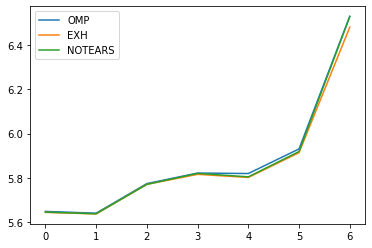

In [13]:
plt.plot(results[0][:-1], label = "OMP")
plt.plot(results[1][:-1], label = "EXH")
plt.plot(results[2][:-1], label = "NOTEARS")
plt.legend()